# Lab 7- Data Analysis

Exercises 1-4 are to be completed by October 25th. The remaider of the lab is due November 1st. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [17]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  10.4M      0 --:--:--  0:01:24 --:--:-- 7764k


In [18]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [19]:
!gunzip SUSY.csv.gz

In [20]:
ls -lh

total 2.3G
-rw-r--r-- 1 sulav_0987 sulav_0987  52K Dec  5 16:39 Lab.7.Solutions.ipynb
-rw-r--r-- 1 sulav_0987 sulav_0987 390K Dec  3 14:05 Lab.7.ipynb
-rw-r--r-- 1 sulav_0987 sulav_0987 5.9M Oct 27 21:22 Lab.7.pdf
-rw-r--r-- 1 sulav_0987 sulav_0987 2.3G Dec  5 16:37 SUSY.csv


The data is provided as a comma separated file.

In [21]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [22]:
!ls -lh

total 2.3G
-rw-r--r-- 1 sulav_0987 sulav_0987  52K Dec  5 16:39 Lab.7.Solutions.ipynb
-rw-r--r-- 1 sulav_0987 sulav_0987 390K Dec  3 14:05 Lab.7.ipynb
-rw-r--r-- 1 sulav_0987 sulav_0987 5.9M Oct 27 21:22 Lab.7.pdf
-rw-r--r-- 1 sulav_0987 sulav_0987 2.3G Dec  5 16:37 SUSY.csv


We see that we have 5 million datapoints.

In [23]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [24]:
!head -500000 SUSY.csv > SUSY-small.csv

In [9]:
ls -lh

total 383M
-rw-r--r-- 1 sulav_0987 sulav_0987  38K Dec  5 16:35 Lab.7.Solutions.ipynb
-rw-r--r-- 1 sulav_0987 sulav_0987 390K Dec  3 14:05 Lab.7.ipynb
-rw-r--r-- 1 sulav_0987 sulav_0987 5.9M Oct 27 21:22 Lab.7.pdf
-rw-r--r-- 1 sulav_0987 sulav_0987    0 Dec  5 16:35 SUSY-small.csv
-rw-r--r-- 1 sulav_0987 sulav_0987 143M Dec  5 16:35 SUSY.csv.gz


In [10]:
! wc -l SUSY-small.csv

0 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [25]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [26]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [27]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [28]:
FeatureNames

['M_Delta_R',
 'MET_rel',
 'MT2',
 'S_R',
 'M_R',
 'cos_theta_r1',
 'dPhi_r_b',
 'M_TR_2',
 'axial_MET',
 'R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [30]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [31]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [32]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


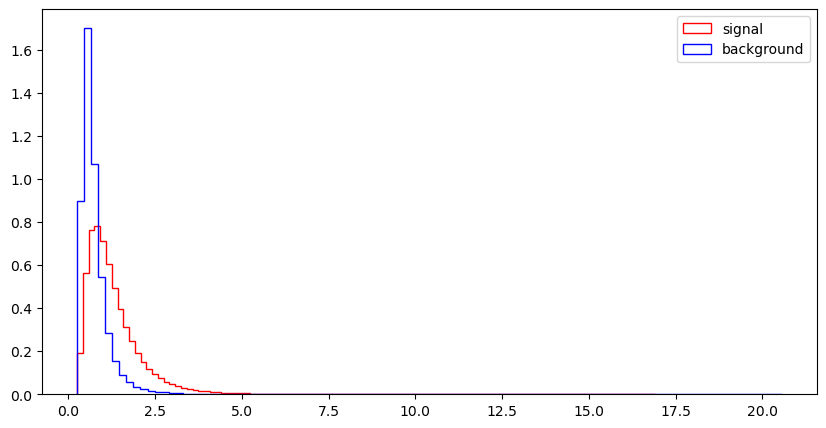

l_1_eta


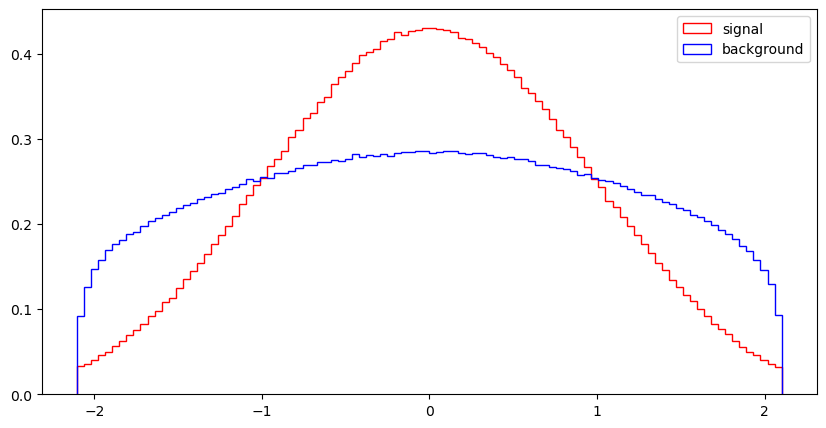

l_1_phi


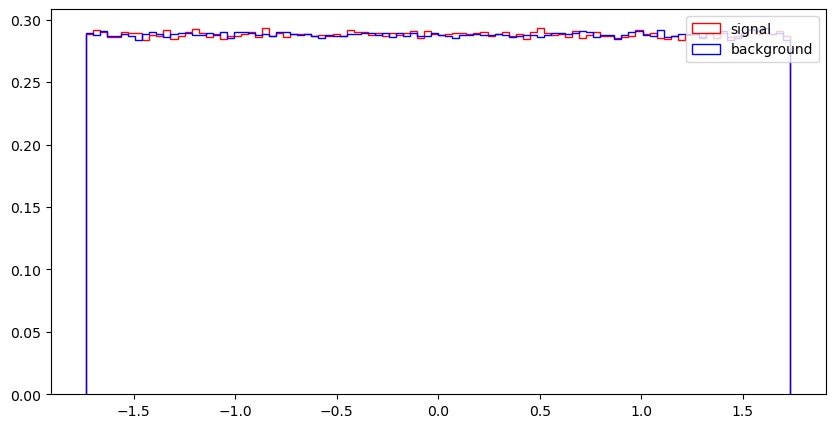

l_2_pT


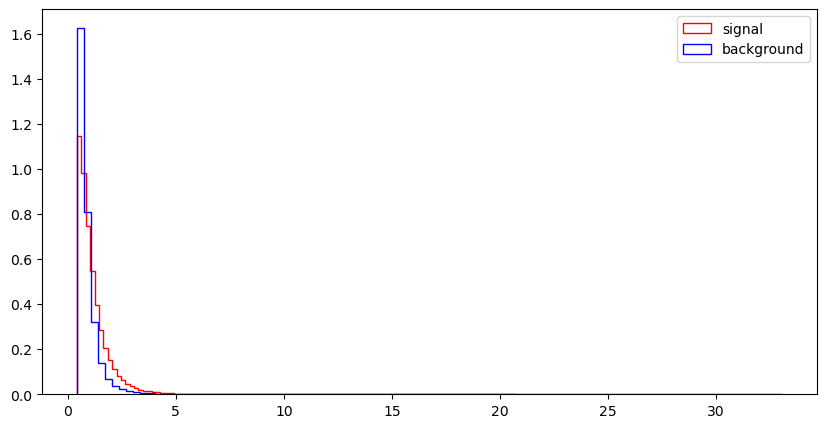

l_2_eta


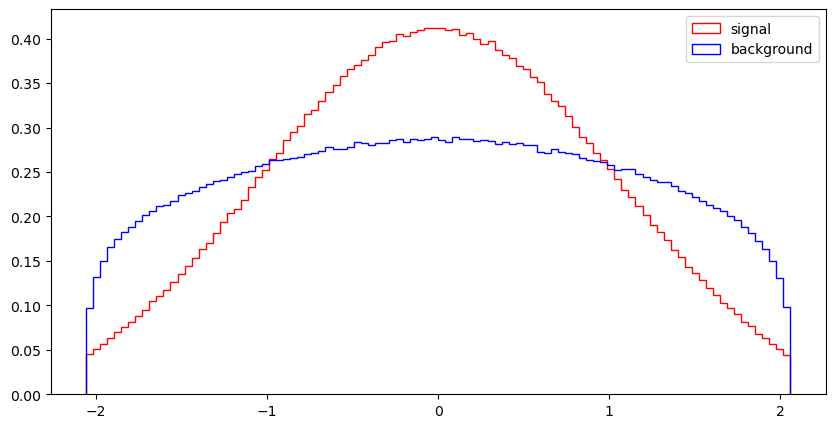

l_2_phi


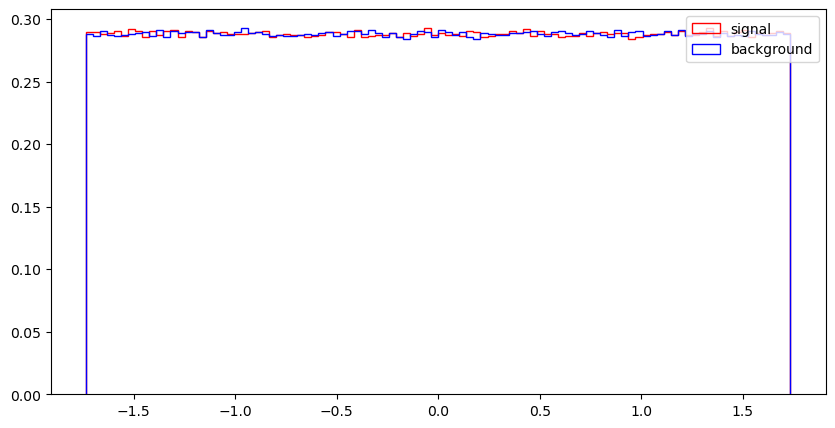

MET


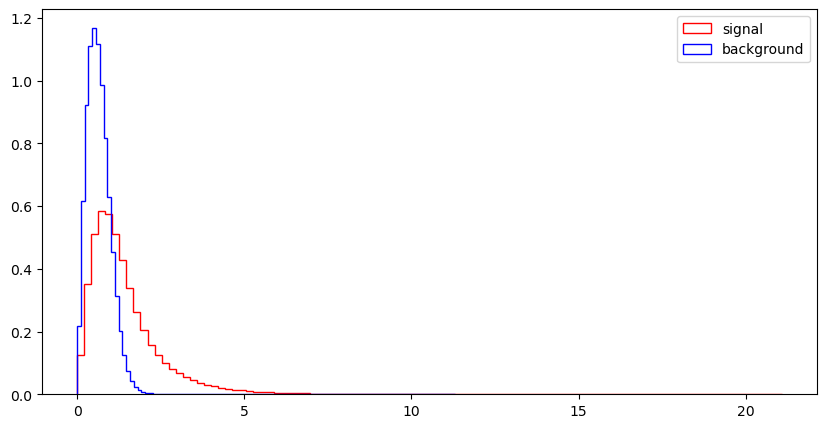

MET_phi


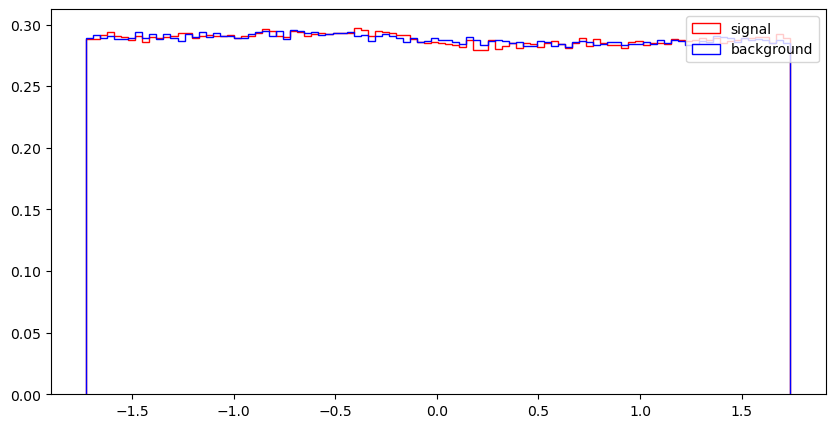

MET_rel


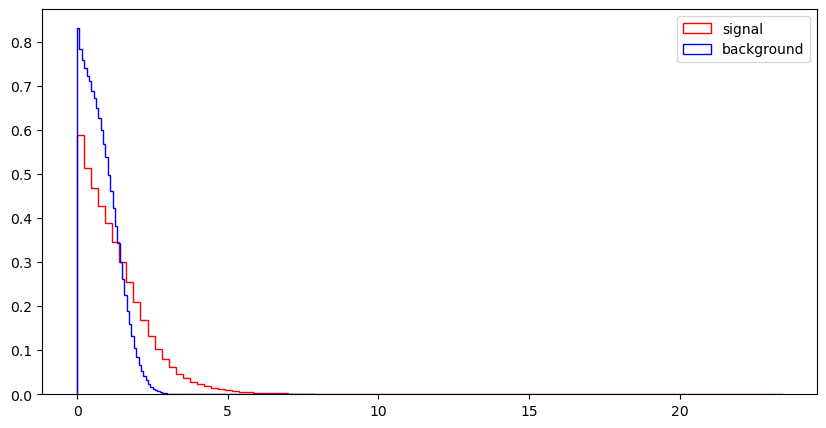

axial_MET


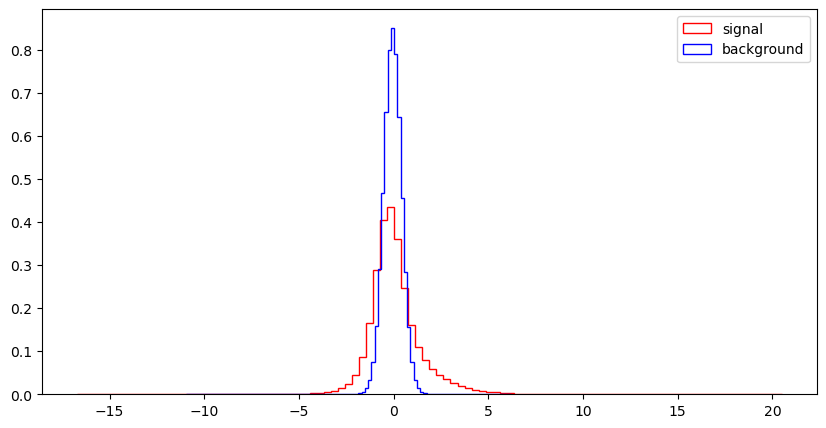

M_R


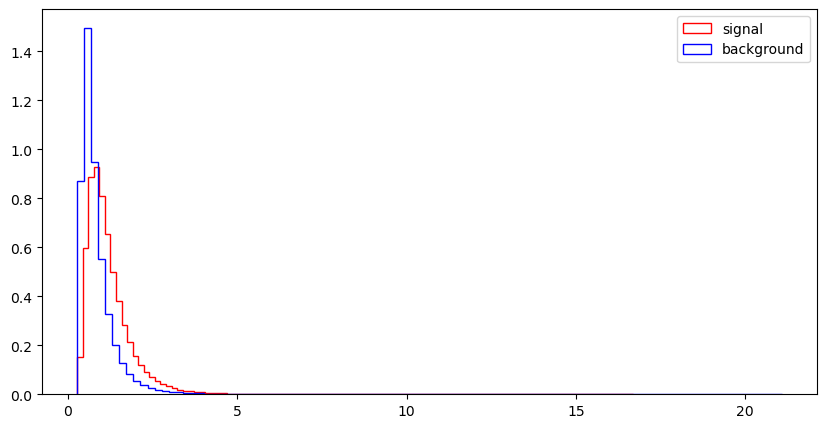

M_TR_2


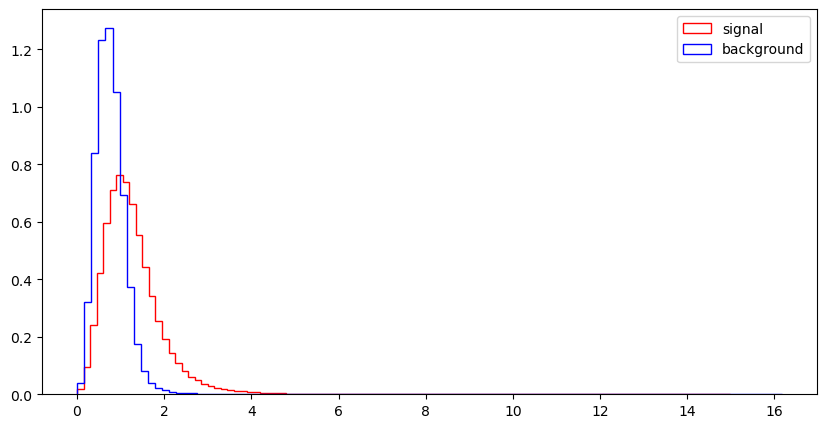

R


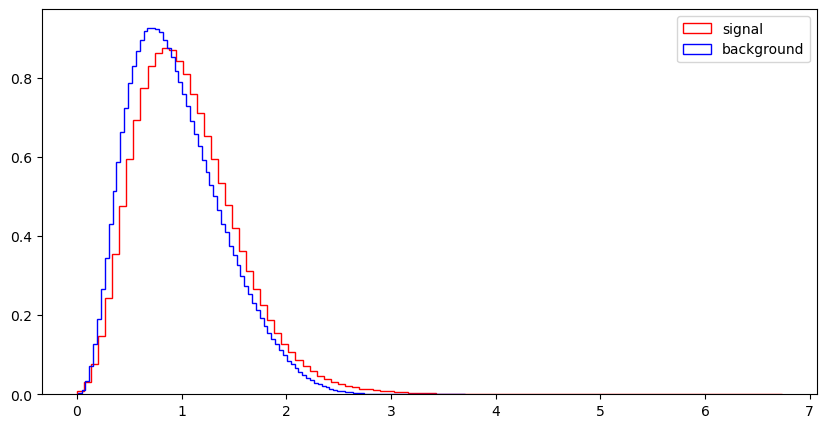

MT2


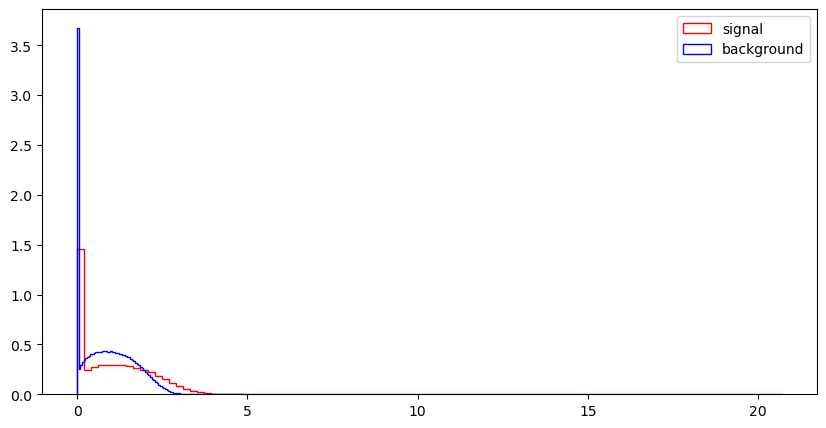

S_R


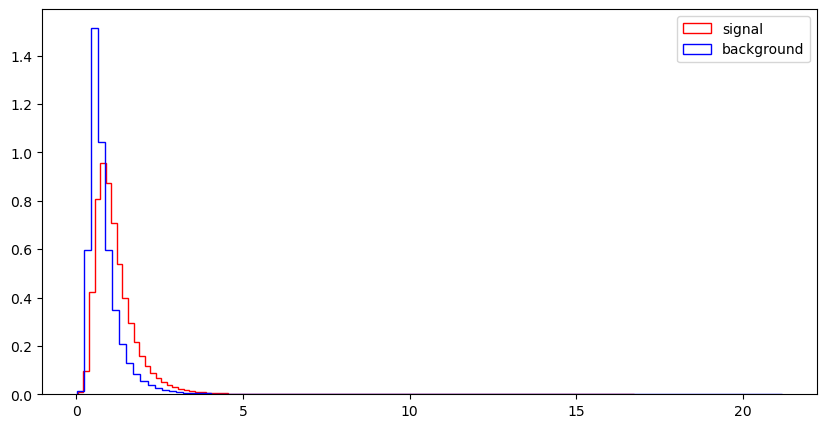

M_Delta_R


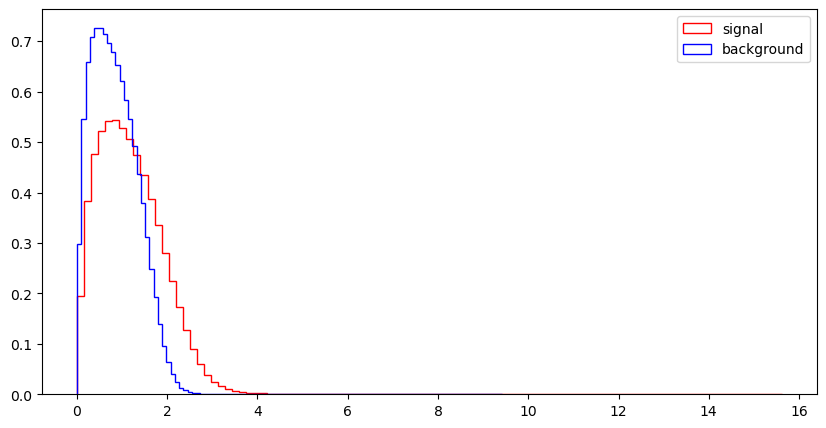

dPhi_r_b


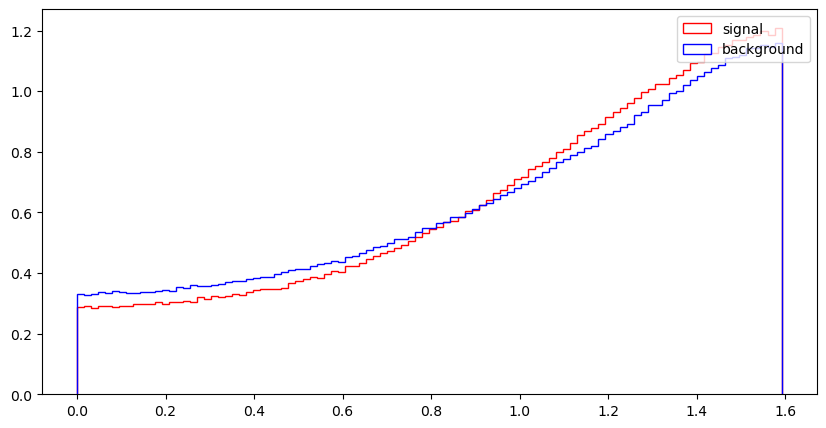

cos_theta_r1


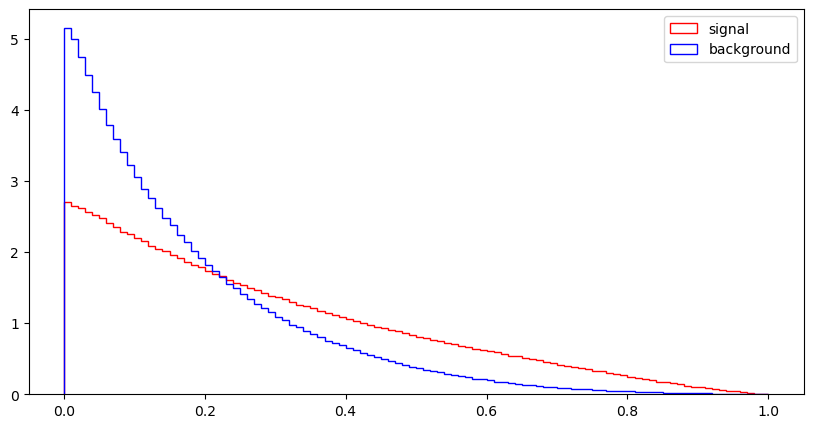

In [33]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

Plotting variable: l_1_pT


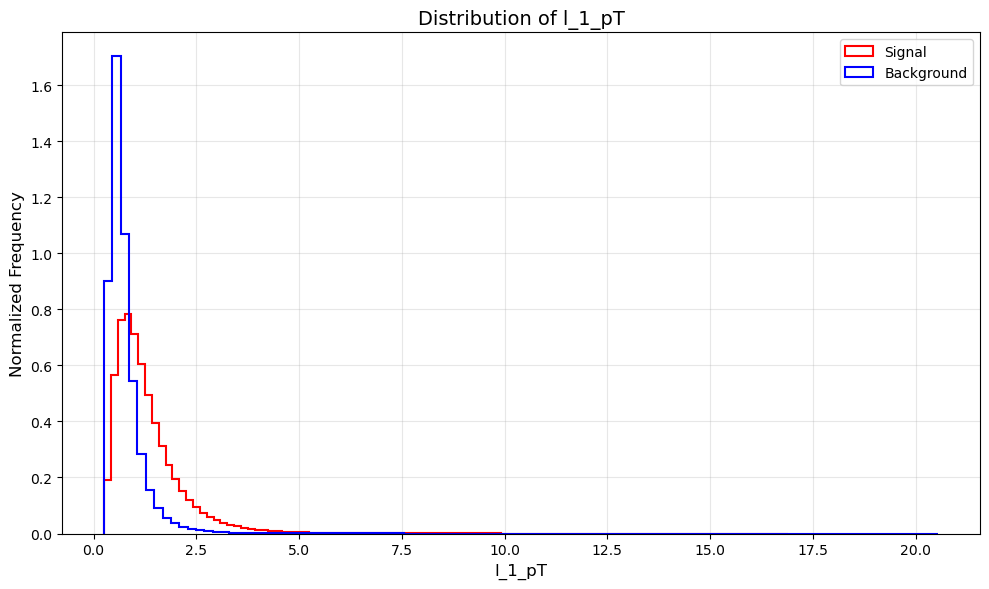

Plotting variable: l_1_eta


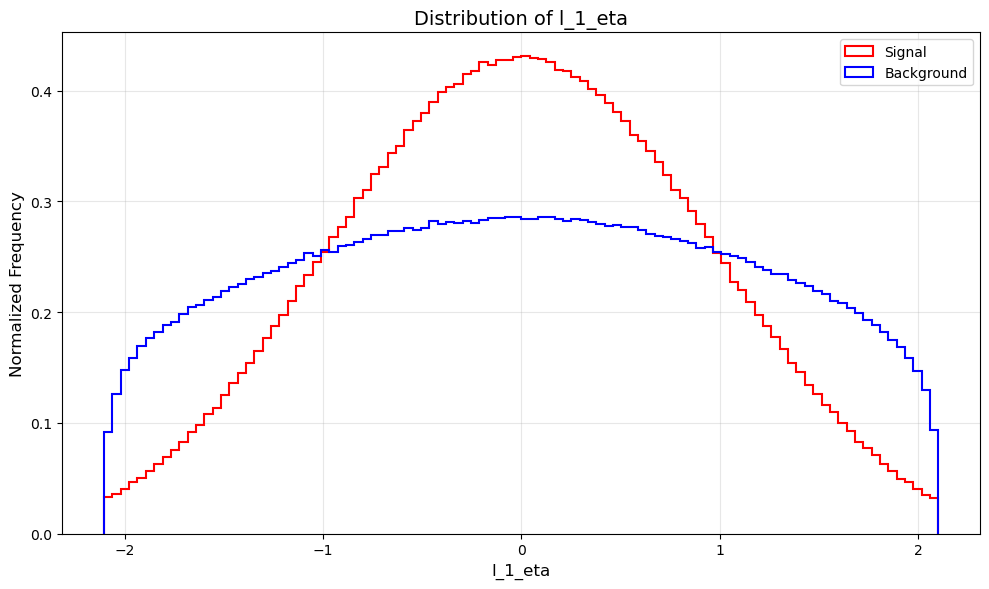

Plotting variable: l_1_phi


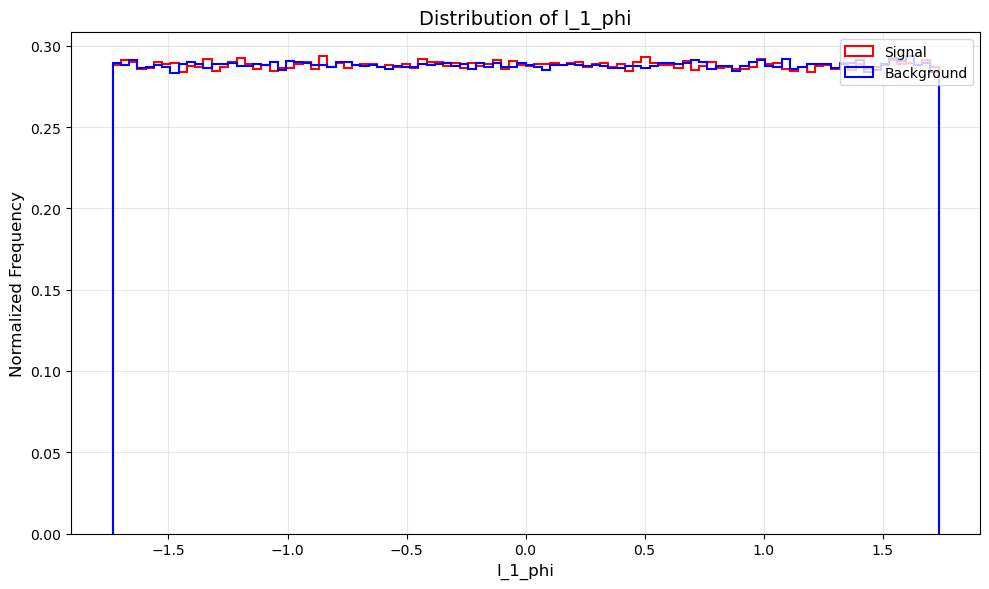

Plotting variable: l_2_pT


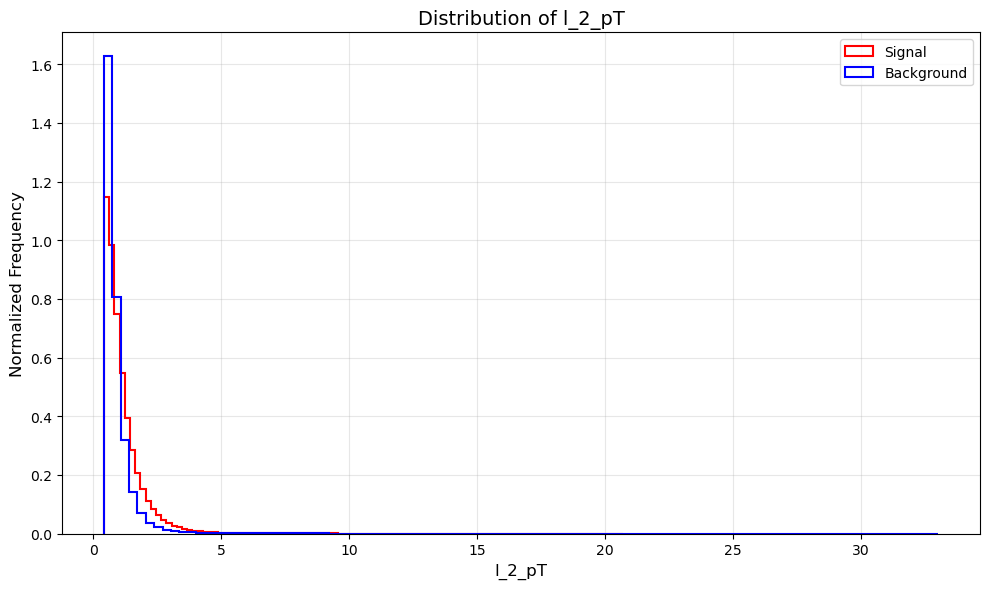

Plotting variable: l_2_eta


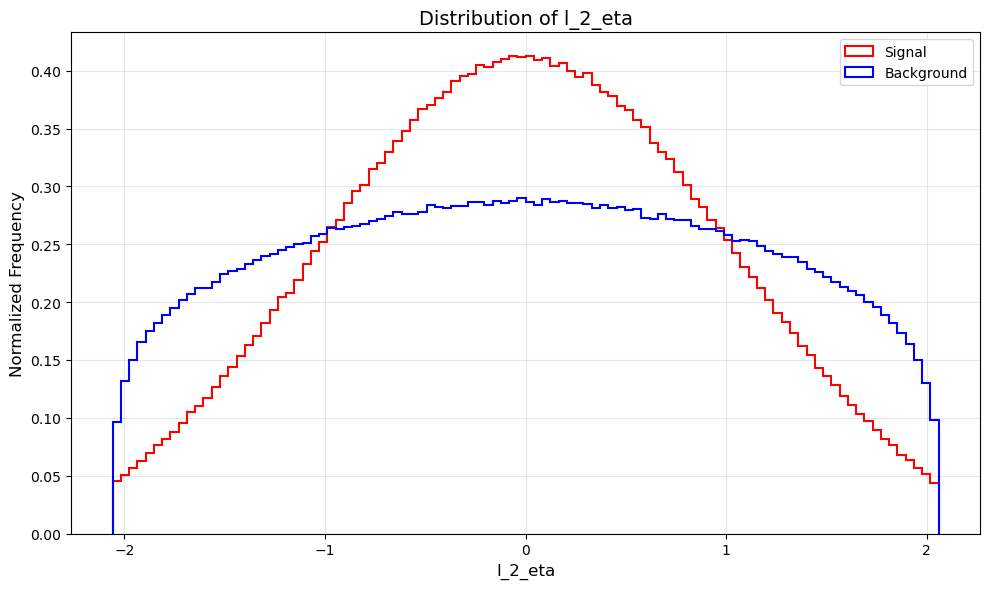

Plotting variable: l_2_phi


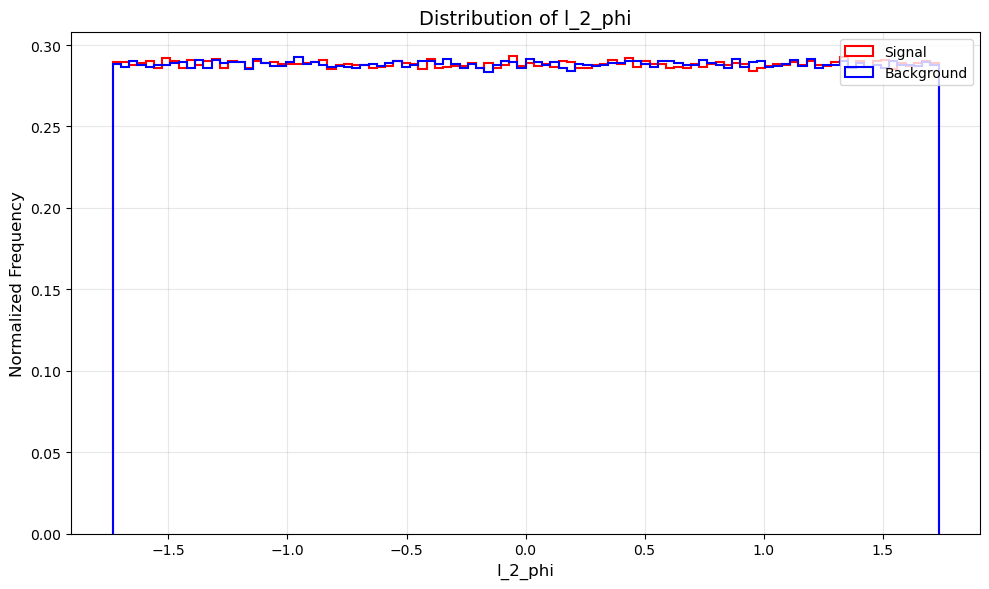

Plotting variable: MET


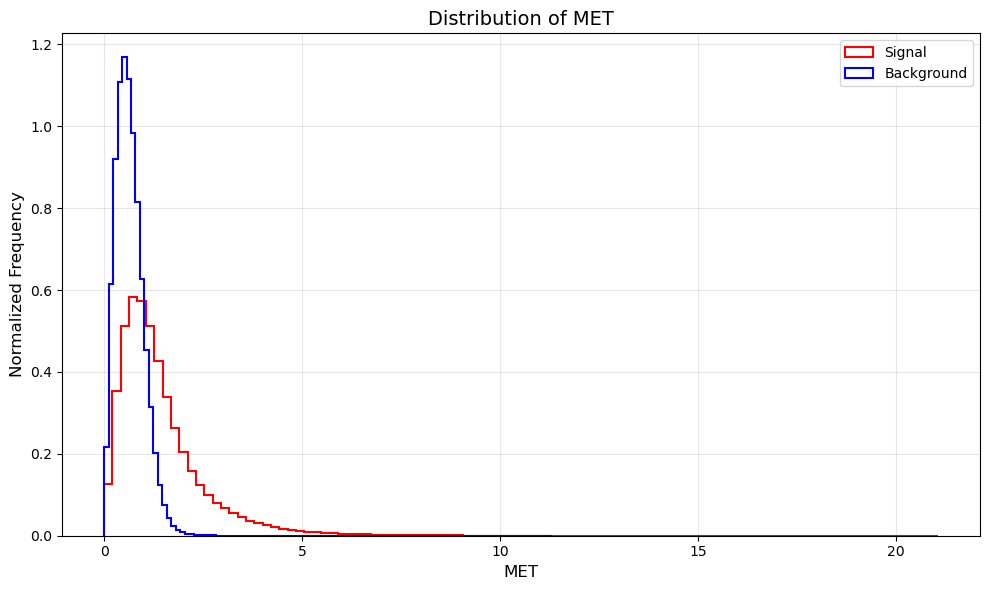

Plotting variable: MET_phi


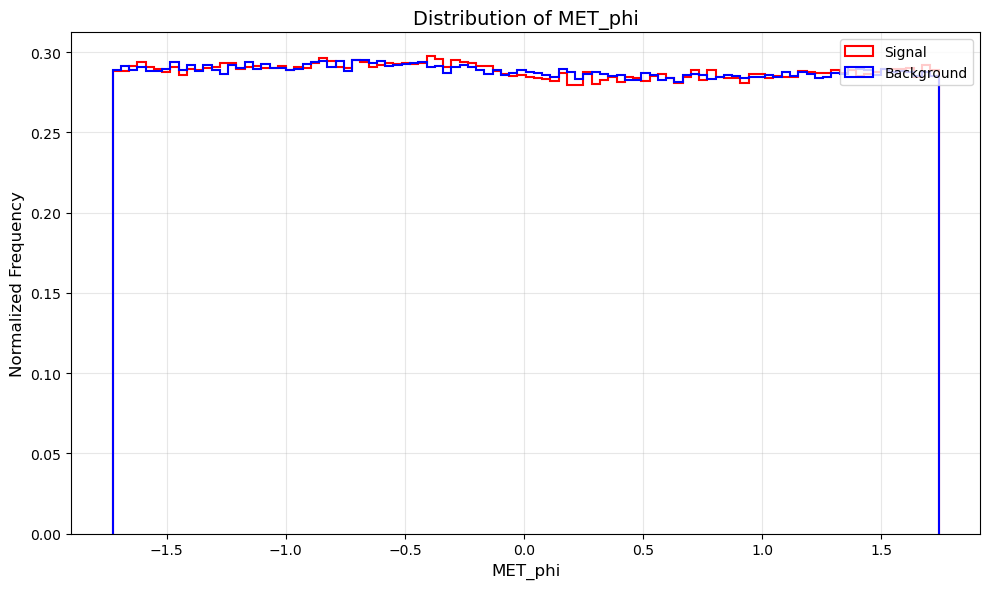

Plotting variable: MET_rel


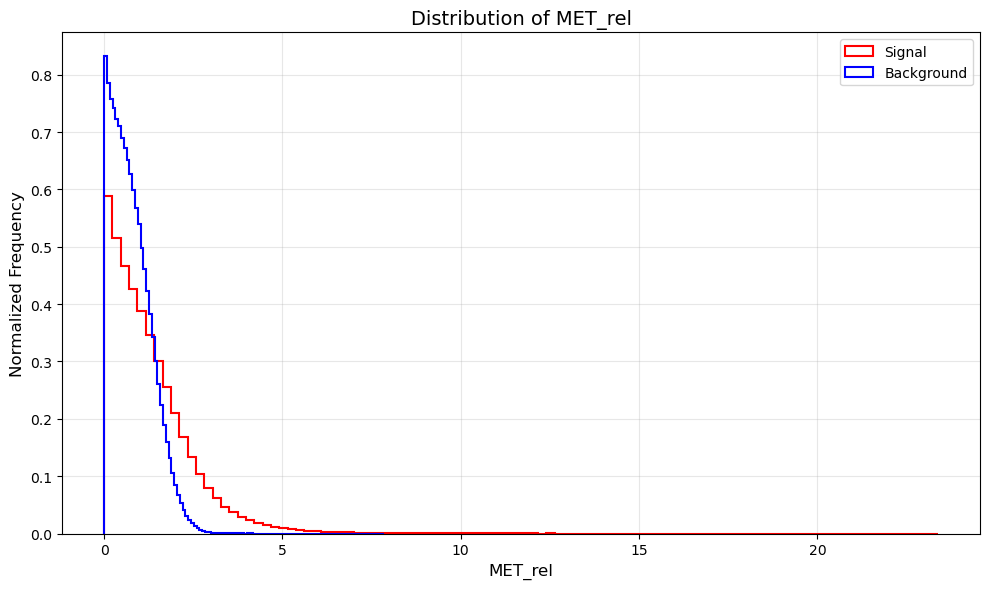

Plotting variable: axial_MET


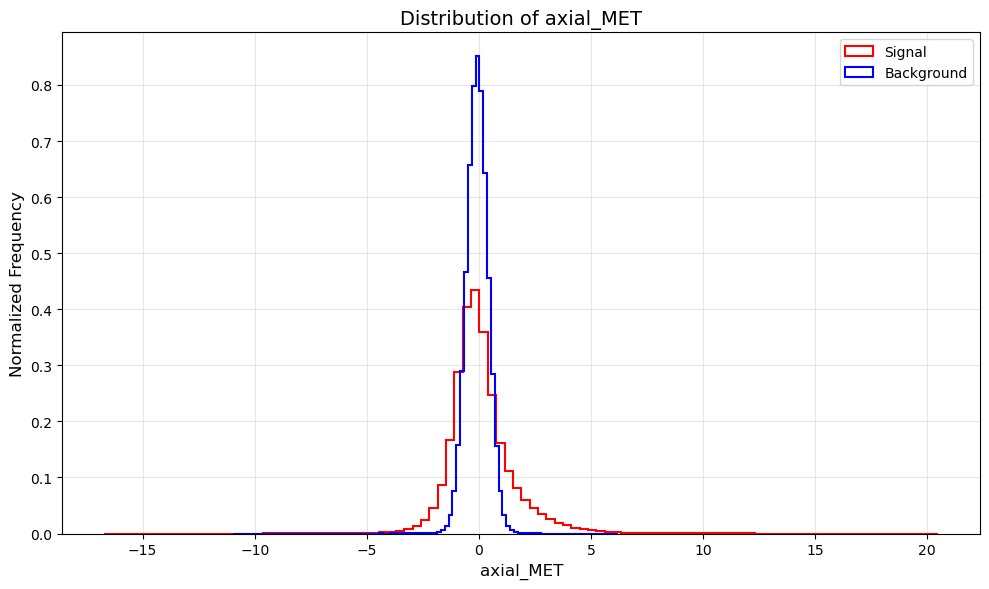

Plotting variable: M_R


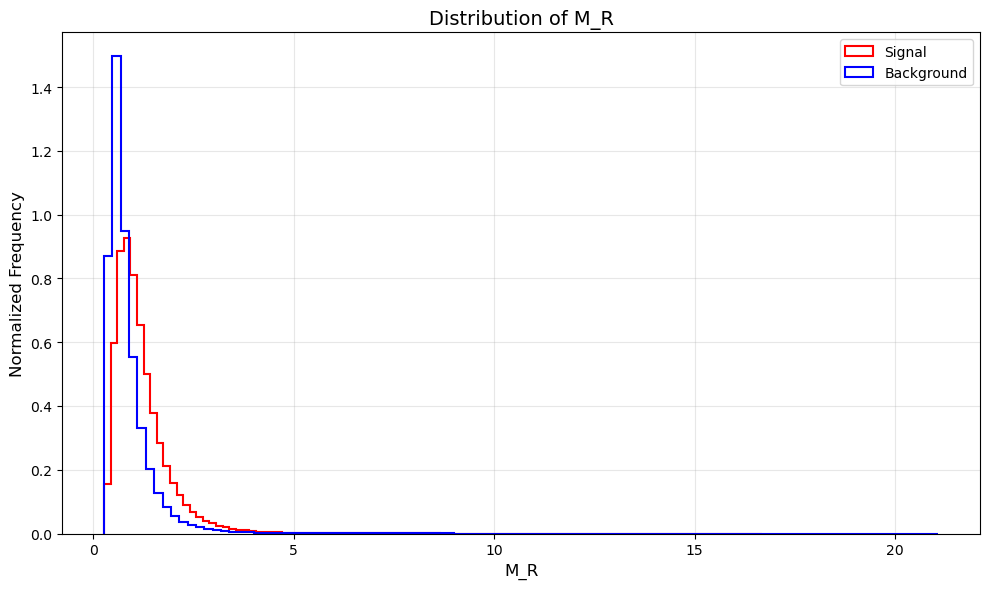

Plotting variable: M_TR_2


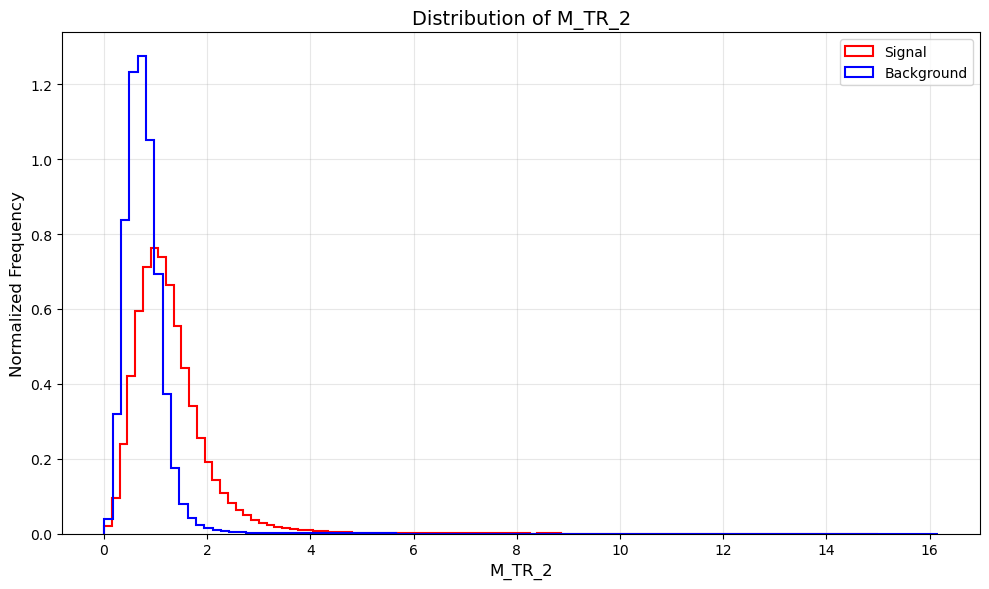

Plotting variable: R


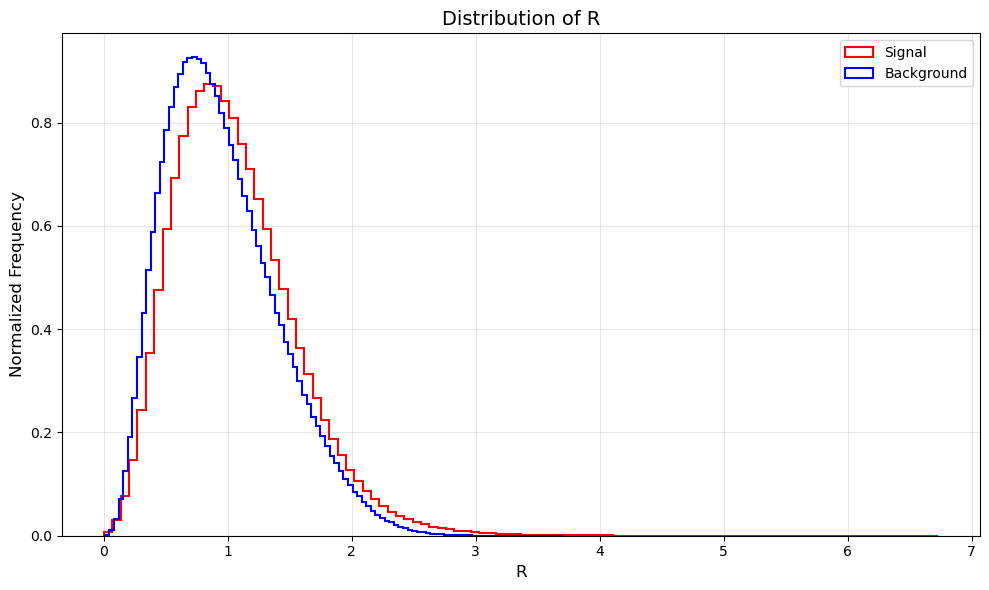

Plotting variable: MT2


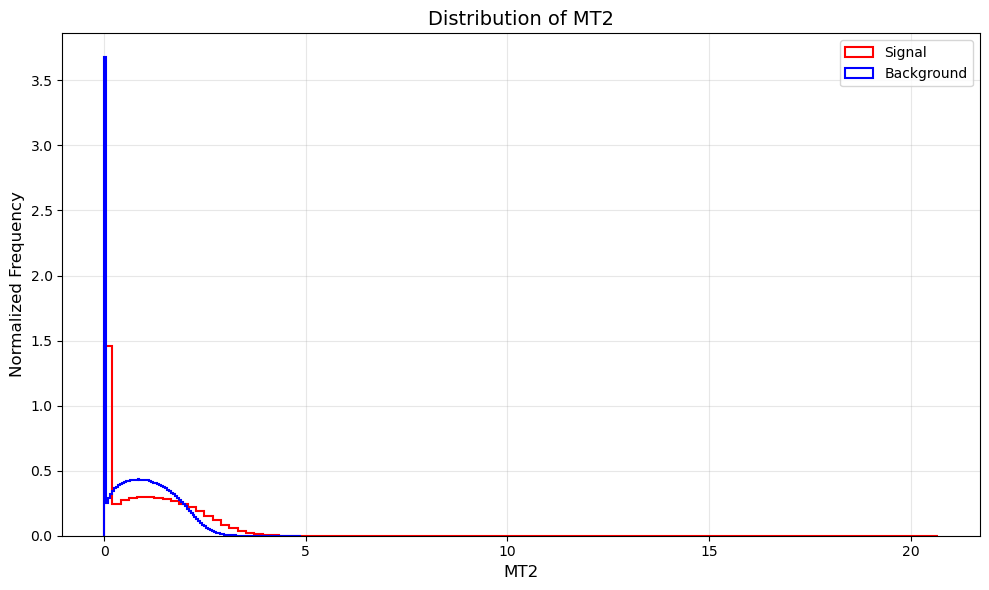

Plotting variable: S_R


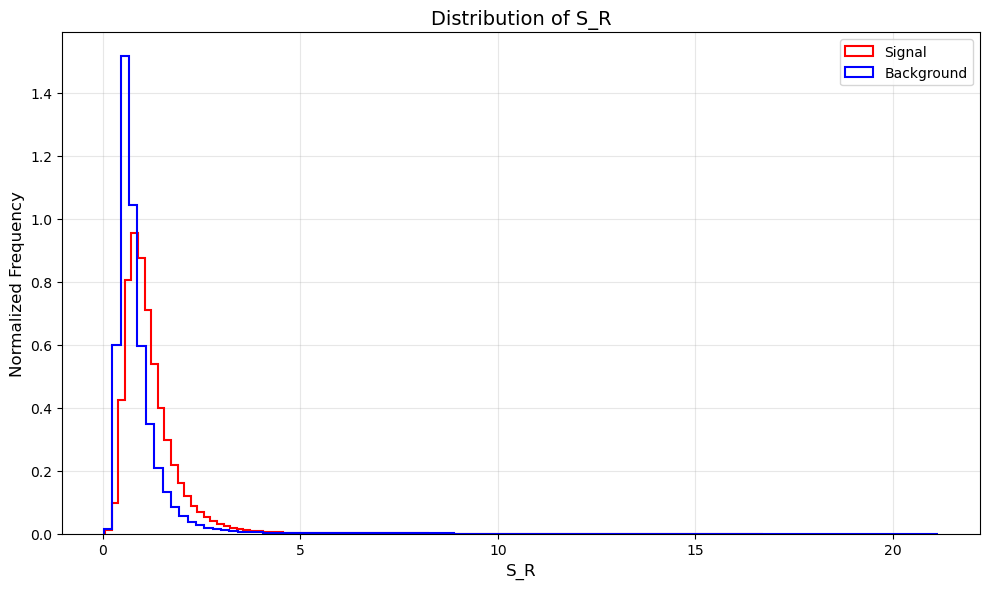

Plotting variable: M_Delta_R


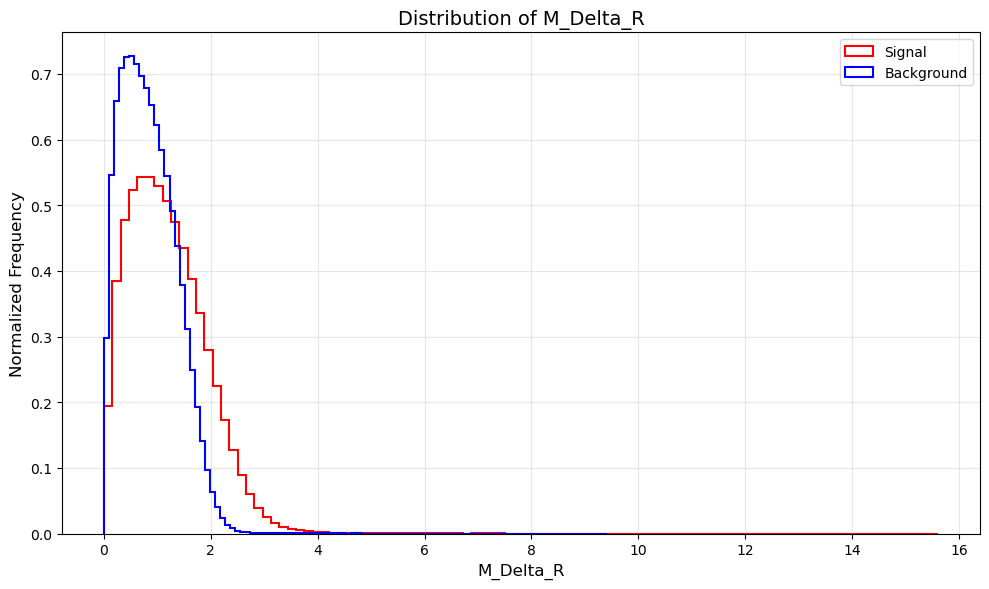

Plotting variable: dPhi_r_b


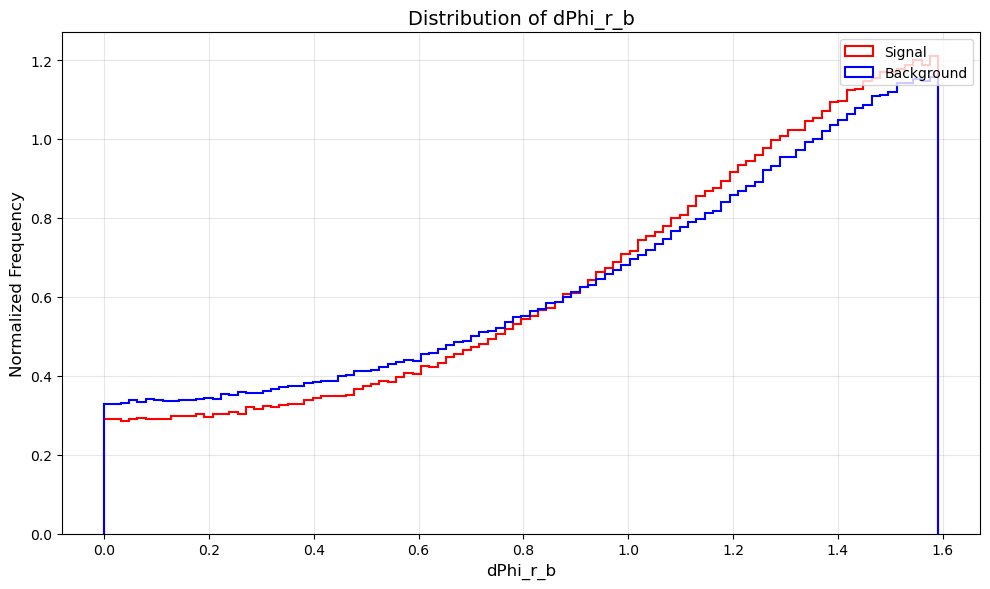

Plotting variable: cos_theta_r1


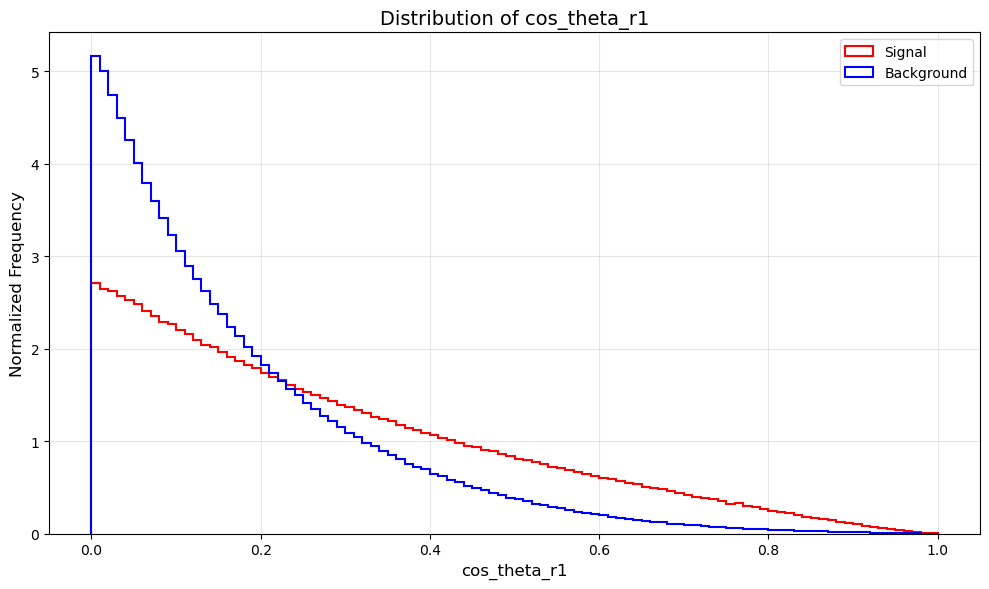

In [35]:
for var in VarNames[1:]:
    print(f"Plotting variable: {var}")
    plt.figure(figsize=(10, 6))

    plt.hist(
        np.array(df_sig[var]),
        bins=100,
        histtype="step",
        color="red",
        label="Signal",
        density=True,
        linewidth=1.5
    )

    plt.hist(
        np.array(df_bkg[var]),
        bins=100,
        histtype="step",
        color="blue",
        label="Background",
        density=True,
        linewidth=1.5
    )

    plt.title(f"Distribution of {var}", fontsize=14)
    plt.xlabel(f"{var}", fontsize=12)
    plt.ylabel("Normalized Frequency", fontsize=12)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # Show the plot
    plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

#### Part a Solutions

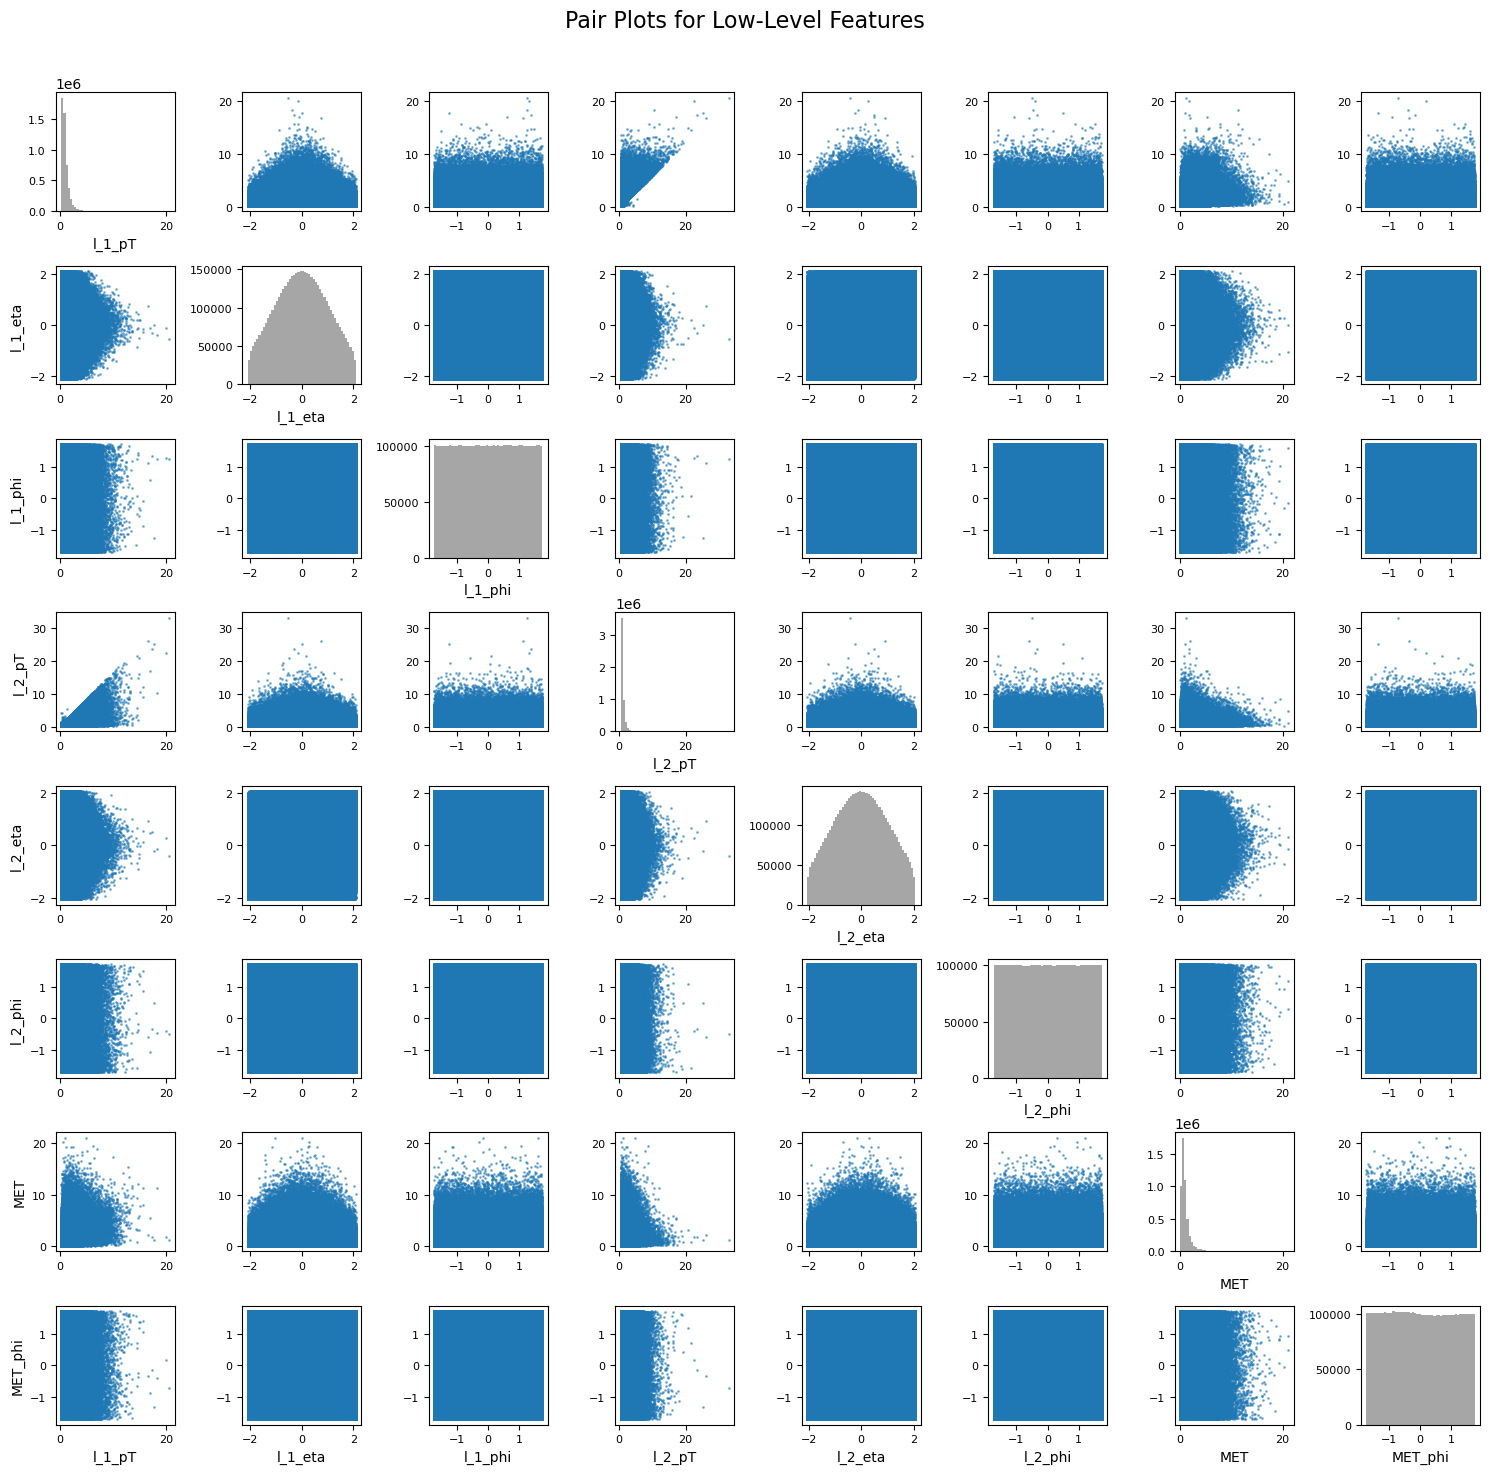

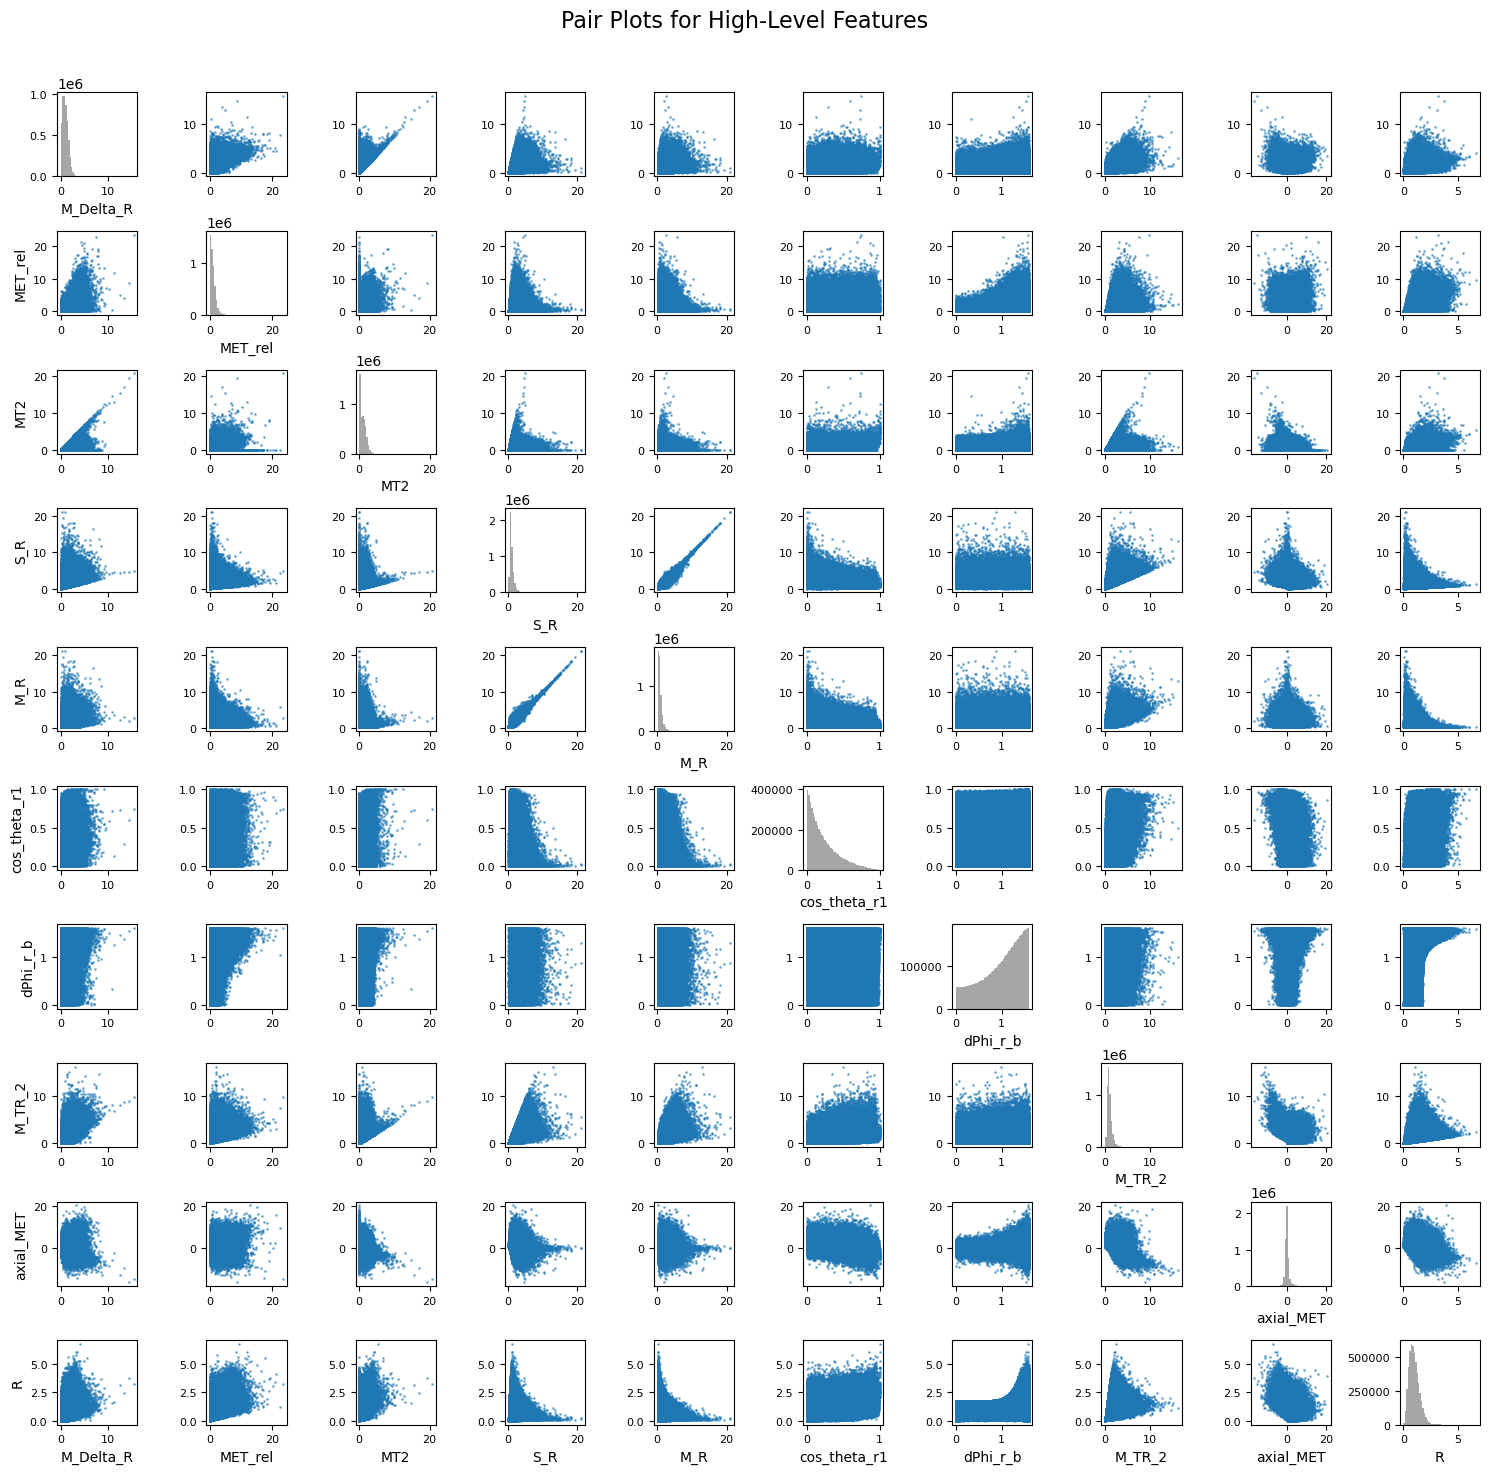

In [36]:
def create_pair_plots(df, variables, title):
    n = len(variables)
    plt.figure(figsize=(15, 15))
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, i * n + j + 1)
            if i == j:
                plt.hist(df[variables[i]], bins=50, color="gray", alpha=0.7)
                plt.xlabel(variables[i], fontsize=10)
            else:
                plt.scatter(df[variables[j]], df[variables[i]], s=1, alpha=0.5)
                if j == 0:
                    plt.ylabel(variables[i], fontsize=10)
                if i == n - 1:
                    plt.xlabel(variables[j], fontsize=10)
            plt.xticks(fontsize=8)
            plt.yticks(fontsize=8)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

low_level_features = RawNames
create_pair_plots(df, low_level_features, "Pair Plots for Low-Level Features")

high_level_features = FeatureNames
create_pair_plots(df, high_level_features, "Pair Plots for High-Level Features")

#### Part b solutions

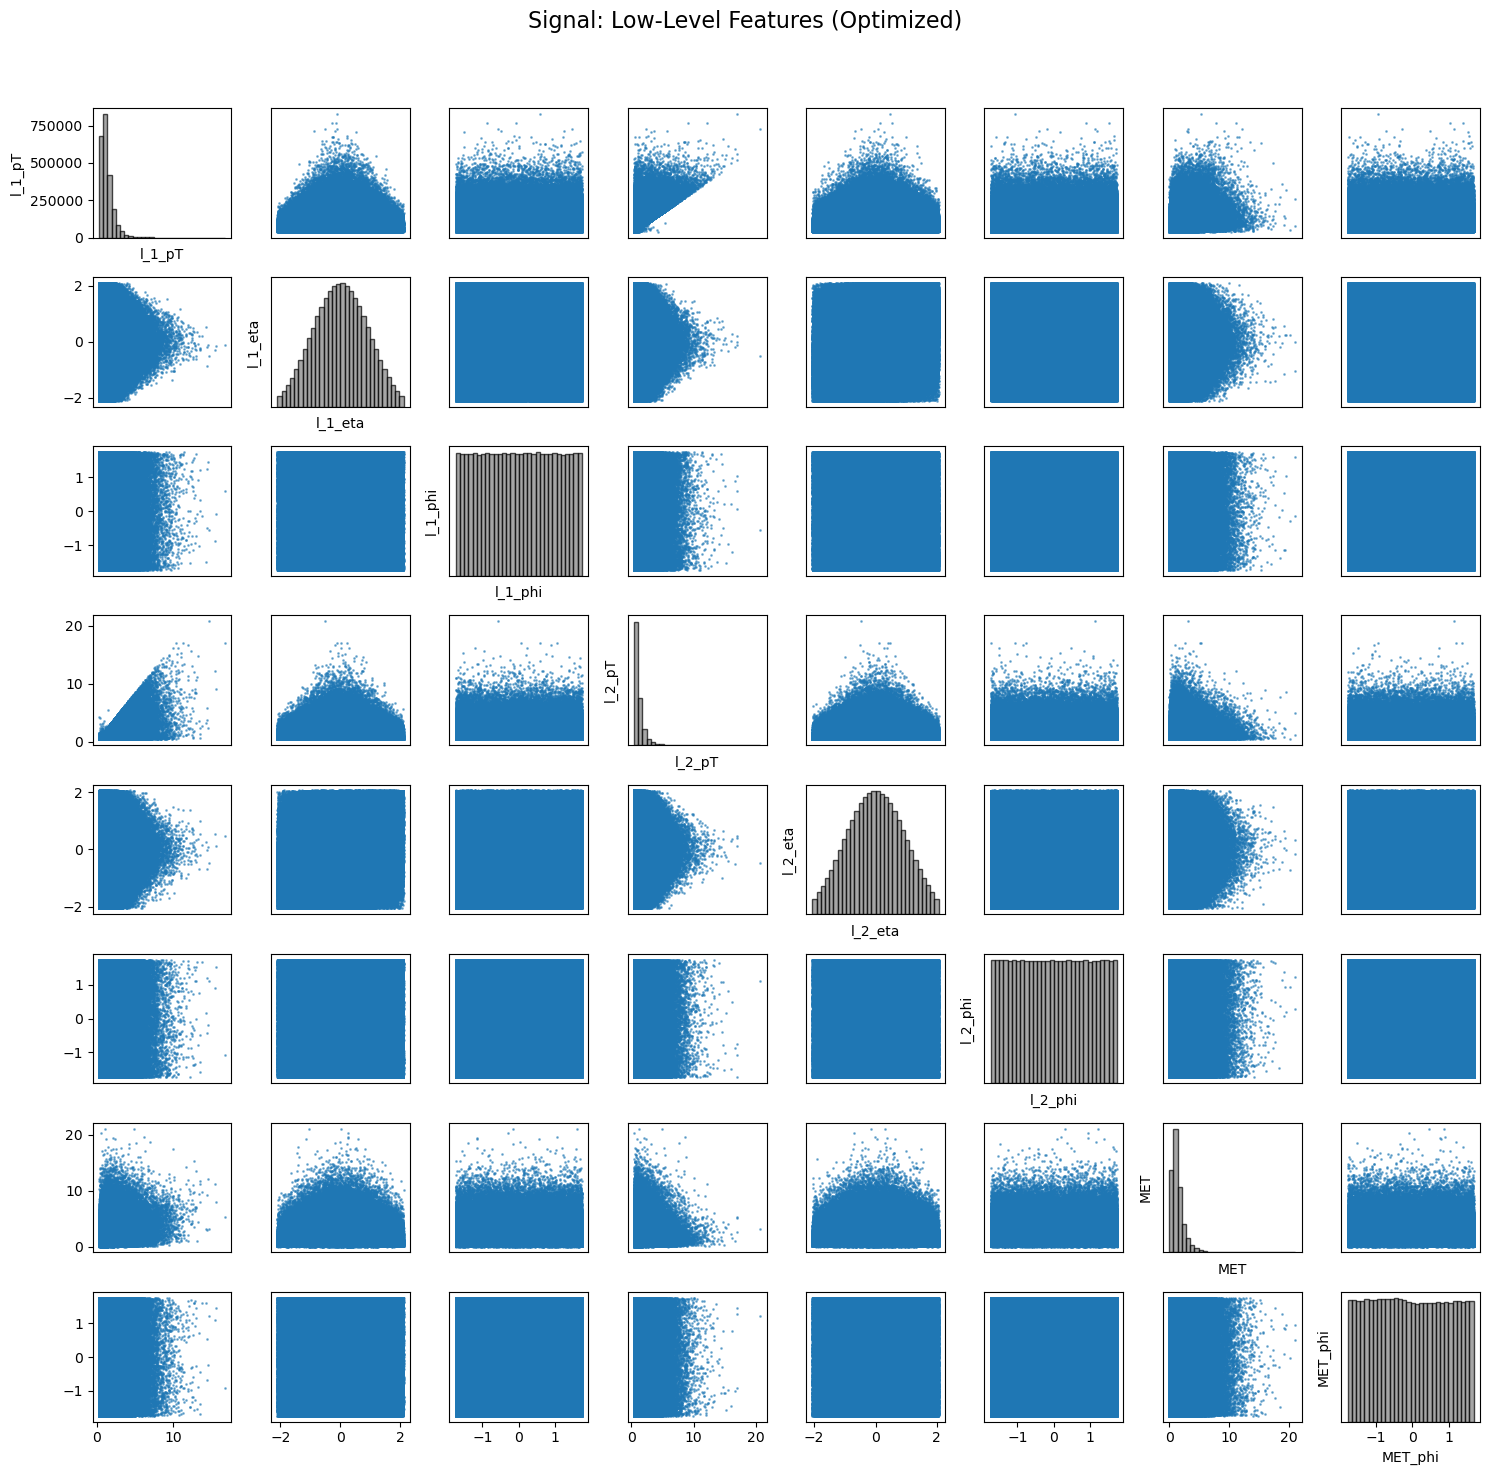

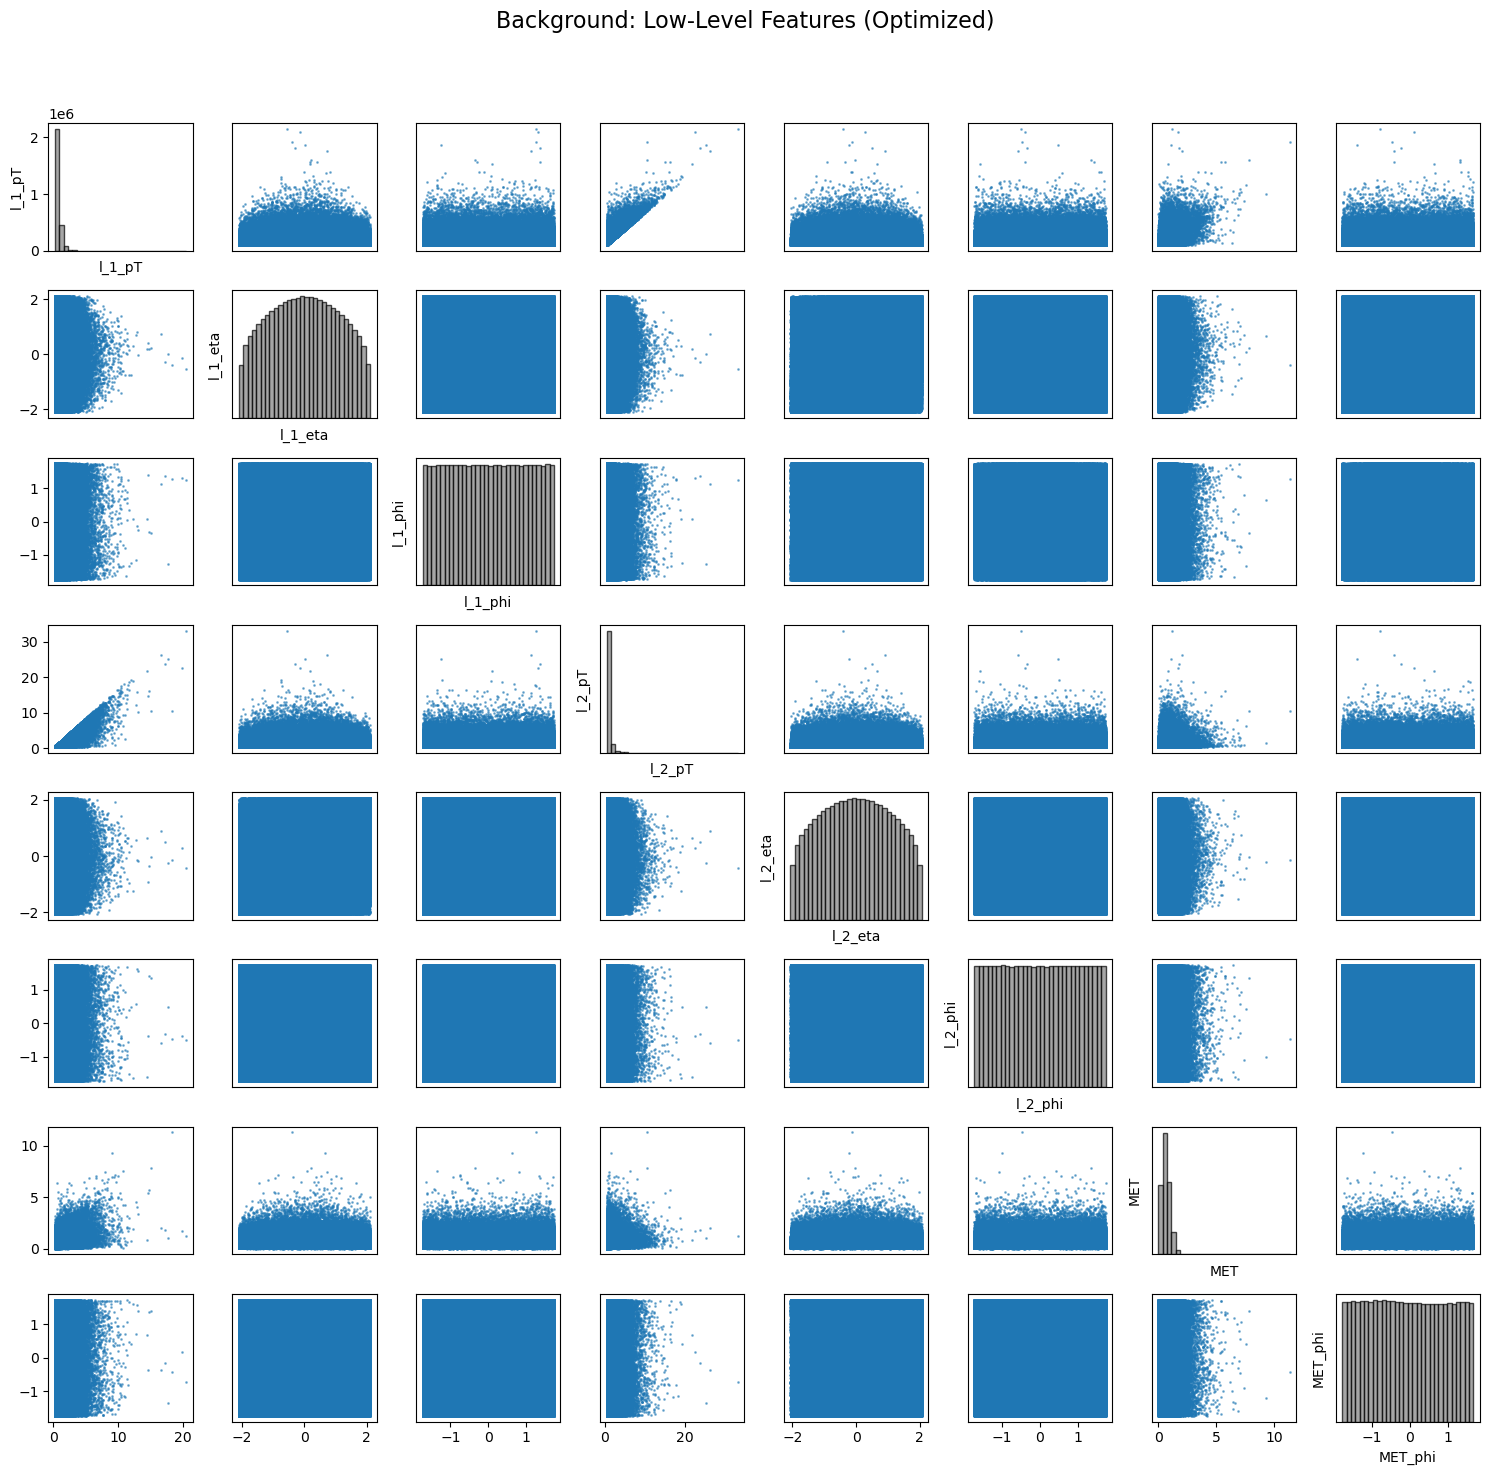

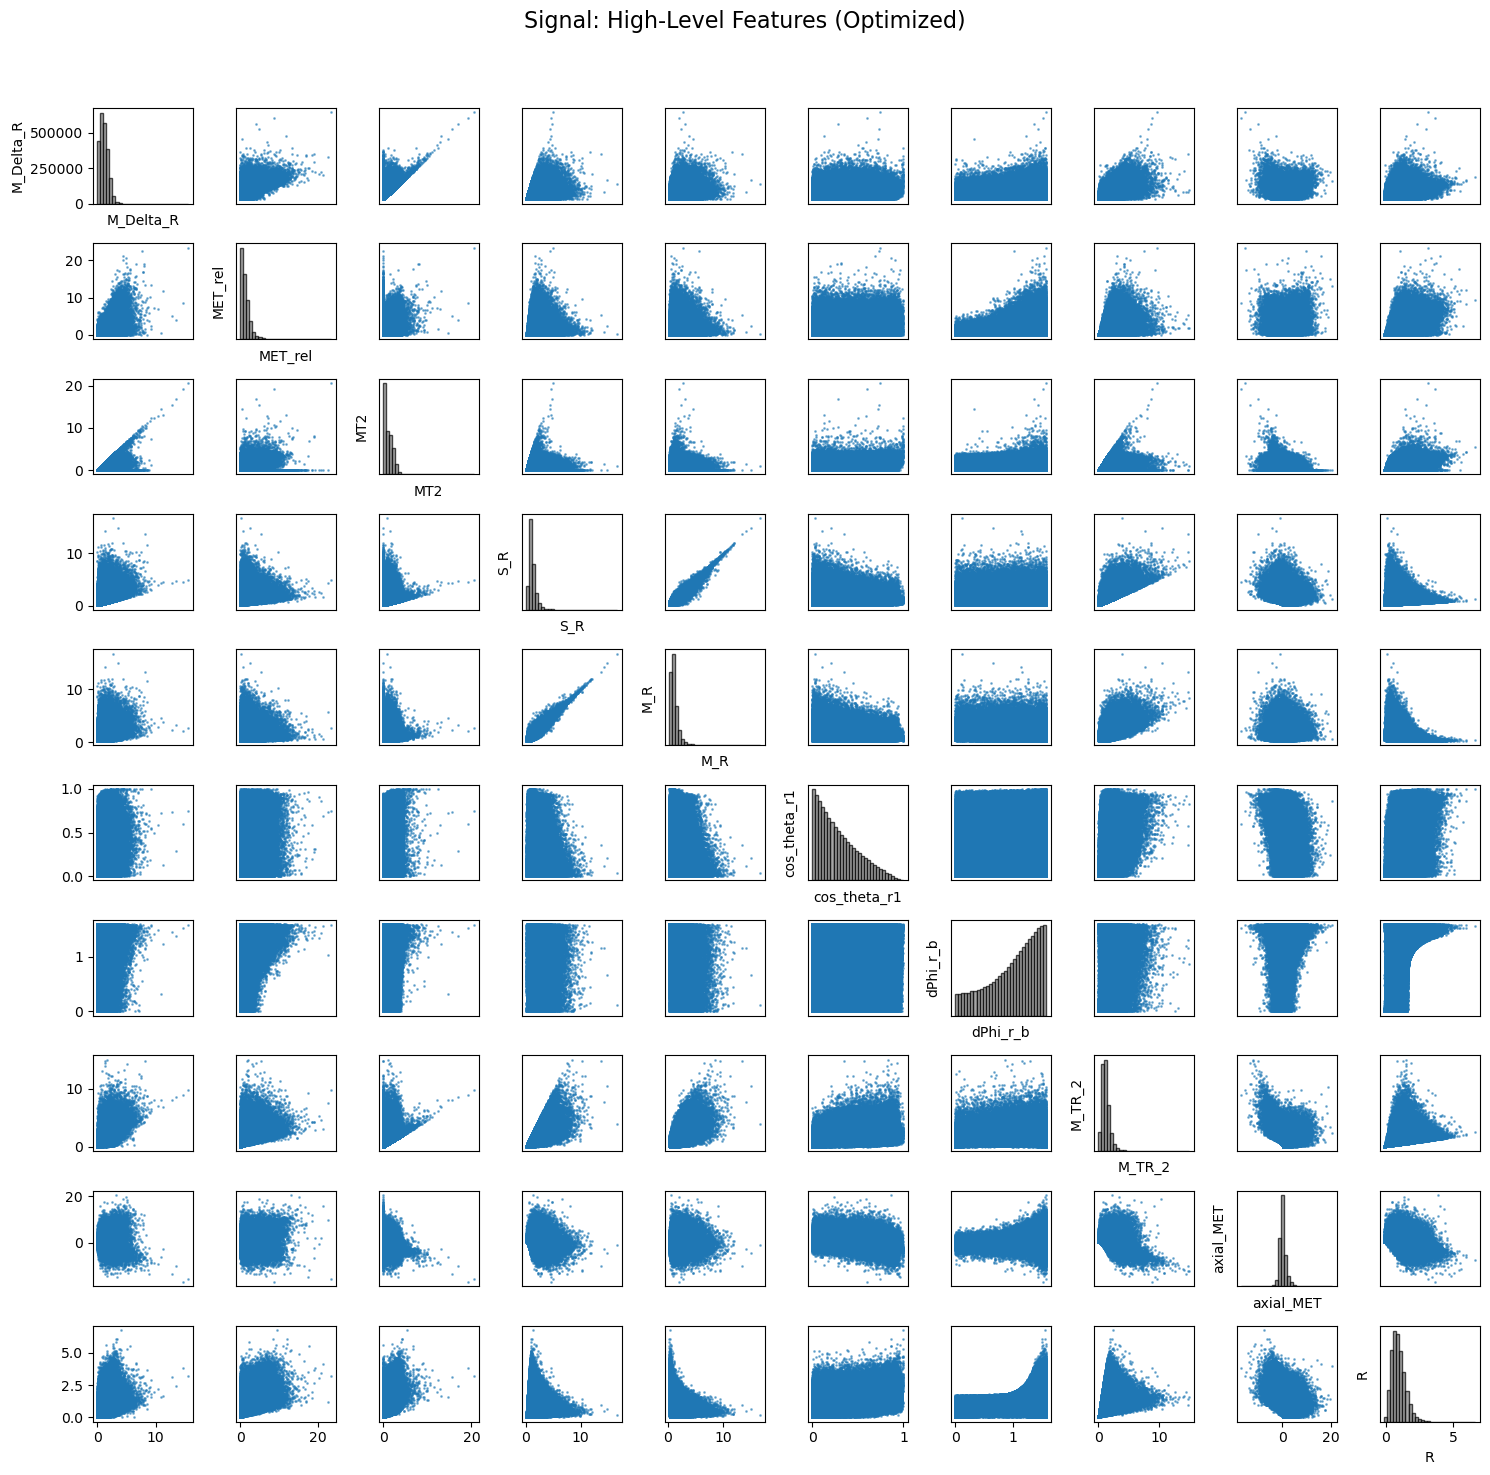

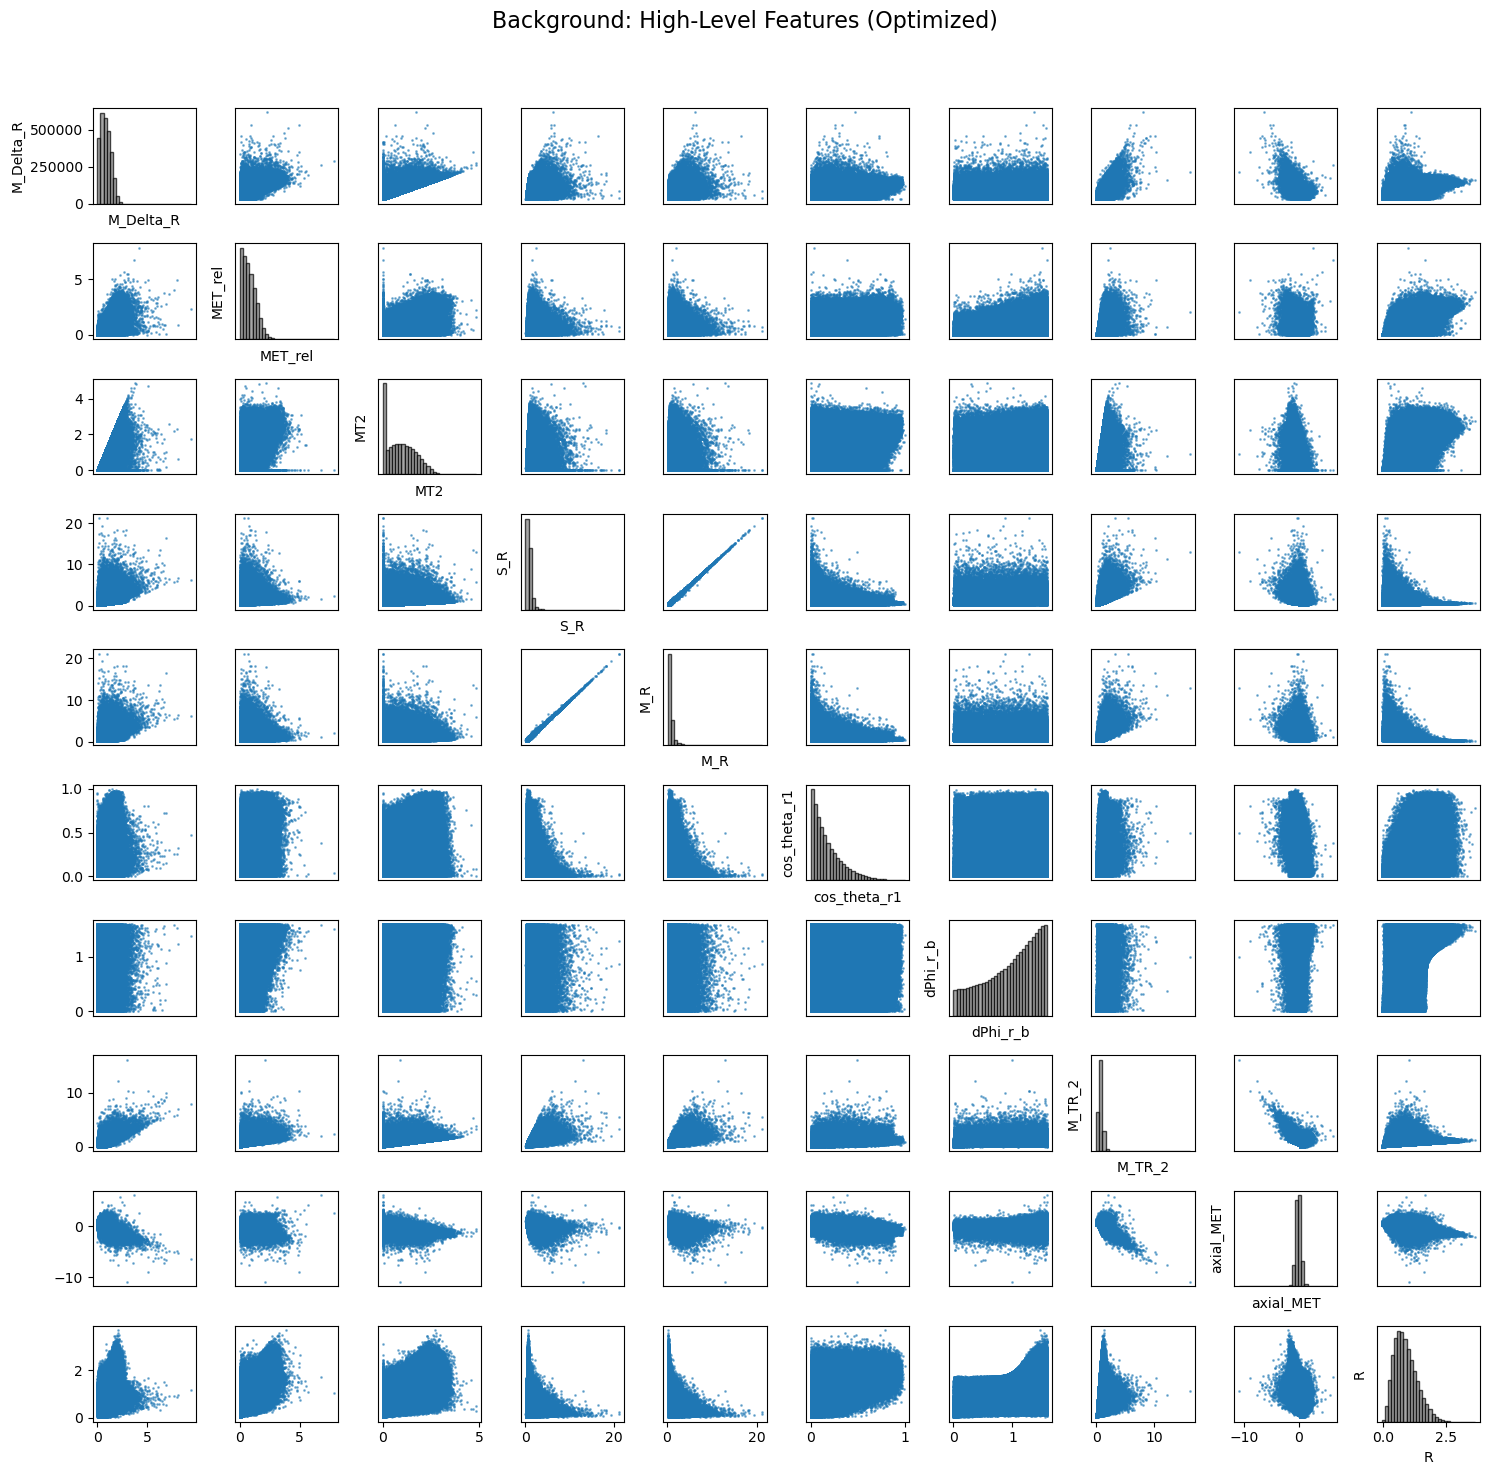

In [37]:
def create_pair_plots_optimized(data, variables, title):
    n_vars = len(variables)
    histograms = {var: np.histogram(data[var], bins=30) for var in variables}

    fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))
    for i, var_x in enumerate(variables):
        for j, var_y in enumerate(variables):
            ax = axes[i, j]
            if i == j:
                hist, bins = histograms[var_x]
                ax.bar(bins[:-1], hist, width=np.diff(bins), color='gray', alpha=0.7, edgecolor='black')
                ax.set_ylabel(var_x)
                ax.set_xlabel(var_x)
            else:

                ax.scatter(data[var_y], data[var_x], s=1, alpha=0.5)
            if i < n_vars - 1:
                ax.set_xticks([])
            if j > 0:
                ax.set_yticks([])

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

create_pair_plots_optimized(df_sig, low_level_features, "Signal: Low-Level Features (Optimized)")
create_pair_plots_optimized(df_bkg, low_level_features, "Background: Low-Level Features (Optimized)")
create_pair_plots_optimized(df_sig, high_level_features, "Signal: High-Level Features (Optimized)")
create_pair_plots_optimized(df_bkg, high_level_features, "Background: High-Level Features (Optimized)")

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

#### part b

In [38]:
low_level_data = df[low_level_features].values
high_level_data = df[high_level_features].values

low_cov_matrix = np.cov(low_level_data, rowvar=False)
low_corr_matrix = np.corrcoef(low_level_data, rowvar=False)

high_cov_matrix = np.cov(high_level_data, rowvar=False)
high_corr_matrix = np.corrcoef(high_level_data, rowvar=False)

print("Low-Level Features Covariance Matrix:")
print(low_cov_matrix)
print("\nLow-Level Features Correlation Matrix:")
print(low_corr_matrix)

print("\nHigh-Level Features Covariance Matrix:")
print(high_cov_matrix)
print("\nHigh-Level Features Correlation Matrix:")
print(high_corr_matrix)


Low-Level Features Covariance Matrix:
[[ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
  -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04]
 [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
   4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04]
 [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
   6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01]
 [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28003791e-01
  -4.54288205e-04  1.14725700e-04  7.97039608e-02 -1.38807284e-03]
 [-3.02456872e-04  4.05877394e-01  6.41115931e-04 -4.54288205e-04
   1.00568572e+00 -6.47265749e-05  5.11898819e-05 -1.25591734e-04]
 [ 2.27164310e-04  2.97083862e-04 -2.68130132e-01  1.14725700e-04
  -6.47265749e-05  1.00326487e+00  4.32091479e-06 -3.44683883e-02]
 [ 2.30950772e-01 -5.57684419e-04  1.20012378e-03  7.97039608e-02
   5.11898819e-05  4.32091479e-06  7.61932857e-01 -1.62175466e-03]
 [-6.76375484e-04 -5.40623754e-

#### part c

In [39]:
from tabulate import tabulate

def format_matrix(matrix, headers):
    formatted_matrix = [[f"{x:.2f}" for x in row] for row in matrix]
    return tabulate(formatted_matrix, headers=headers, tablefmt="pipe")

headers = low_level_features + high_level_features

cov_matrix_low_formatted = format_matrix(low_cov_matrix, low_level_features)
cov_matrix_high_formatted = format_matrix(high_cov_matrix, high_level_features)

corr_matrix_low_formatted = format_matrix(low_corr_matrix, low_level_features)
corr_matrix_high_formatted = format_matrix(high_corr_matrix, high_level_features)

print("\nCovariance Matrix (Low-Level Features):\n", cov_matrix_low_formatted)
print("\nCorrelation Matrix (Low-Level Features):\n", corr_matrix_low_formatted)

print("\nCovariance Matrix (High-Level Features):\n", cov_matrix_high_formatted)
print("\nCorrelation Matrix (High-Level Features):\n", corr_matrix_high_formatted)



Covariance Matrix (Low-Level Features):
 |   l_1_pT |   l_1_eta |   l_1_phi |   l_2_pT |   l_2_eta |   l_2_phi |   MET |   MET_phi |
|---------:|----------:|----------:|---------:|----------:|----------:|------:|----------:|
|     0.47 |     -0    |     -0    |     0.31 |     -0    |      0    |  0.23 |     -0    |
|    -0    |      1.01 |      0    |    -0    |      0.41 |      0    | -0    |     -0    |
|    -0    |      0    |      1    |    -0    |      0    |     -0.27 |  0    |     -0.18 |
|     0.31 |     -0    |     -0    |     0.43 |     -0    |      0    |  0.08 |     -0    |
|    -0    |      0.41 |      0    |    -0    |      1.01 |     -0    |  0    |     -0    |
|     0    |      0    |     -0.27 |     0    |     -0    |      1    |  0    |     -0.03 |
|     0.23 |     -0    |      0    |     0.08 |      0    |      0    |  0.76 |     -0    |
|    -0    |     -0    |     -0.18 |    -0    |     -0    |     -0.03 | -0    |      1    |

Correlation Matrix (Low-Level Feature

#### pard d

In [40]:
import numpy as np
import pandas as pd
from tabulate import tabulate

def compute_and_format_matrices(dataset, low_level_features, high_level_features, format_digits=2):

    cov_matrix_all = dataset.cov()
    cov_matrix_low = dataset[low_level_features].cov()
    cov_matrix_high = dataset[high_level_features].cov()

    corr_matrix_all = dataset.corr()
    corr_matrix_low = dataset[low_level_features].corr()
    corr_matrix_high = dataset[high_level_features].corr()

    def format_matrix(matrix, headers):
        matrix = np.array(matrix, dtype=np.float64)

        matrix = np.nan_to_num(matrix, nan=np.nan)
        
        formatted_matrix = [[f"{x:.{format_digits}f}" if not np.isnan(x) else "nan" for x in row] for row in matrix]
        
        return tabulate(formatted_matrix, headers=headers, tablefmt="pipe")

    headers_all = low_level_features + high_level_features
    headers_low = low_level_features
    headers_high = high_level_features

    cov_matrix_all_formatted = format_matrix(cov_matrix_all, headers_all)
    cov_matrix_low_formatted = format_matrix(cov_matrix_low, headers_low)
    cov_matrix_high_formatted = format_matrix(cov_matrix_high, headers_high)

    corr_matrix_all_formatted = format_matrix(corr_matrix_all, headers_all)
    corr_matrix_low_formatted = format_matrix(corr_matrix_low, headers_low)
    corr_matrix_high_formatted = format_matrix(corr_matrix_high, headers_high)
    return (
        cov_matrix_all_formatted,
        corr_matrix_all_formatted,
        cov_matrix_low_formatted,
        corr_matrix_low_formatted,
        cov_matrix_high_formatted,
        corr_matrix_high_formatted
    )

low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi']
high_level_features = ['MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']

cov_all, corr_all, cov_low, corr_low, cov_high, corr_high = compute_and_format_matrices(
    df, low_level_features, high_level_features, format_digits=2
)

print("Covariance Matrix (All Features):\n", cov_all)
print("\nCorrelation Matrix (All Features):\n", corr_all)
print("\nCovariance Matrix (Low-Level Features):\n", cov_low)
print("\nCorrelation Matrix (Low-Level Features):\n", corr_low)
print("\nCovariance Matrix (High-Level Features):\n", cov_high)
print("\nCorrelation Matrix (High-Level Features):\n", corr_high)


Covariance Matrix (All Features):
 |       |   l_1_pT |   l_1_eta |   l_1_phi |   l_2_pT |   l_2_eta |   l_2_phi |   MET |   MET_phi |   MET_rel |   axial_MET |   M_R |   M_TR_2 |     R |   MT2 |   S_R |   M_Delta_R |   dPhi_r_b |   cos_theta_r1 |
|------:|---------:|----------:|----------:|---------:|----------:|----------:|------:|----------:|----------:|------------:|------:|---------:|------:|------:|------:|------------:|-----------:|---------------:|
|  0.25 |     0.13 |     -0    |     -0    |     0.06 |      0    |     -0    |  0.19 |      0    |      0.13 |        0.04 |  0.08 |     0.12 |  0.03 |  0.03 |  0.08 |        0.08 |       0.01 |           0.03 |
|  0.13 |     0.47 |     -0    |     -0    |     0.31 |     -0    |      0    |  0.23 |     -0    |      0.1  |       -0.01 |  0.37 |     0.29 | -0.06 | -0.01 |  0.35 |        0.1  |      -0.05 |           0.02 |
| -0    |    -0    |      1.01 |      0    |    -0    |      0.41 |      0    | -0    |     -0    |     -0    |  

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

#### Exercise 5.1 solutions

Analyzing l_1_pT...


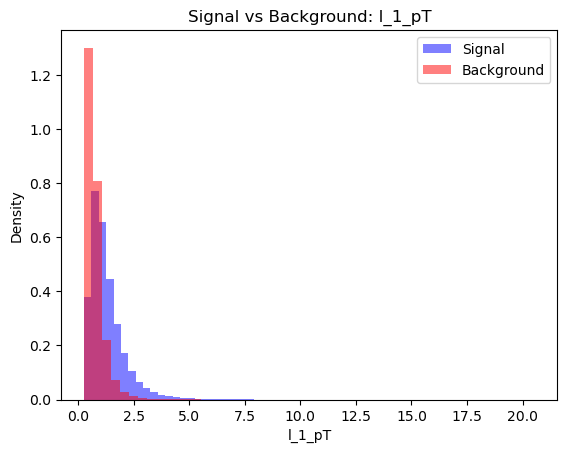

Analyzing l_1_eta...


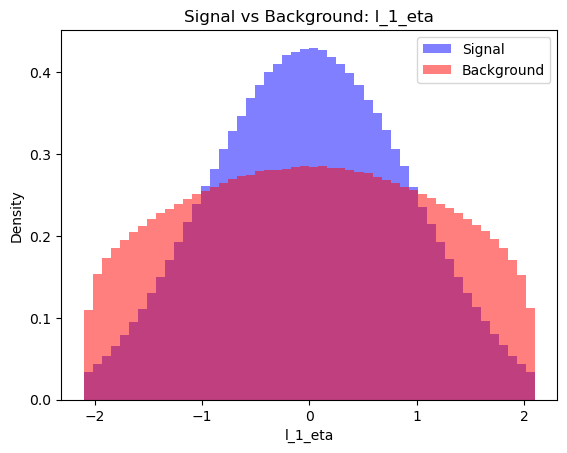

Analyzing l_1_phi...


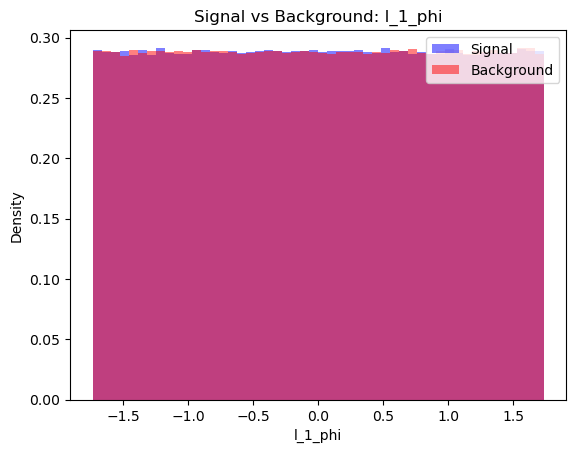

Analyzing l_2_pT...


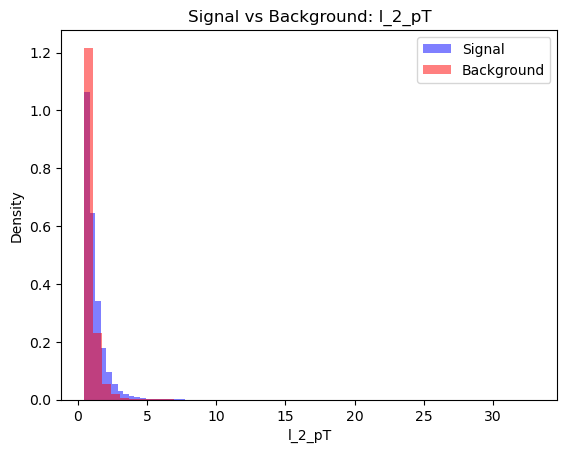

Analyzing l_2_eta...


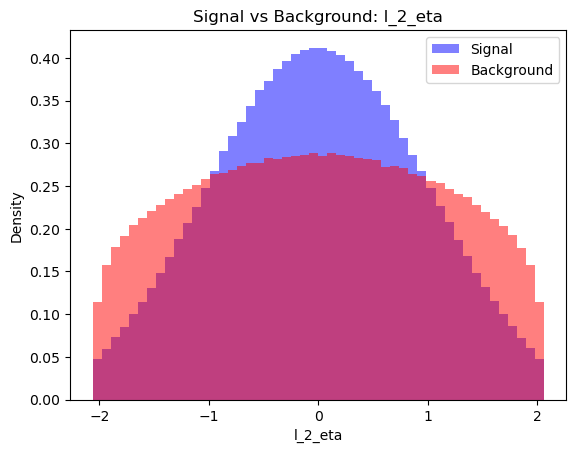

Analyzing l_2_phi...


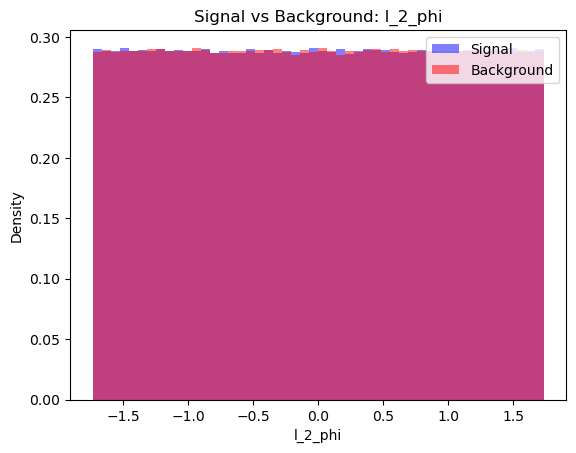

Analyzing MET...


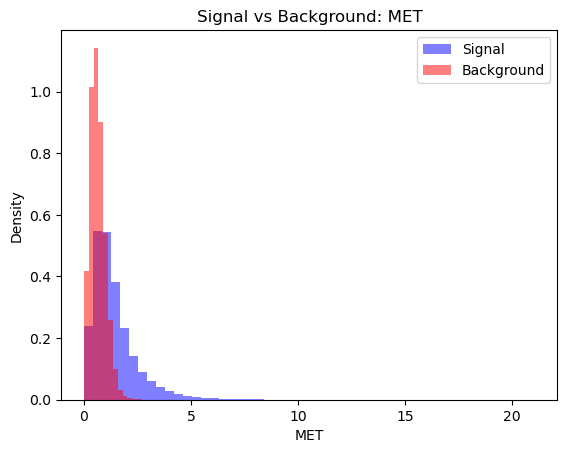

Analyzing MET_phi...


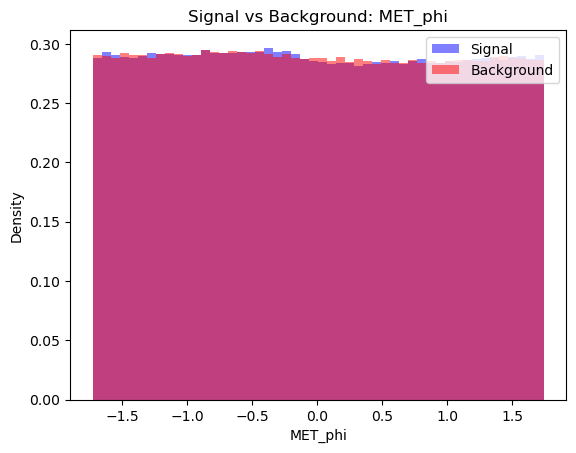

Analyzing MET_rel...


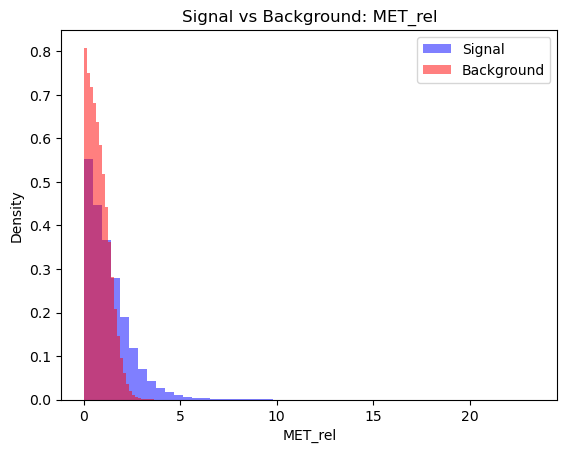

Analyzing dPhi_r_b...


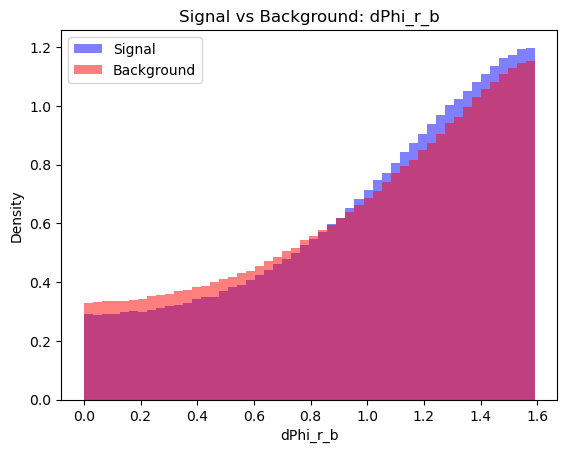

Analyzing cos_theta_r1...


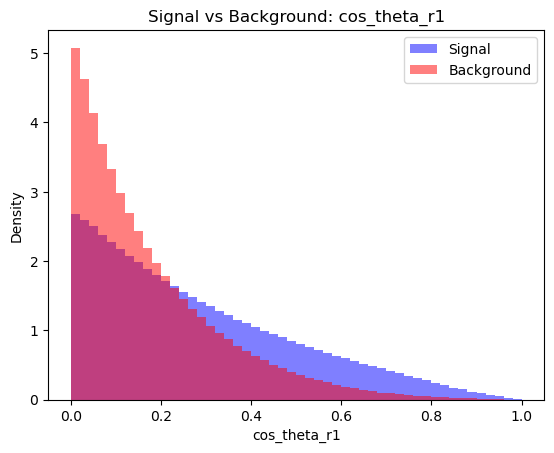

Analyzing R...


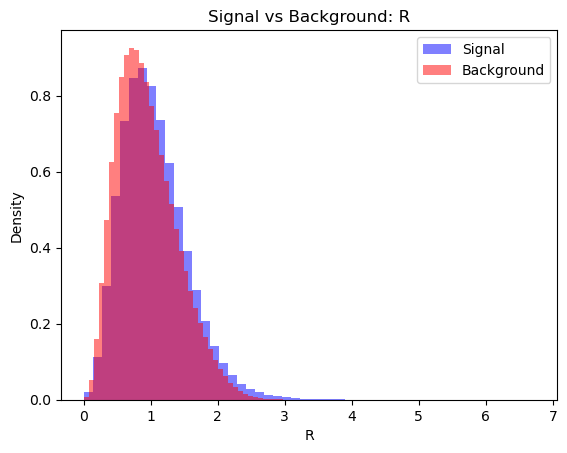

Analyzing M_TR_2...


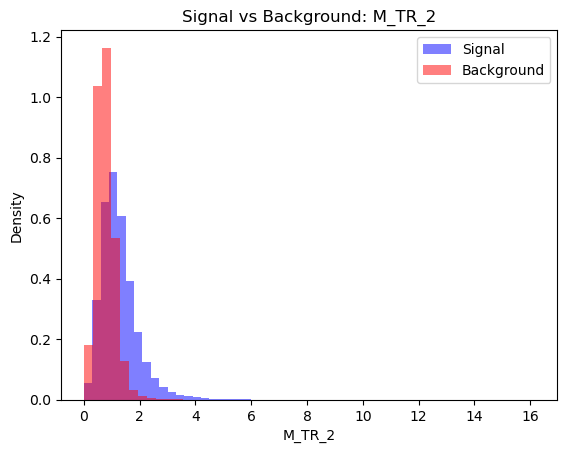

Analyzing MT2...


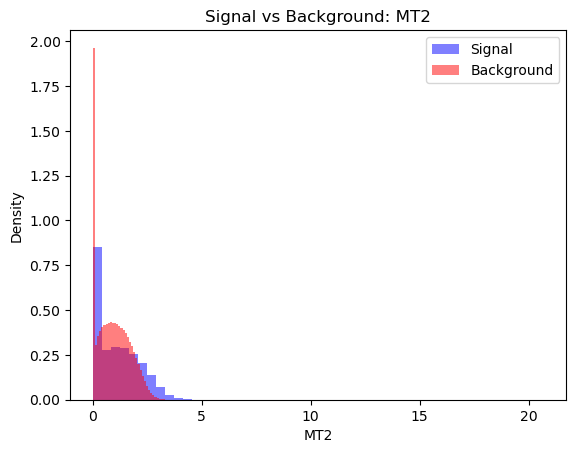

Analyzing M_R...


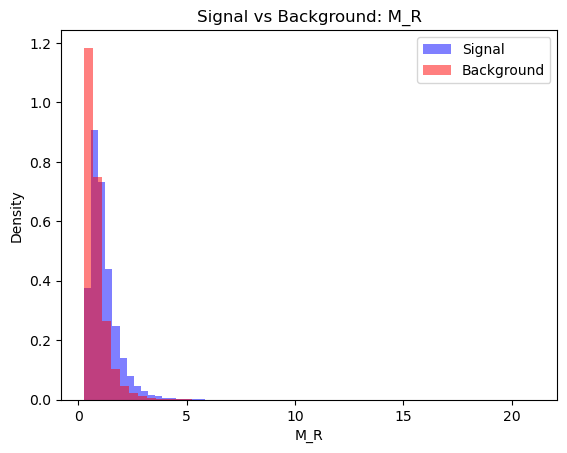

Analyzing M_Delta_R...


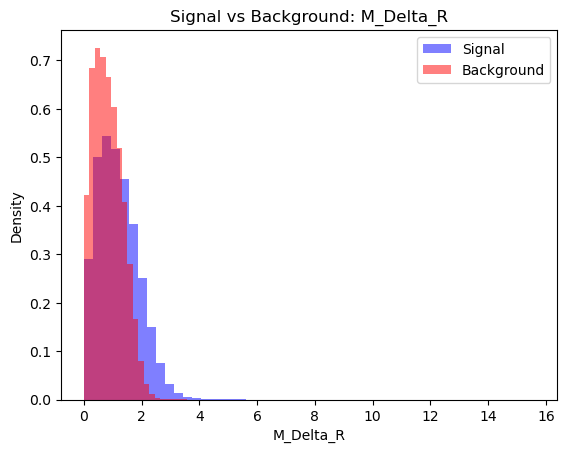

Analyzing S_R...


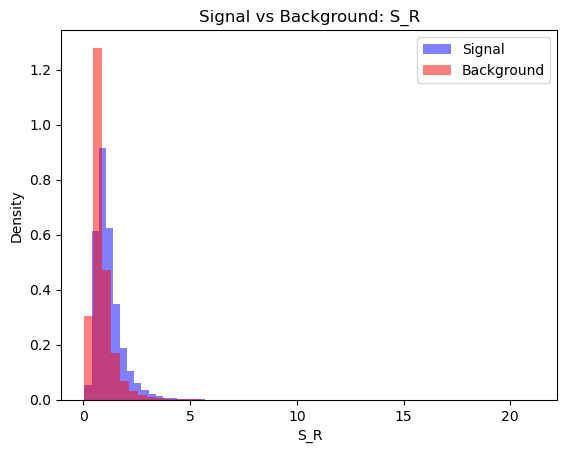

Analyzing axial_MET...


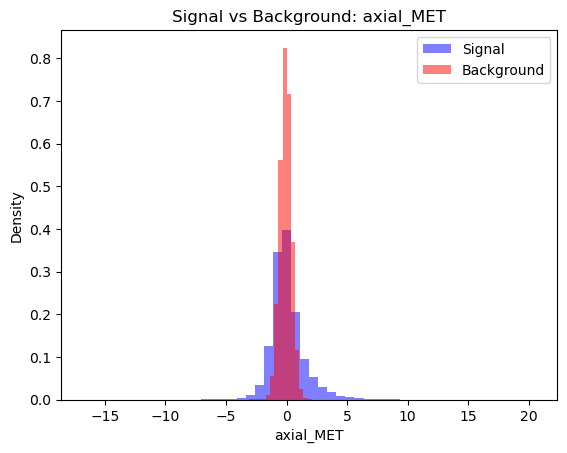

{'MET': {'x < x_c': (21.069, 0.458),
         'x > x_c': (11.492, 1.0),
         '|x - mu| < x_c': (20.43, 0.458),
         '|x - mu| > x_c': (10.854, 1.0)},
 'MET_phi': {'x < x_c': (-1.517, 0.458),
             'x > x_c': (1.671, 0.462),
             '|x - mu| < x_c': (1.32, 0.458),
             '|x - mu| > x_c': (1.706, 0.459)},
 'MET_rel': {'x < x_c': (22.678, 0.458),
             'x > x_c': (8.032, 1.0),
             '|x - mu| < x_c': (22.678, 0.458),
             '|x - mu| > x_c': (7.087, 1.0)},
 'MT2': {'x < x_c': (0.209, 0.53),
         'x > x_c': (5.015, 1.0),
         '|x - mu| < x_c': (19.85, 0.458),
         '|x - mu| > x_c': (3.97, 1.0)},
 'M_Delta_R': {'x < x_c': (14.668, 0.458),
               'x > x_c': (9.465, 1.0),
               '|x - mu| < x_c': (14.825, 0.458),
               '|x - mu| > x_c': (8.676, 1.0)},
 'M_R': {'x < x_c': (8.044, 0.458),
         'x > x_c': (1.949, 0.691),
         '|x - mu| < x_c': (7.203, 0.458),
         '|x - mu| > x_c': (1.108, 0.691)},
 

In [41]:
def plot_signal_background_distribution(data, observable, signal_mask, background_mask):
    plt.hist(data[observable][signal_mask], bins=50, alpha=0.5, label='Signal', density=True, color='blue')
    plt.hist(data[observable][background_mask], bins=50, alpha=0.5, label='Background', density=True, color='red')
    plt.xlabel(observable)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Signal vs Background: {observable}")
    plt.show()

def find_optimal_threshold(data, observable, signal_mask, background_mask):
    mu = data[observable][background_mask].mean()
    total_signal = signal_mask.sum()
    total_background = background_mask.sum()

    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    results = {'x > x_c': (0, 0), 'x < x_c': (0, 0), '|x - mu| > x_c': (0, 0), '|x - mu| < x_c': (0, 0)}

    for x_c in x_values:
        for criterion, condition in {
            'x > x_c': (data[observable] > x_c),
            'x < x_c': (data[observable] < x_c),
            '|x - mu| > x_c': (np.abs(data[observable] - mu) > x_c),
            '|x - mu| < x_c': (np.abs(data[observable] - mu) < x_c),
        }.items():
            signal_pass = np.sum(signal_mask & condition)
            background_pass = np.sum(background_mask & condition)
            signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
            if signal_purity > results[criterion][1]:
                results[criterion] = (x_c, signal_purity)

    return results

def format_results(results, decimals=3):
    return {k: (round(v[0], decimals), round(v[1], decimals)) for k, v in results.items()}

def automate_analysis(data, observables, label_column='signal'):
    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    optimal_thresholds_all = {}

    for observable in observables:
        print(f"Analyzing {observable}...")
        plot_signal_background_distribution(data, observable, signal_mask, background_mask)
        thresholds = find_optimal_threshold(data, observable, signal_mask, background_mask)
        optimal_thresholds_all[observable] = format_results(thresholds)

    return optimal_thresholds_all

observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

optimal_thresholds = automate_analysis(df, observables, label_column='signal')

from pprint import pprint
pprint(optimal_thresholds)


#### Exercise 5.2 solutions

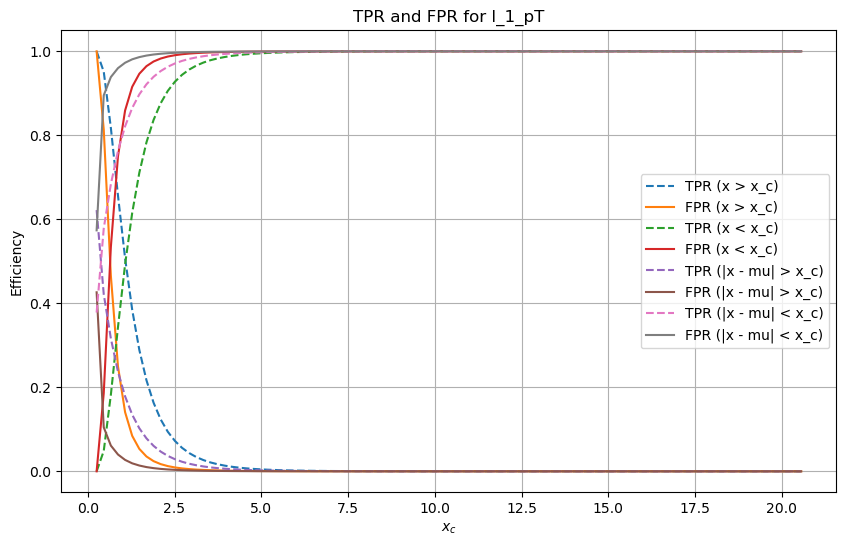

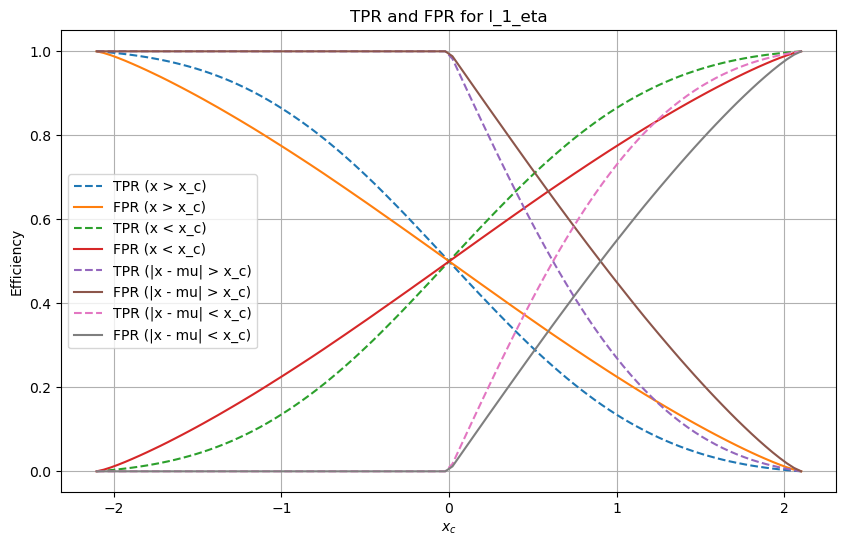

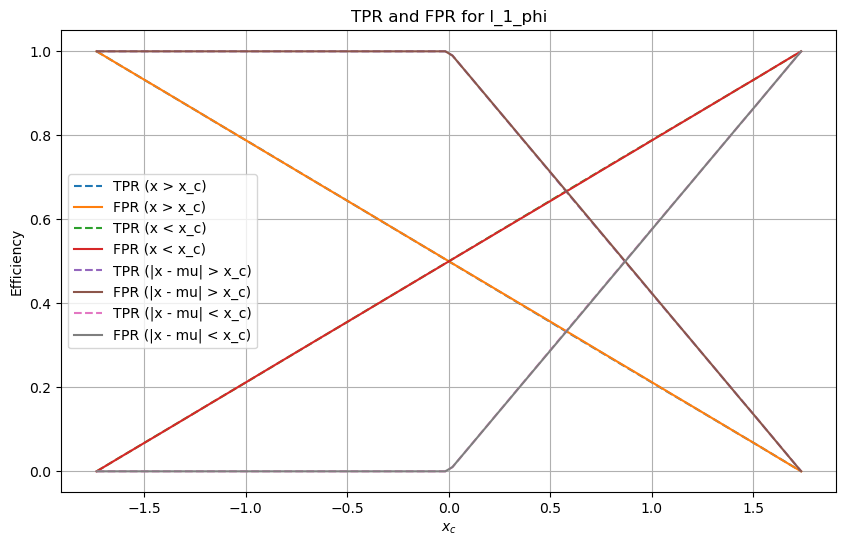

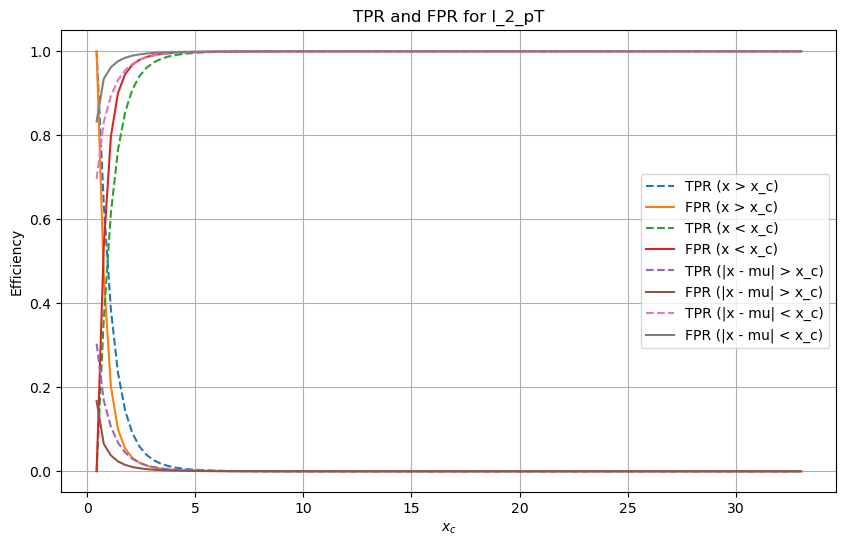

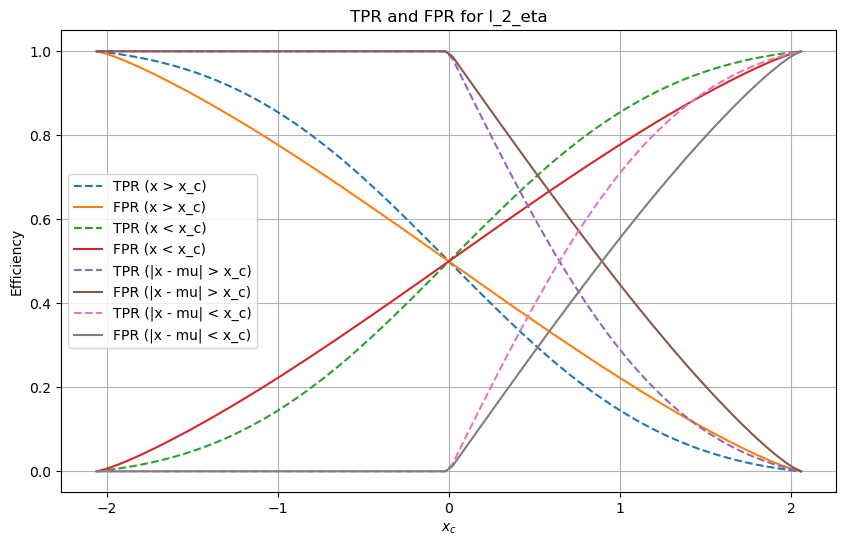

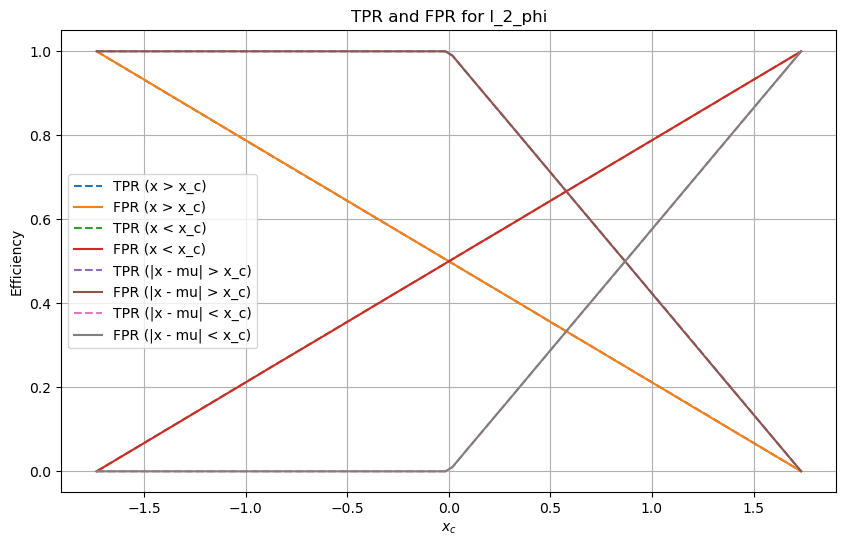

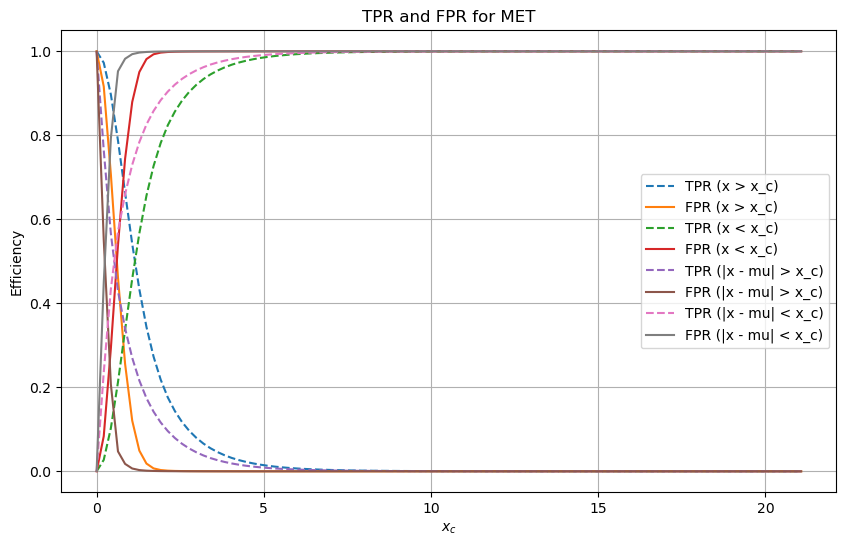

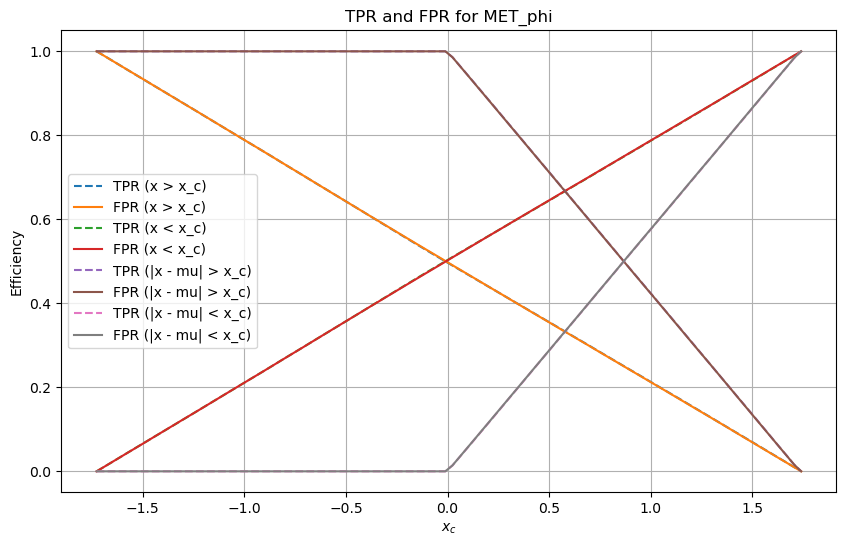

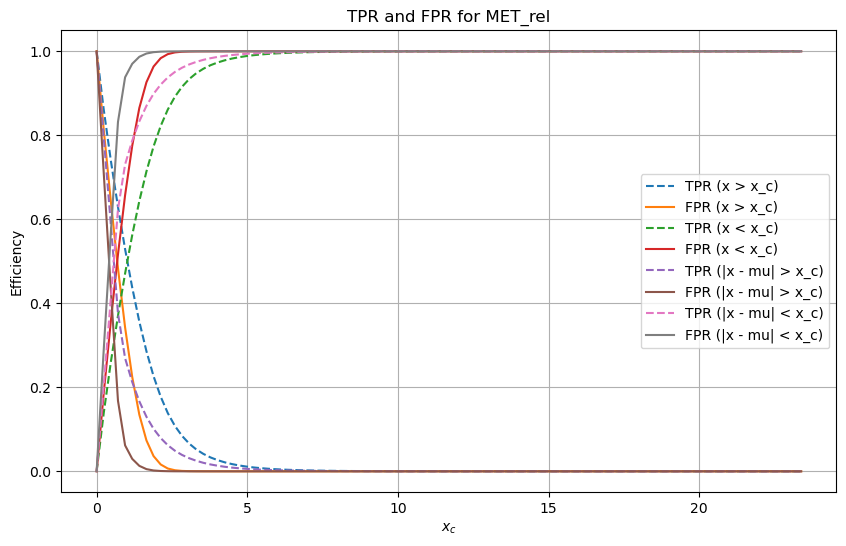

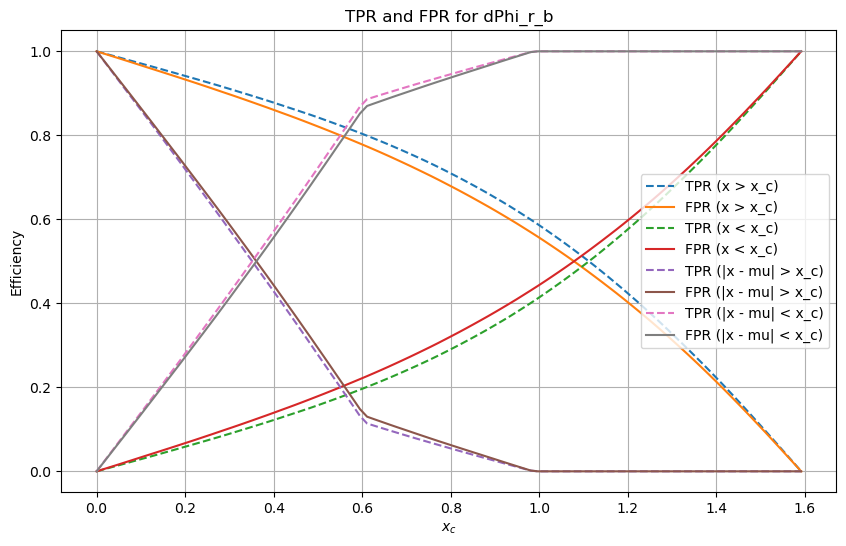

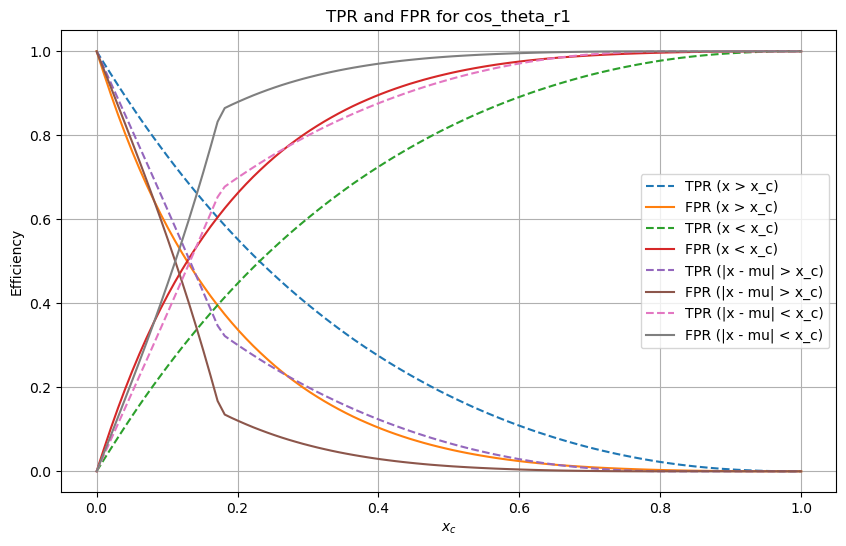

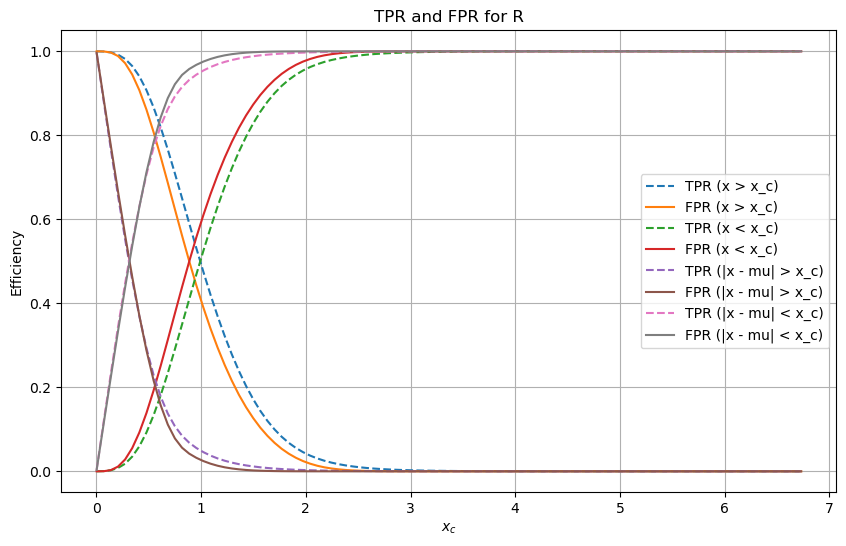

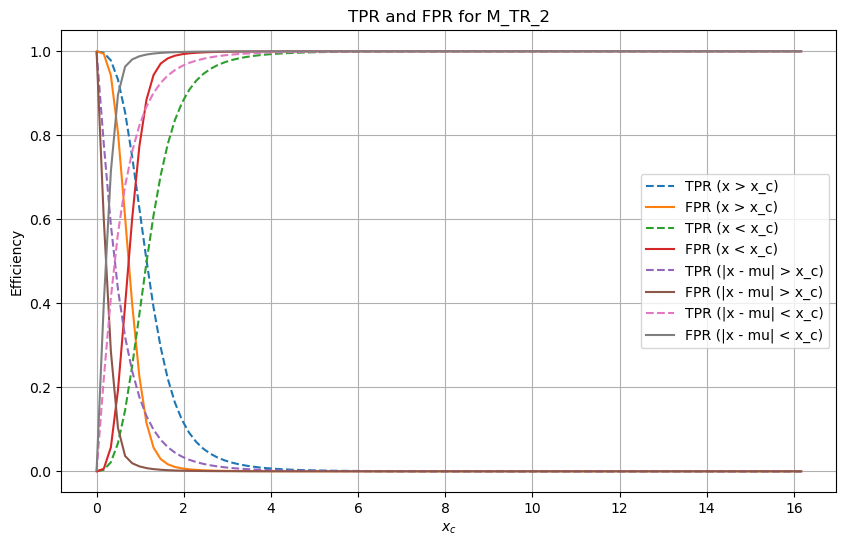

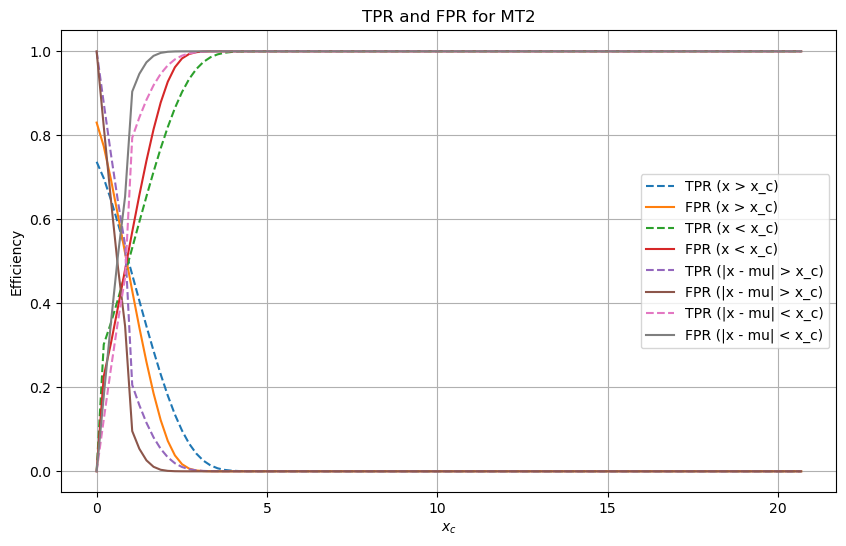

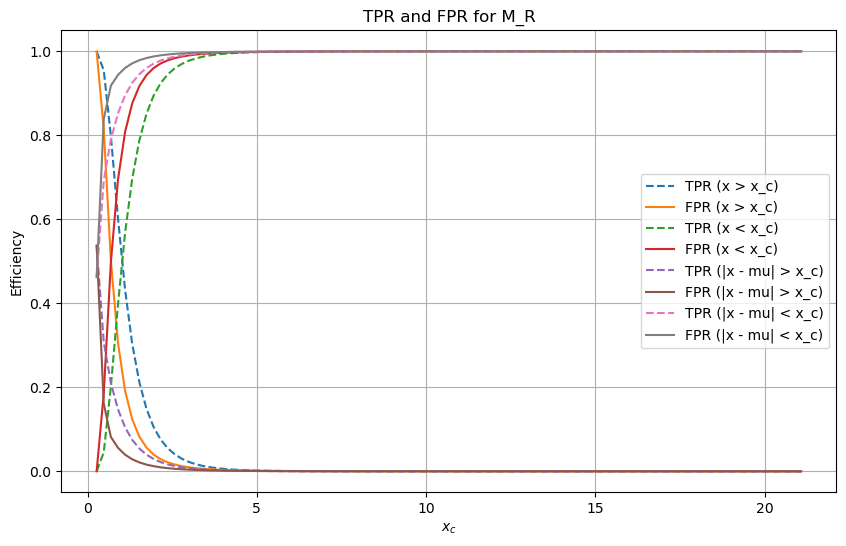

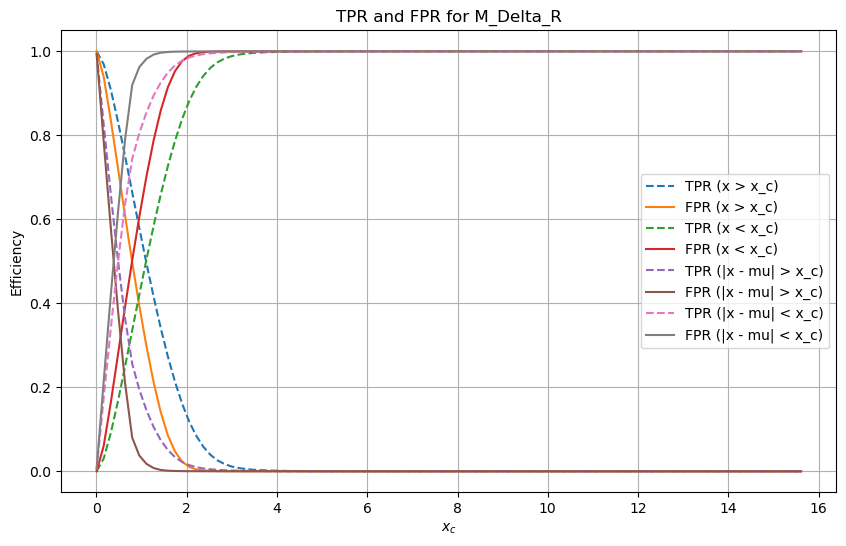

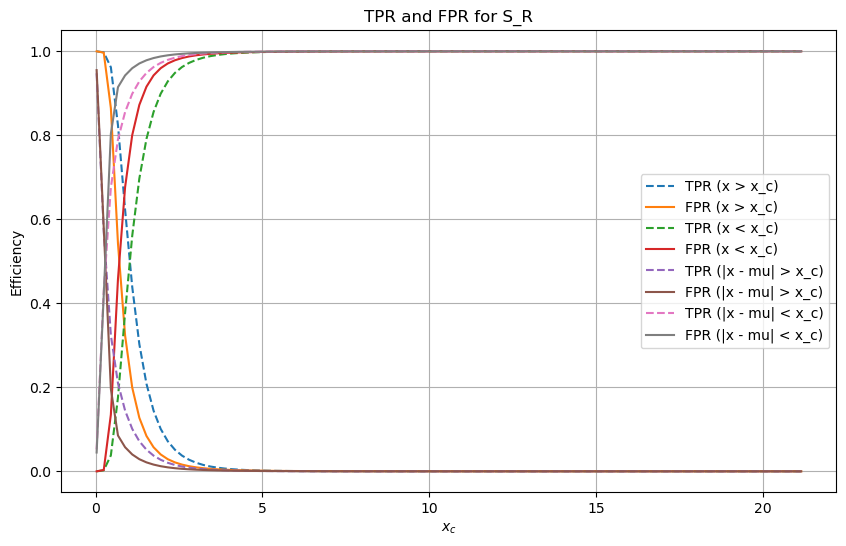

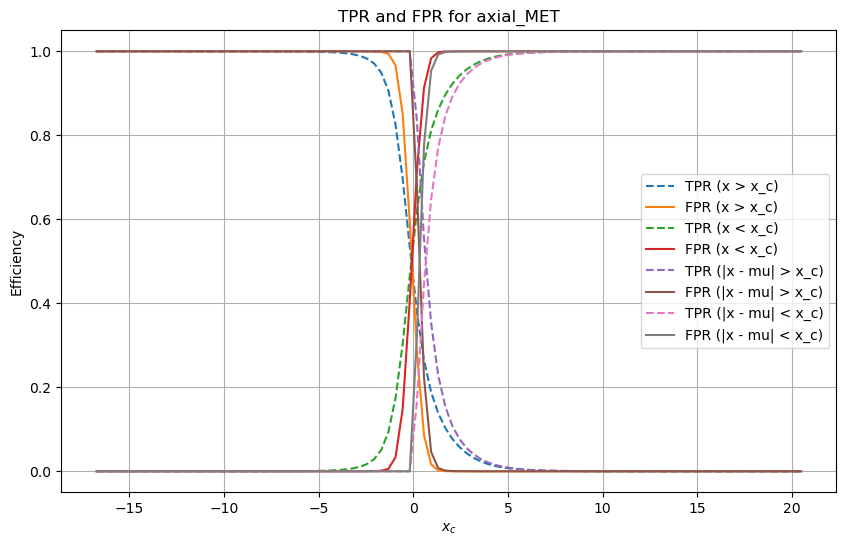

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def compute_tpr_fpr(data, observable, signal_mask, background_mask, strategy):
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    tpr_values = []
    fpr_values = []
    mu = data[observable][background_mask].mean()  

    for x_c in x_values:
        if strategy == 'x > x_c':
            signal_pass = np.sum(signal_mask & (data[observable] > x_c))
            background_pass = np.sum(background_mask & (data[observable] > x_c))
        elif strategy == 'x < x_c':
            signal_pass = np.sum(signal_mask & (data[observable] < x_c))
            background_pass = np.sum(background_mask & (data[observable] < x_c))
        elif strategy == '|x - mu| > x_c':
            signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) > x_c))
            background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) > x_c))
        elif strategy == '|x - mu| < x_c':
            signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) < x_c))
            background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) < x_c))
        else:
            raise ValueError("Invalid strategy provided.")

        total_signal = signal_mask.sum()
        total_background = background_mask.sum()
    
        tpr = signal_pass / total_signal if total_signal > 0 else 0
        fpr = background_pass / total_background if total_background > 0 else 0
        
        tpr_values.append(tpr)
        fpr_values.append(fpr)

    return x_values, tpr_values, fpr_values

def plot_tpr_fpr(data, observables, strategies, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0

    for observable in observables:
        plt.figure(figsize=(10, 6))
        for strategy in strategies:
            x_values, tpr_values, fpr_values = compute_tpr_fpr(data, observable, signal_mask, background_mask, strategy)
            plt.plot(x_values, tpr_values, label=f"TPR ({strategy})", linestyle='--')
            plt.plot(x_values, fpr_values, label=f"FPR ({strategy})")
        
        plt.title(f"TPR and FPR for {observable}")
        plt.xlabel("$x_c$")
        plt.ylabel("Efficiency")
        plt.legend()
        plt.grid(True)
        plt.show()

strategies = ['x > x_c', 'x < x_c', '|x - mu| > x_c', '|x - mu| < x_c']
observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

plot_tpr_fpr(df, observables, strategies, label_column='signal')


#### Exercise 5.3 solutions

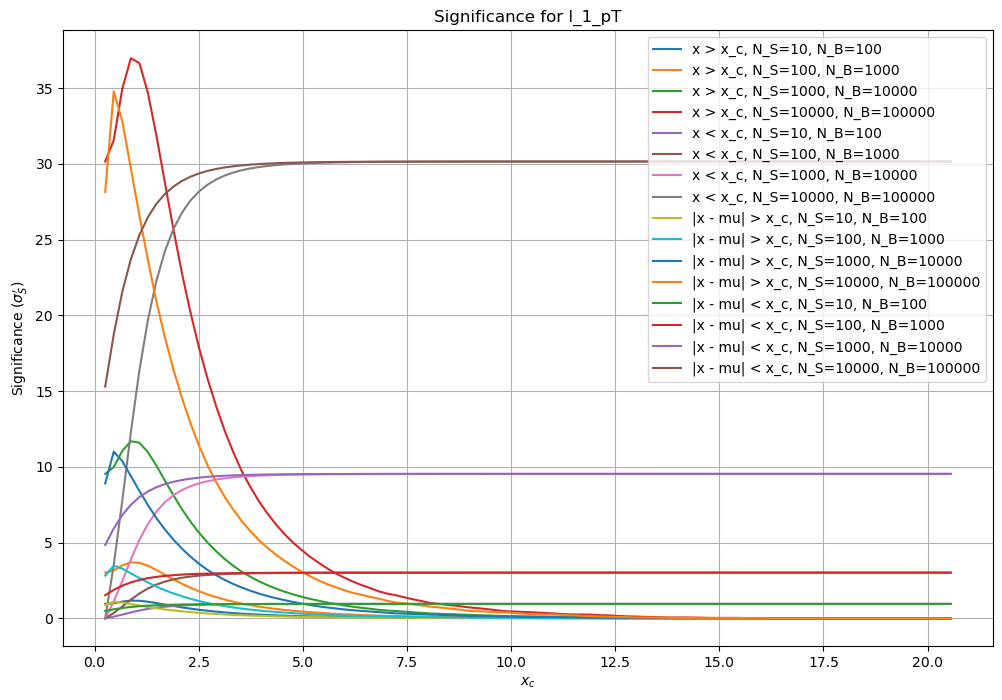

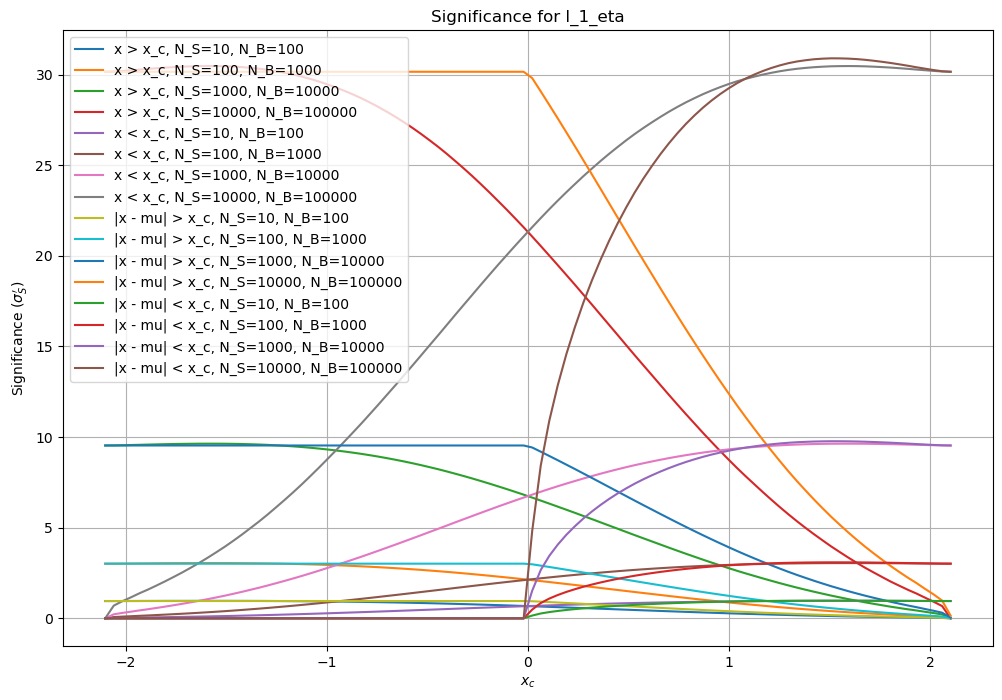

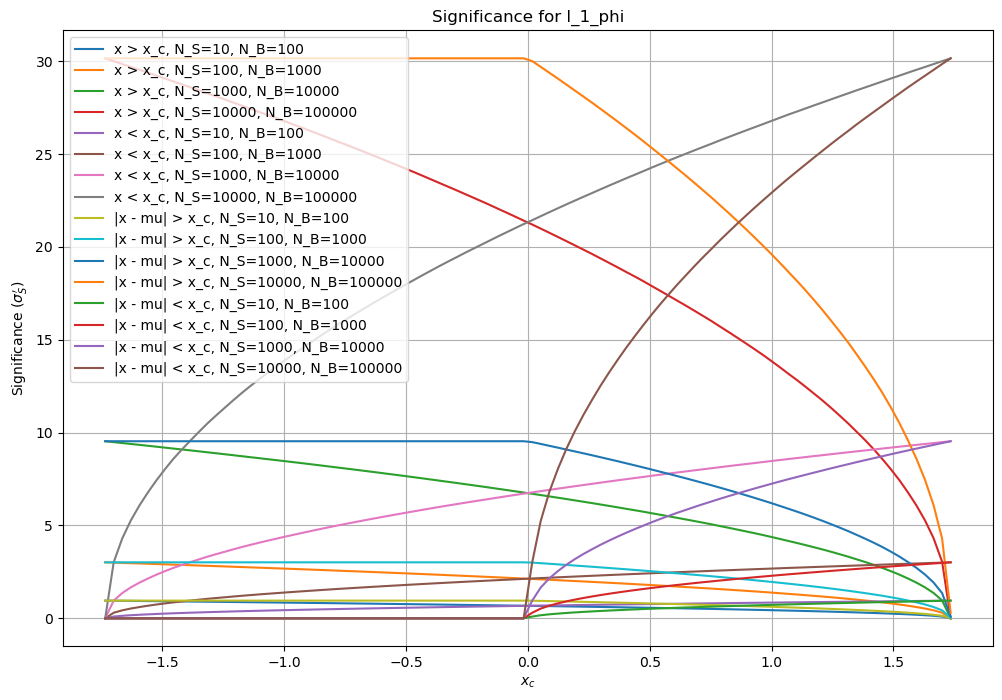

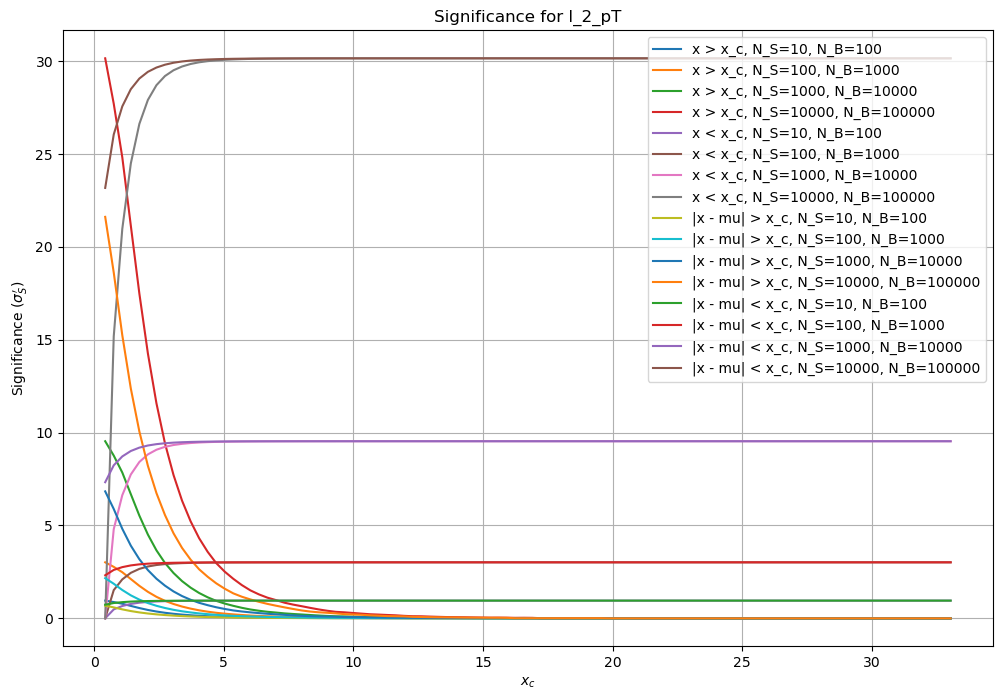

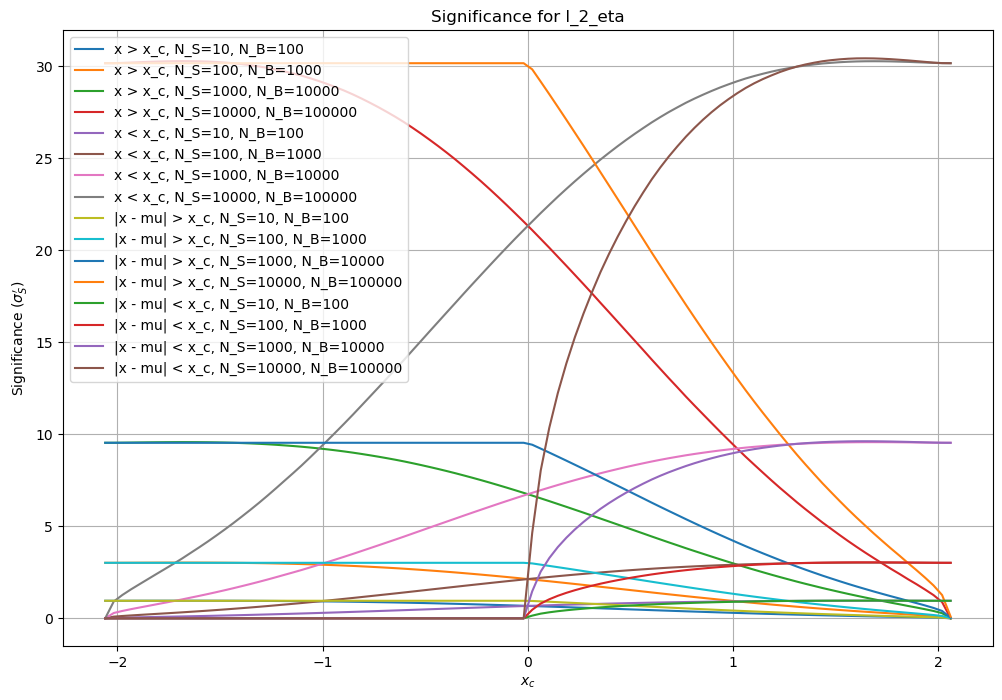

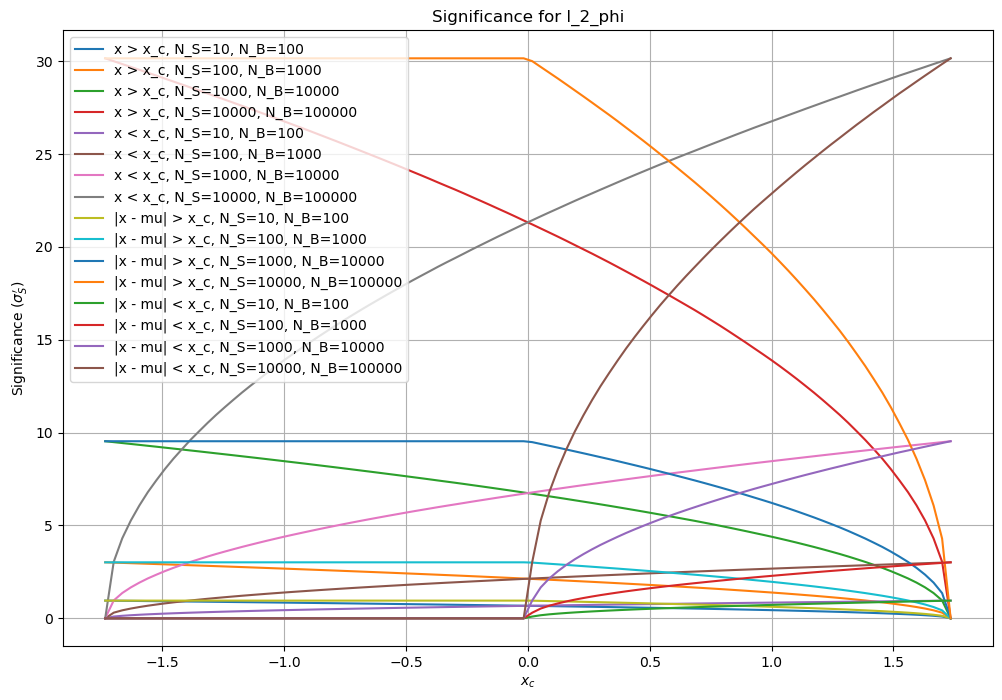

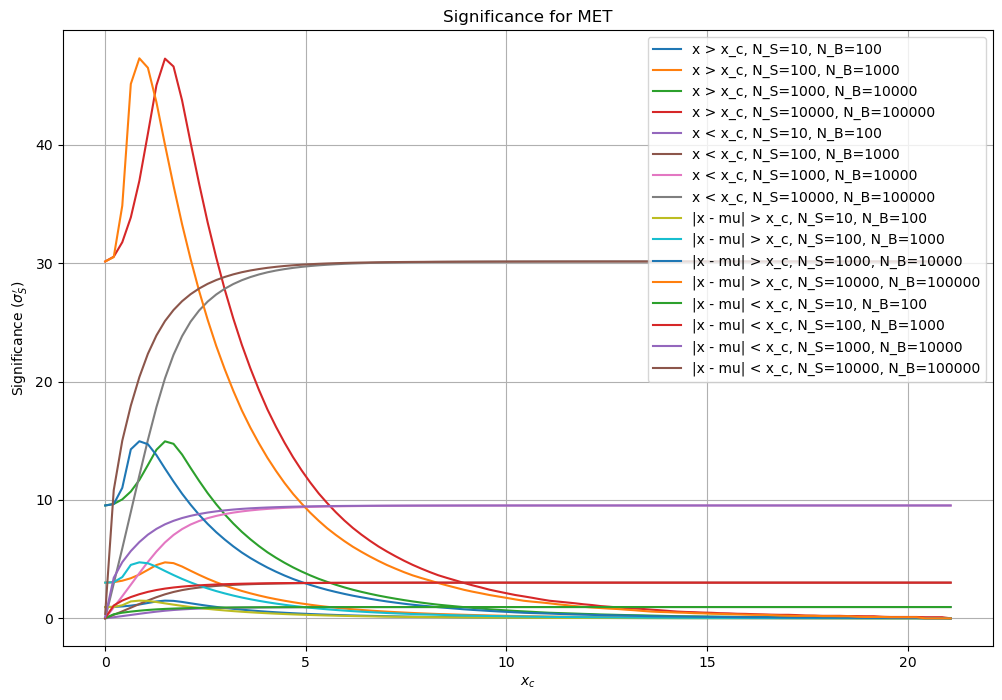

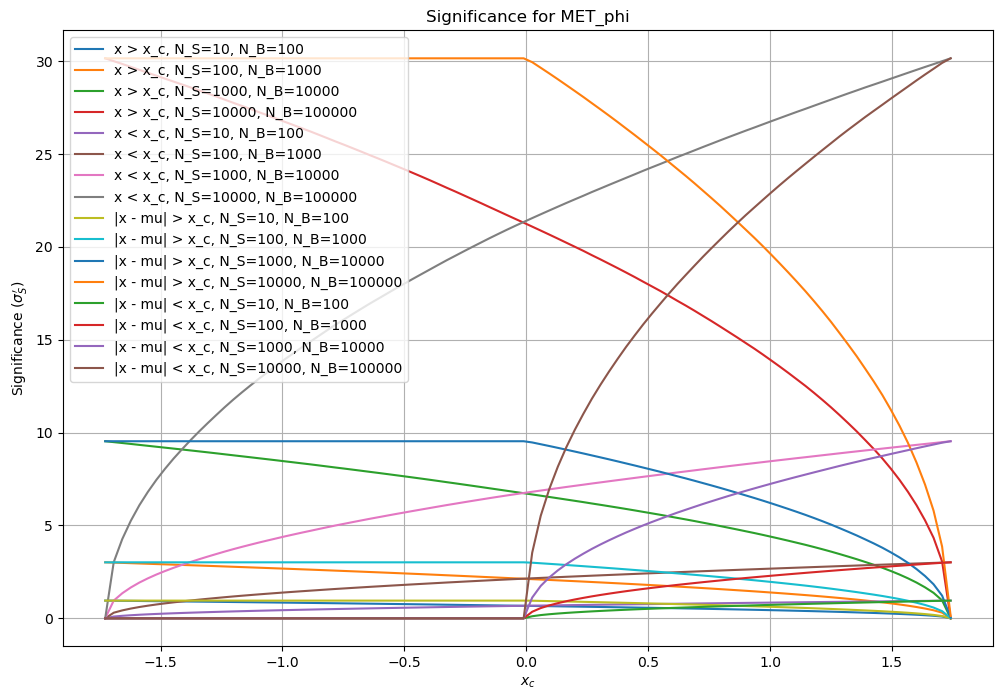

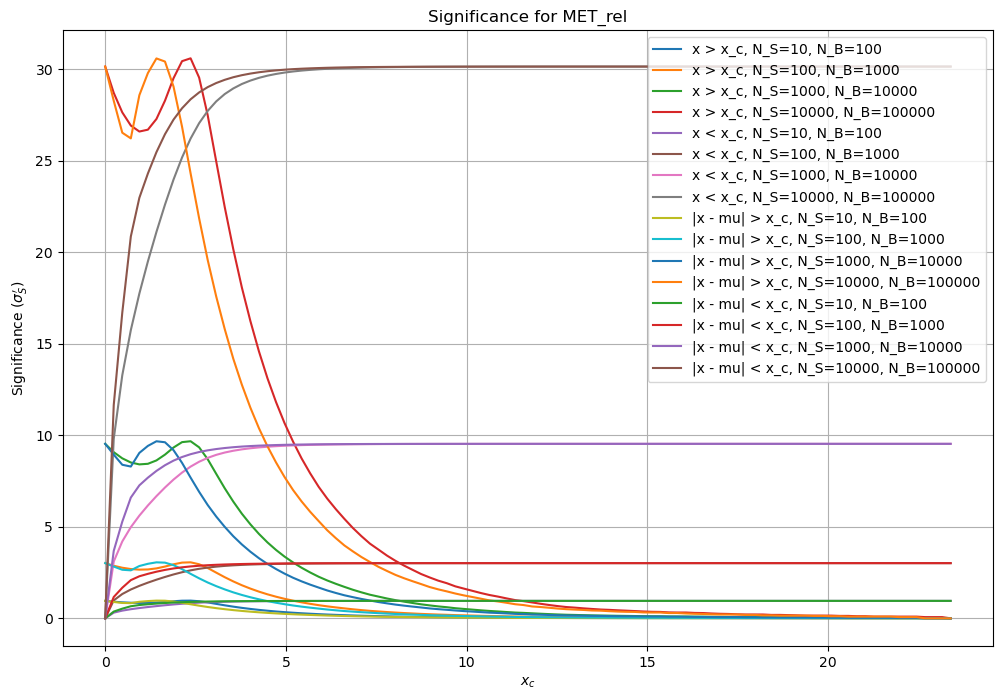

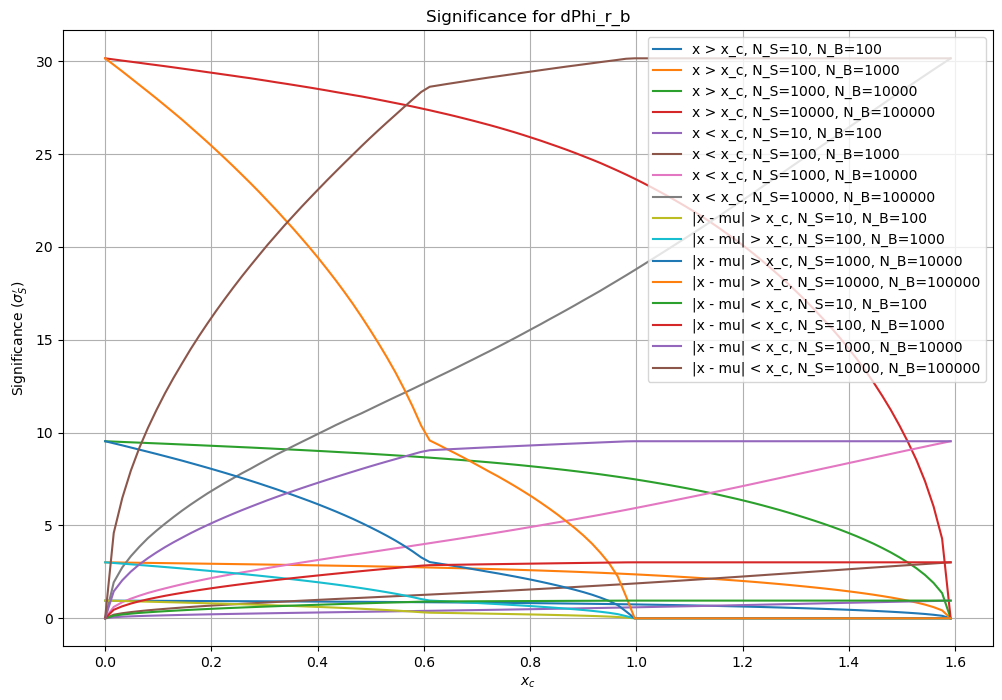

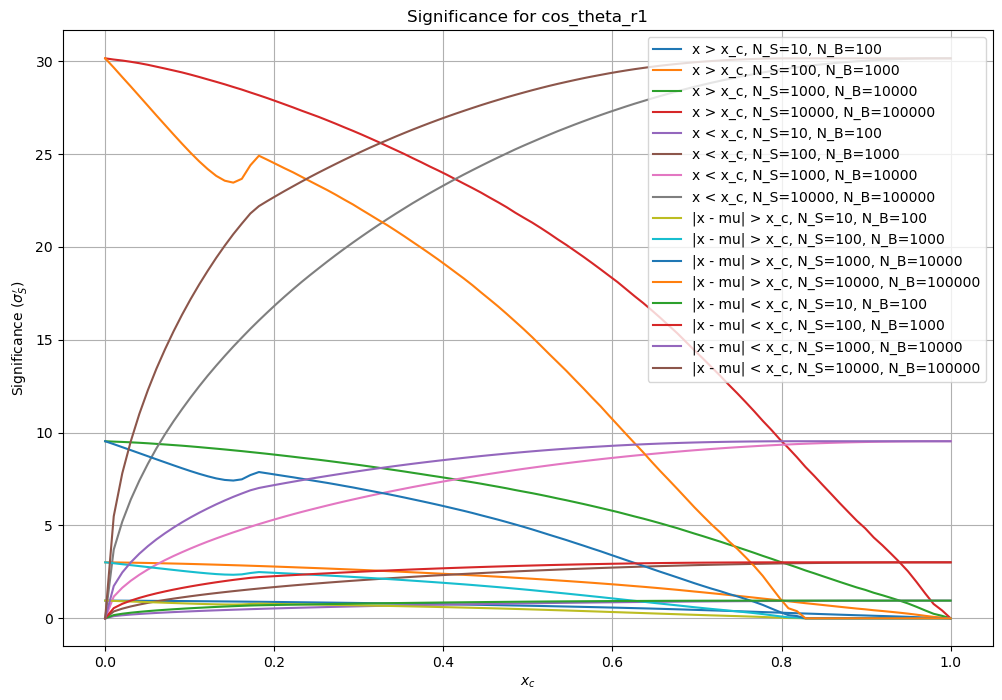

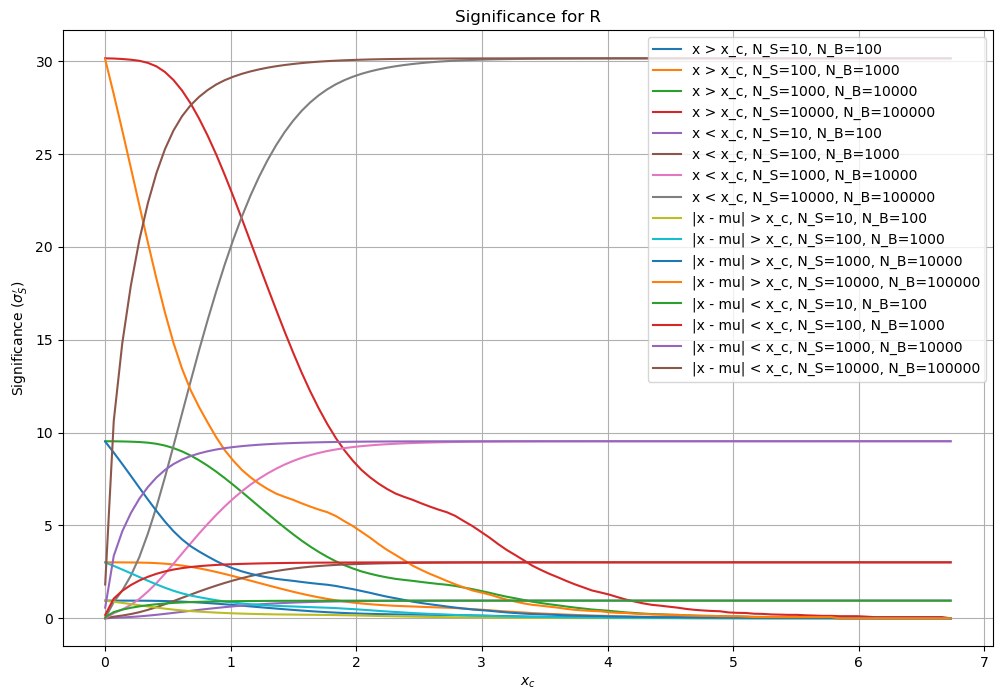

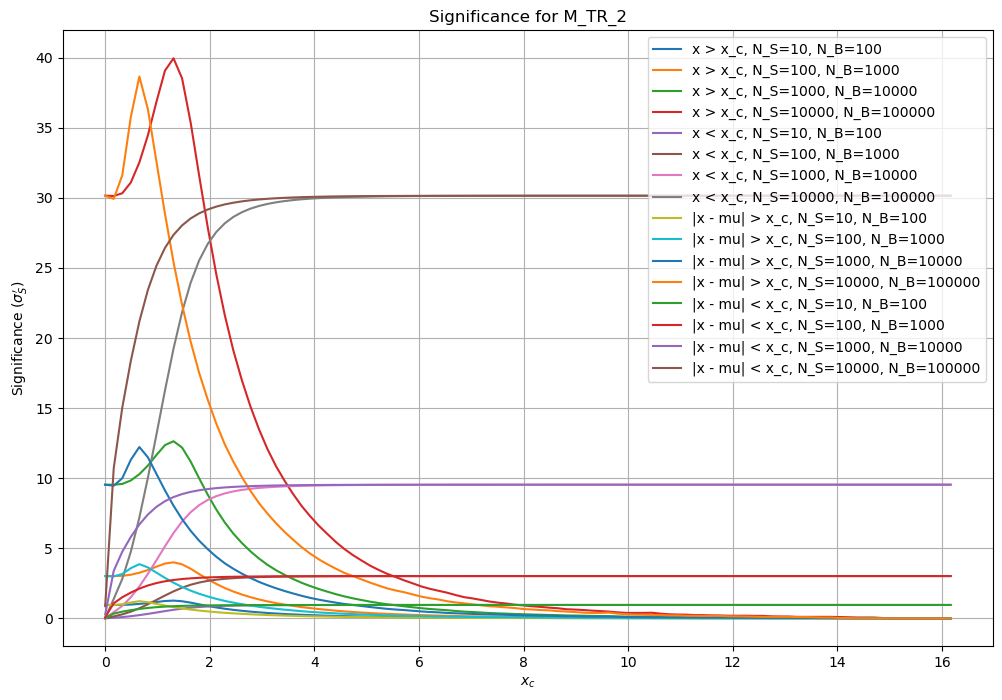

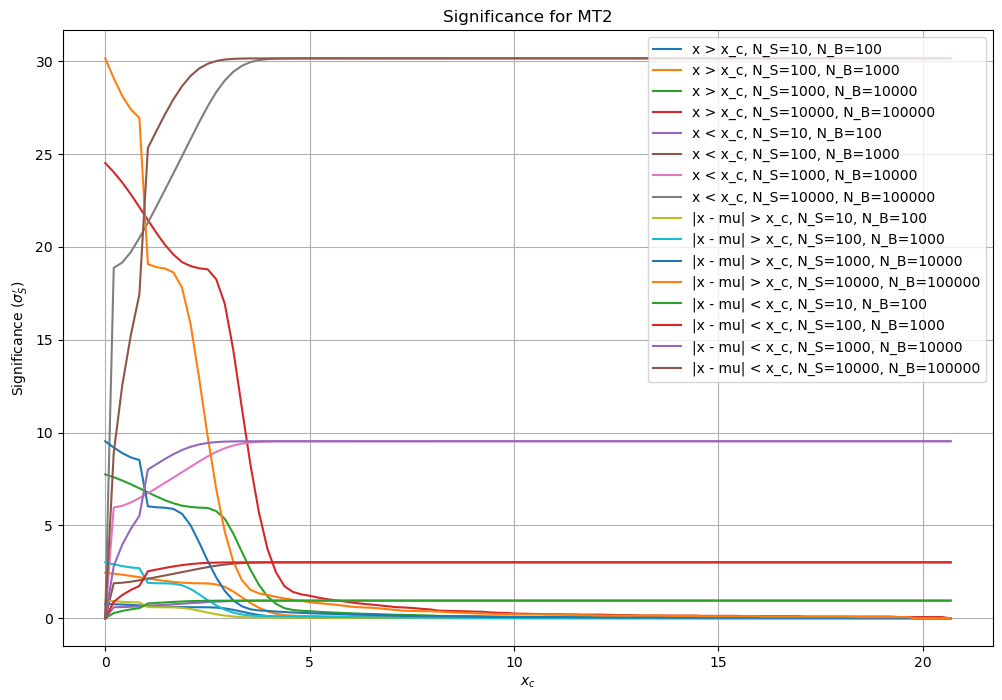

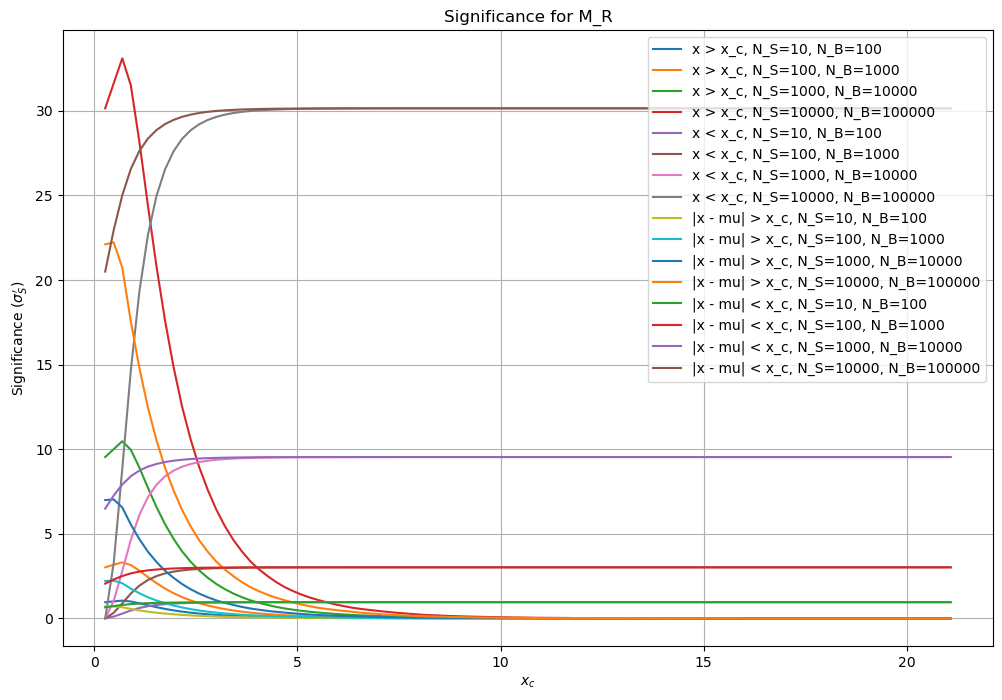

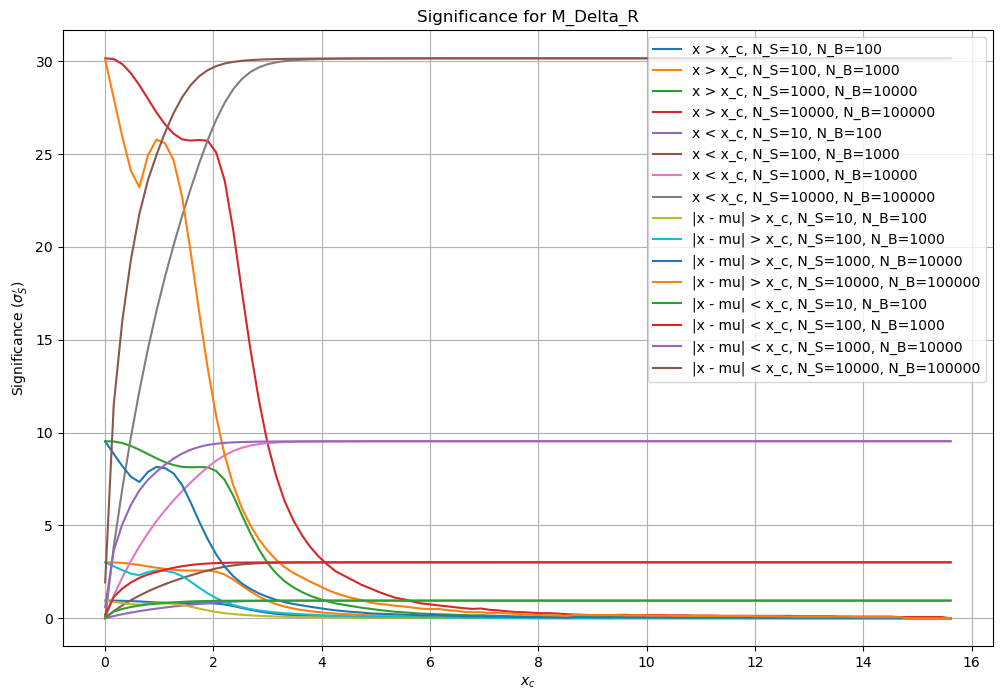

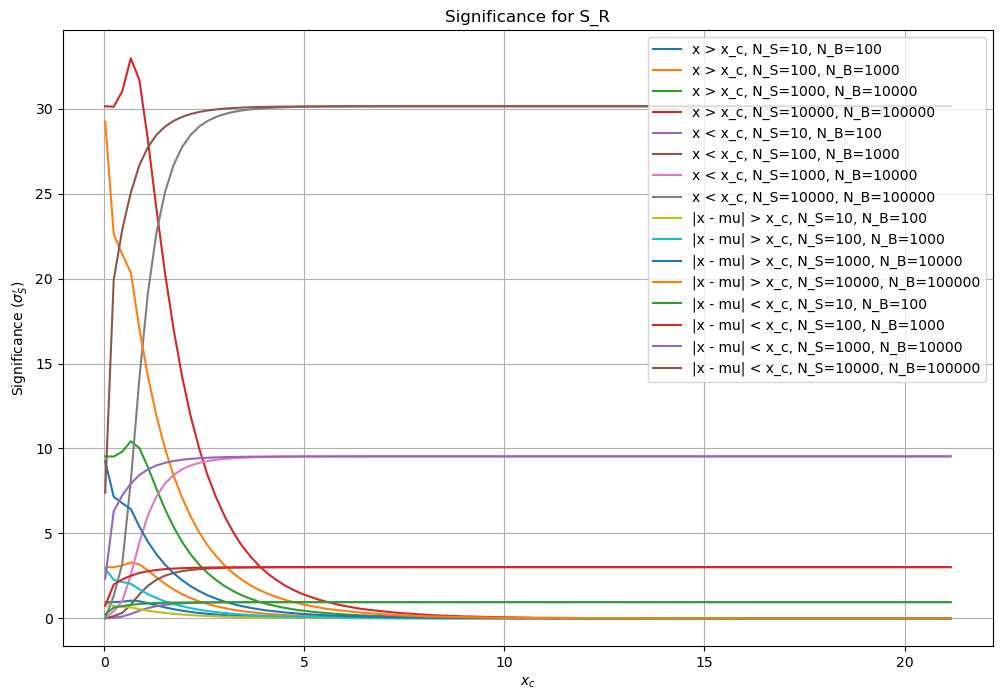

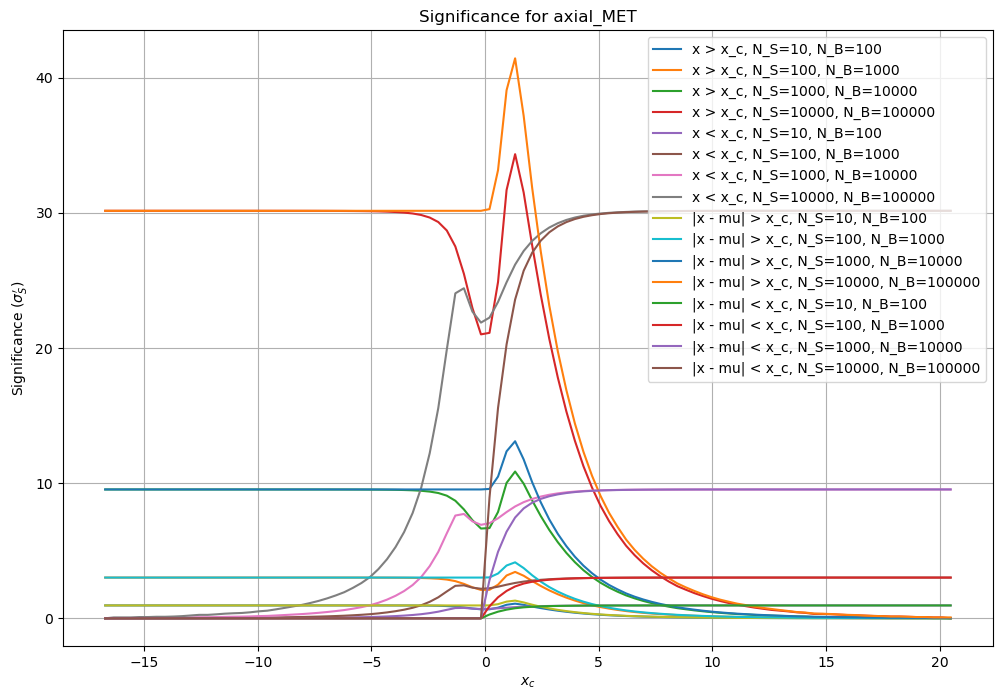

In [43]:
def compute_significance(data, observable, signal_mask, background_mask, strategy, scenarios):
    
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    mu = data[observable][background_mask].mean()  # For centered strategies

    significance_scenarios = {scenario: [] for scenario in scenarios}
    
    for x_c in x_values:
        # Compute TPR and FPR
        if strategy == 'x > x_c':
            signal_pass = np.sum(signal_mask & (data[observable] > x_c))
            background_pass = np.sum(background_mask & (data[observable] > x_c))
        elif strategy == 'x < x_c':
            signal_pass = np.sum(signal_mask & (data[observable] < x_c))
            background_pass = np.sum(background_mask & (data[observable] < x_c))
        elif strategy == '|x - mu| > x_c':
            signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) > x_c))
            background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) > x_c))
        elif strategy == '|x - mu| < x_c':
            signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) < x_c))
            background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) < x_c))
        else:
            raise ValueError("Invalid strategy provided.")

        total_signal = signal_mask.sum()
        total_background = background_mask.sum()
        
        epsilon_s = signal_pass / total_signal if total_signal > 0 else 0
        epsilon_b = background_pass / total_background if total_background > 0 else 0
        
        for scenario in scenarios:
            N_S, N_B = scenario
            N_S_prime = epsilon_s * N_S
            N_B_prime = epsilon_b * N_B
            significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime) if (N_S_prime + N_B_prime) > 0 else 0
            significance_scenarios[scenario].append(significance)
    
    return x_values, significance_scenarios

def plot_significance(data, observables, strategies, scenarios, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0

    for observable in observables:
        plt.figure(figsize=(12, 8))
        
        for strategy in strategies:
            x_values, significance_scenarios = compute_significance(data, observable, signal_mask, background_mask, strategy, scenarios)
            
            for scenario, significance_values in significance_scenarios.items():
                plt.plot(x_values, significance_values, label=f"{strategy}, N_S={scenario[0]}, N_B={scenario[1]}")
        
        plt.title(f"Significance for {observable}")
        plt.xlabel("$x_c$")
        plt.ylabel("Significance ($\\sigma_S'$)")
        plt.legend()
        plt.grid(True)
        plt.show()

scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

strategies = ['x > x_c', 'x < x_c', '|x - mu| > x_c', '|x - mu| < x_c']
observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

plot_significance(df, observables, strategies, scenarios, label_column='signal')


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




#### exercise 6.1 solutions

In [47]:
import numpy as np
from tabulate import tabulate

def calculate_cut_flow(data, selected_observables, signal_mask, background_mask, N_S, N_B):

    cut_flow_table = []

    total_signal = signal_mask.sum()
    total_background = background_mask.sum()

    signal_efficiency = 1.0
    background_efficiency = 1.0
    N_prime_S = N_S
    N_prime_B = N_B

    cut_flow_table.append([
        "No cuts", signal_efficiency, background_efficiency, N_prime_S, N_prime_B, 
        N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0
    ])

    for observable, threshold in selected_observables.items():
        signal_pass = np.sum(signal_mask & (data[observable] > threshold))
        background_pass = np.sum(background_mask & (data[observable] > threshold))

        signal_efficiency = signal_pass / total_signal if total_signal > 0 else 0
        background_efficiency = background_pass / total_background if total_background > 0 else 0

        N_prime_S = signal_efficiency * N_S
        N_prime_B = background_efficiency * N_B

        cut_flow_table.append([
            f"Cut: {observable} > {threshold}", signal_efficiency, background_efficiency, N_prime_S, N_prime_B, 
            N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0
        ])

    return cut_flow_table

def display_cut_flow_table(cut_flow_table, scenario):
    headers = ["Selection Step", r"epsilon_S", r"epsilon_B", r"N'_S", r"N'_B", r"sigma_{S'}"]
    print(f"Cut-flow table for scenario (N_S={scenario[0]}, N_B={scenario[1]}):")
    print(tabulate(cut_flow_table, headers=headers, floatfmt=".3f", tablefmt="pretty"))

def automate_cut_flow(data, selected_observables, scenarios, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0

    for scenario in scenarios:
        cut_flow_table = calculate_cut_flow(data, selected_observables, signal_mask, background_mask, scenario[0], scenario[1])
        display_cut_flow_table(cut_flow_table, scenario)

selected_observables = {
    'l_1_pT': 11.492,  
    'MET': 21.069,
    'M_TR_2': 10.854
}

scenarios = [
    (10, 100),  
    (100, 1000), 
    (1000, 10000), 
    (10000, 100000) 
]

automate_cut_flow(df, selected_observables, scenarios, label_column='signal')


Cut-flow table for scenario (N_S=10, N_B=100):
+----------------------+------------------------+-----------------------+------------------------+-----------------------+----------------------+
|    Selection Step    |       epsilon_S        |       epsilon_B       |          N'_S          |         N'_B          |      sigma_{S'}      |
+----------------------+------------------------+-----------------------+------------------------+-----------------------+----------------------+
|       No cuts        |          1.0           |          1.0          |           10           |          100          |  0.9534625892455924  |
| Cut: l_1_pT > 11.492 | 2.4477375256083612e-05 |  6.6367447799237e-06  | 0.0002447737525608361  |  0.00066367447799237  | 0.008121098055716326 |
|  Cut: MET > 21.069   |          0.0           |          0.0          |          0.0           |          0.0          |          0           |
| Cut: M_TR_2 > 10.854 | 1.1801591641326027e-05 | 7.374160866581888e-07 | 0.0

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



#### exercise 7.1

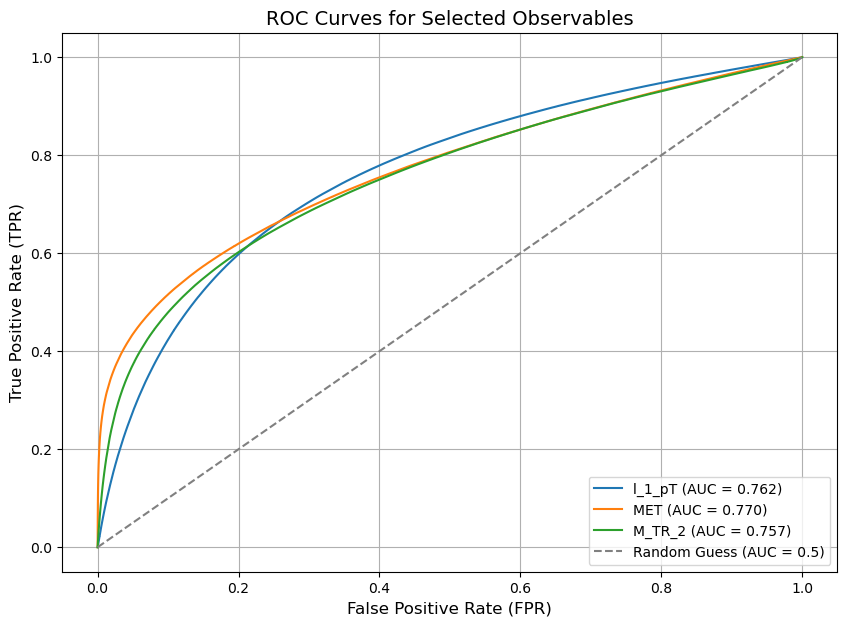

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_and_plot_roc(data, observables, signal_column):
    plt.figure(figsize=(10, 7))
    
    for obs in observables:
        labels = data[signal_column].values  
        scores = data[obs].values
        
        fpr, tpr, _ = roc_curve(labels, scores)
        auc_value = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f"{obs} (AUC = {auc_value:.3f})")
    
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess (AUC = 0.5)")
    
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.title("ROC Curves for Selected Observables", fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.show()

top_observables = ['l_1_pT', 'MET', 'M_TR_2']
signal_column = 'signal'

compute_and_plot_roc(df, top_observables, signal_column)


#### Exercise 7.2

ROC plot saved as: roc_curves.png


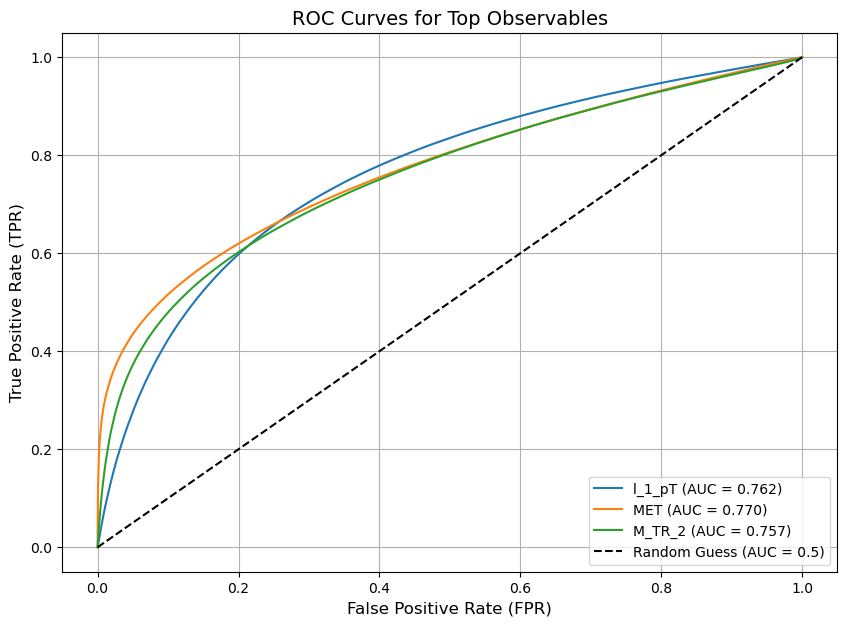

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def generate_roc_plot(data, observables, signal_column, title="ROC Curves", save_as=None):
    plt.figure(figsize=(10, 7))
    for obs in observables:
        true_labels = data[signal_column].values
        scores = data[obs].values
        fpr, tpr, _ = roc_curve(true_labels, scores)
        auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{obs} (AUC = {auc_value:.3f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
    
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    
    plt.show()
observables_to_analyze = ['l_1_pT', 'MET', 'M_TR_2']
signal_column_name = 'signal'

generate_roc_plot(
    df,
    observables_to_analyze,
    signal_column=signal_column_name,
    title="ROC Curves for Top Observables",
)


#### exercise 7.3

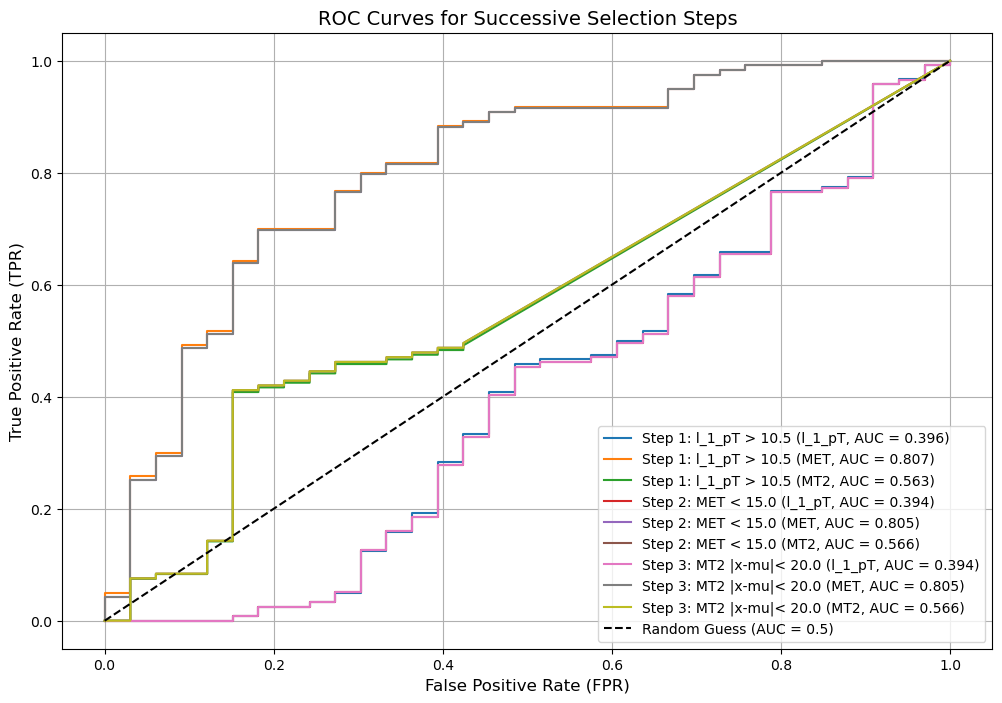

In [51]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def successive_selection_roc(data, observables, selection_steps, signal_column, title="ROC Curves After Selections", save_as=None):
    plt.figure(figsize=(12, 8))
    current_mask = np.ones(len(data), dtype=bool)
    
    for step_idx, (obs_to_filter, threshold, condition) in enumerate(selection_steps):
        if condition == '>':
            current_mask &= data[obs_to_filter] > threshold
        elif condition == '<':
            current_mask &= data[obs_to_filter] < threshold
        elif condition == '|x-mu|>':
            mu = data[obs_to_filter][~data[signal_column].astype(bool)].mean()
            current_mask &= np.abs(data[obs_to_filter] - mu) > threshold
        elif condition == '|x-mu|<':
            mu = data[obs_to_filter][~data[signal_column].astype(bool)].mean()
            current_mask &= np.abs(data[obs_to_filter] - mu) < threshold
        else:
            raise ValueError(f"Condition '{condition}' not supported.")
        for observable in observables:
            true_labels = data[signal_column][current_mask]
            scores = data[observable][current_mask]
            fpr, tpr, _ = roc_curve(true_labels, scores)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Step {step_idx+1}: {obs_to_filter} {condition} {threshold} ({observable}, AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)

    plt.show()

selections = [
    ('l_1_pT', 10.5, '>'),
    ('MET', 15.0, '<'),
    ('MT2', 20.0, '|x-mu|<')
]
observables_to_plot = ['l_1_pT', 'MET', 'MT2']

signal_column_name = 'signal'

successive_selection_roc(
    df,
    observables_to_plot,
    selections,
    signal_column=signal_column_name,
    title="ROC Curves for Successive Selection Steps",
)


#### exercise 7.4

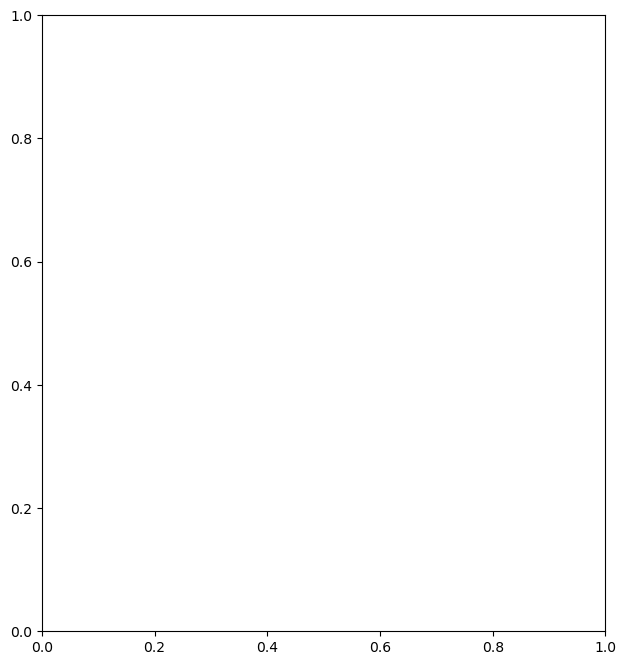

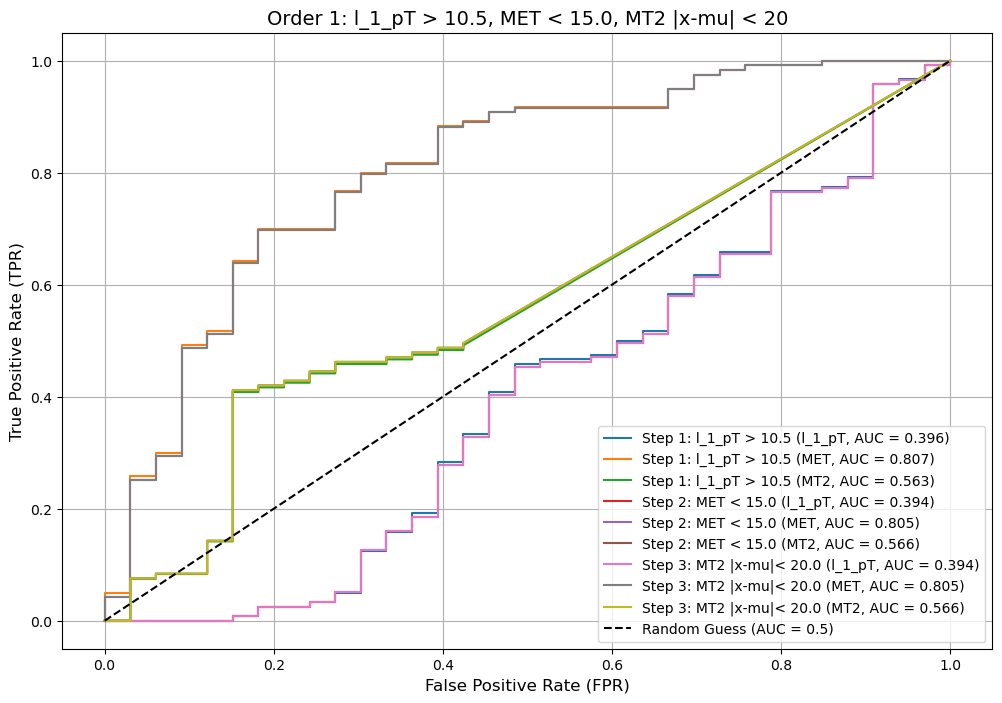

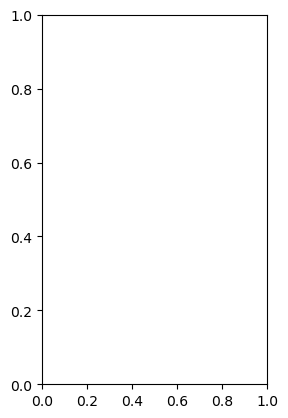

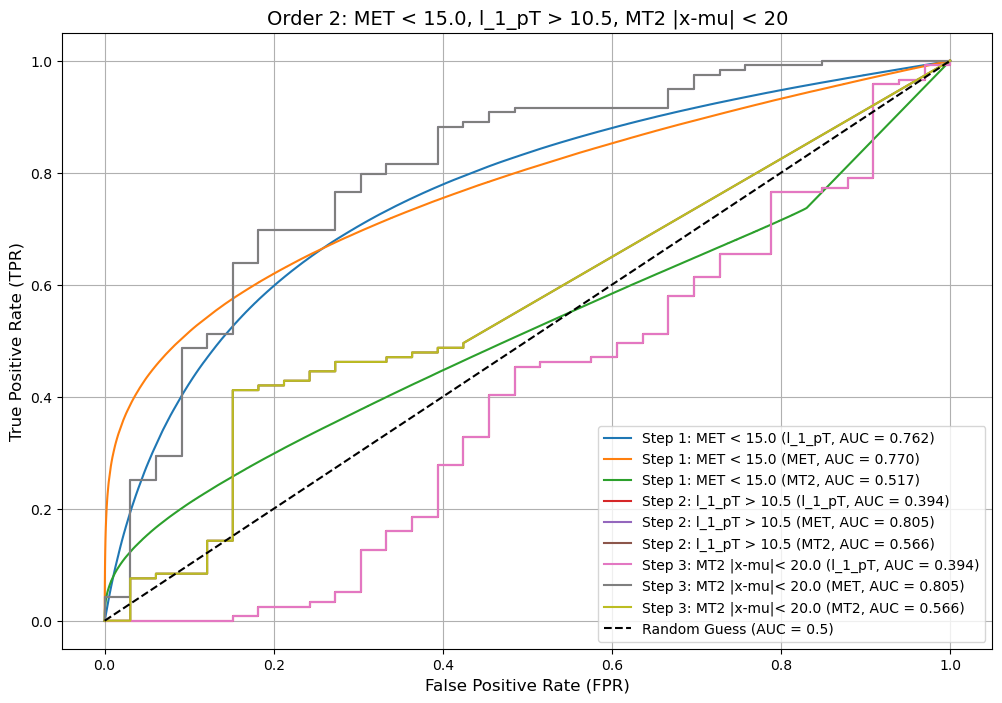

In [53]:
def compare_selection_order_effects(data, observables, signal_column, orders, titles, save_as=None):
    plt.figure(figsize=(16, 8))
    
    for idx, (order, title) in enumerate(zip(orders, titles), start=1):
        plt.subplot(1, len(orders), idx)
        successive_selection_roc(
            data=data,
            observables=observables,
            selection_steps=order,
            signal_column=signal_column,
            title=title
        )
    plt.show()

selection_order_1 = [
    ('l_1_pT', 10.5, '>'),
    ('MET', 15.0, '<'),
    ('MT2', 20.0, '|x-mu|<')
]

selection_order_2 = [
    ('MET', 15.0, '<'),
    ('l_1_pT', 10.5, '>'),
    ('MT2', 20.0, '|x-mu|<')
]

observables_to_analyze = ['l_1_pT', 'MET', 'MT2']
signal_column_name = 'signal'

subplot_titles = [
    "Order 1: l_1_pT > 10.5, MET < 15.0, MT2 |x-mu| < 20",
    "Order 2: MET < 15.0, l_1_pT > 10.5, MT2 |x-mu| < 20"
]

compare_selection_order_effects(
    data=df,
    observables=observables_to_analyze,
    signal_column=signal_column_name,
    orders=[selection_order_1, selection_order_2],
    titles=subplot_titles,
)


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

#### exerice 8.1

In [54]:
def calculate_covariance_matrices(data, features, category_column='signal'):
    signal_samples = data[data[category_column] == 1][features].values
    background_samples = data[data[category_column] == 0][features].values

    mean_signal = signal_samples.mean(axis=0)
    mean_background = background_samples.mean(axis=0)

    mean_difference = (mean_background - mean_signal).reshape(-1, 1)
    S_B = mean_difference @ mean_difference.T

    S_W_signal = np.sum(
        [(sample - mean_signal).reshape(-1, 1) @ (sample - mean_signal).reshape(1, -1)
         for sample in signal_samples], axis=0
    )
    S_W_background = np.sum(
        [(sample - mean_background).reshape(-1, 1) @ (sample - mean_background).reshape(1, -1)
         for sample in background_samples], axis=0
    )
    S_W = S_W_signal + S_W_background

    return S_B, S_W

selected_features = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

S_B, S_W = calculate_covariance_matrices(df, selected_features, category_column='signal')

print("Between-class Covariance Matrix (S_B):")
print(S_B)

print("\nWithin-class Covariance Matrix (S_W):")
print(S_W)


Between-class Covariance Matrix (S_B):
[[ 2.85659103e-01 -3.52809644e-04 -4.96156489e-04  1.36717519e-01
   4.08806287e-04 -1.06310408e-04  4.10931386e-01  1.17828594e-04
   2.70047689e-01  1.52779431e-02  5.67995029e-02  5.65419449e-02
   2.65089747e-01  7.32109964e-02  1.79849669e-01  1.82682327e-01
   1.72022353e-01  8.28218385e-02]
 [-3.52809644e-04  4.35745417e-07  6.12789134e-07 -1.68856020e-04
  -5.04905320e-07  1.31301040e-07 -5.07529970e-04 -1.45526832e-07
  -3.33528420e-04 -1.88693643e-05 -7.01514925e-05 -6.98333898e-05
  -3.27405003e-04 -9.04208734e-05 -2.22127344e-04 -2.25625882e-04
  -2.12460043e-04 -1.02290958e-04]
 [-4.96156489e-04  6.12789134e-07  8.61765858e-07 -2.37462358e-04
  -7.10048762e-07  1.84648760e-07 -7.13739809e-04 -2.04654502e-07
  -4.69041288e-04 -2.65360023e-05 -9.86541010e-05 -9.82067528e-05
  -4.60429922e-04 -1.27158948e-04 -3.12377864e-04 -3.17297861e-04
  -2.98782731e-04 -1.43851858e-04]
 [ 1.36717519e-01 -1.68856020e-04 -2.37462358e-04  6.54335177e-0

#### exercise 8.1

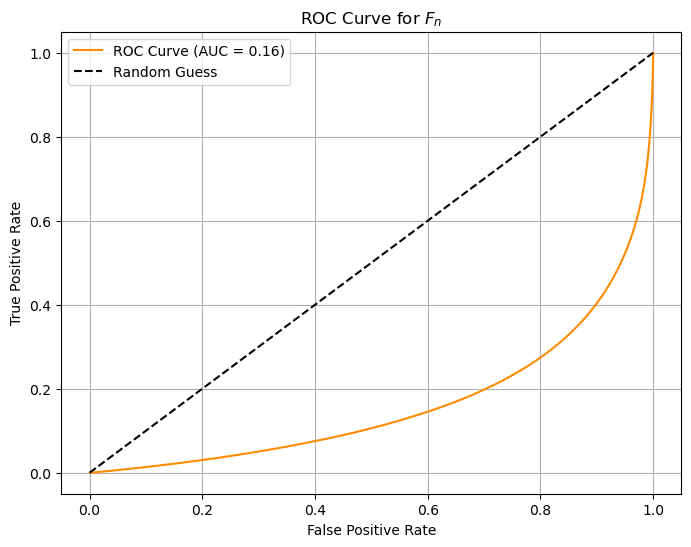

In [55]:
from sklearn.metrics import roc_curve, auc

def calculate_linear_coefficients(S_W, mean_signal, mean_background):
    mean_diff = mean_background - mean_signal
    coefficients = np.linalg.solve(S_W, mean_diff) 
    return coefficients

def project_observations(data, features, coefficients):
    projections = data[features].values @ coefficients
    return projections

def plot_roc_curve(signal_projections, background_projections):
    all_projections = np.concatenate([signal_projections, background_projections])
    true_labels = np.concatenate([
        np.ones_like(signal_projections), 
        np.zeros_like(background_projections)  
    ])

    fpr, tpr, _ = roc_curve(true_labels, all_projections)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for $F_n$")
    plt.legend()
    plt.grid()
    plt.show()


mean_signal = df[df['signal'] == 1][selected_features].mean().values
mean_background = df[df['signal'] == 0][selected_features].mean().values

coefficients = calculate_linear_coefficients(S_W, mean_signal, mean_background)

signal_projections = project_observations(df[df['signal'] == 1], selected_features, coefficients)
background_projections = project_observations(df[df['signal'] == 0], selected_features, coefficients)

plot_roc_curve(signal_projections, background_projections)
